# Analysez des données de systèmes éducatifs

## Import

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import skimpy
from skimpy import skim
import plotly.express as px
import json
import requests
import pycountry
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

## Création des DataFrame

In [2]:
country_series = pd.read_csv("data/EdStatsCountry-Series.csv", sep=",", low_memory=False)
country = pd.read_csv("data/EdStatsCountry.csv", sep=",", low_memory=False)
ed_data = pd.read_csv("data/EdStatsData.csv", sep=",", low_memory=False)
foot_note = pd.read_csv("data/EdStatsFootNote.csv", sep=",", low_memory=False)
ed_series = pd.read_csv("data/EdStatsSeries.csv", sep=",", low_memory=False)

Pour ne pas modifier les DF de base, on crée des copies indépendantes. A chaque fois que le kernel sera relancé, on repartira donc avec les bonnes données de base.

In [3]:
country_series = country_series.copy()
country = country.copy()
ed_data = ed_data.copy()
foot_note = foot_note.copy()
ed_series = ed_series.copy()


#### Afficher les 5 premières lignes des DF

In [4]:
country_series.head(5)

CountryCode         SeriesCode  \
0         ABW        SP.POP.TOTL   
1         ABW        SP.POP.GROW   
2         AFG        SP.POP.GROW   
3         AFG  NY.GDP.PCAP.PP.CD   
4         AFG        SP.POP.TOTL   

                                         DESCRIPTION  Unnamed: 3  
0  Data sources : United Nations World Population...         NaN  
1  Data sources: United Nations World Population ...         NaN  
2  Data sources: United Nations World Population ...         NaN  
3                 Estimates are based on regression.         NaN  
4  Data sources : United Nations World Population...         NaN

In [5]:
country.head(5)

Country Code   Short Name   Table Name                     Long Name  \
0          ABW        Aruba        Aruba                         Aruba   
1          AFG  Afghanistan  Afghanistan  Islamic State of Afghanistan   
2          AGO       Angola       Angola   People's Republic of Angola   
3          ALB      Albania      Albania           Republic of Albania   
4          AND      Andorra      Andorra       Principality of Andorra   

  2-alpha code   Currency Unit  \
0           AW   Aruban florin   
1           AF  Afghan afghani   
2           AO  Angolan kwanza   
3           AL    Albanian lek   
4           AD            Euro   

                                       Special Notes  \
0  SNA data for 2000-2011 are updated from offici...   
1  Fiscal year end: March 20; reporting period fo...   
2  April 2013 database update: Based on IMF data,...   
3                                                NaN   
4                                                NaN   

                      Region          Income Group WB-2 code  ...  \
0  Latin America & Caribbean  High income: nonOECD        AW  ...   
1                 South Asia            Low income        AF  ...   
2         Sub-Saharan Africa   Upper middle income        AO  ...   
3      Europe & Central Asia   Upper middle income        AL  ...   
4      Europe & Central Asia  High income: nonOECD        AD  ...   

            IMF data dissemination standard  \
0                                       NaN   
1  General Data Dissemination System (GDDS)   
2  General Data Dissemination System (GDDS)   
3  General Data Dissemination System (GDDS)   
4                                       NaN   

                            Latest population census  \
0                                               2010   
1                                               1979   
2                                               1970   
3                                               2011   
4  2011. Population figures compiled from adminis...   

                             Latest household survey  \
0                                                NaN   
1  Multiple Indicator Cluster Survey (MICS), 2010/11   
2               Malaria Indicator Survey (MIS), 2011   
3       Demographic and Health Survey (DHS), 2008/09   
4                                                NaN   

   Source of most recent Income and expenditure data  \
0                                                NaN   
1            Integrated household survey (IHS), 2008   
2            Integrated household survey (IHS), 2008   
3  Living Standards Measurement Study Survey (LSM...   
4                                                NaN   

  Vital registration complete Latest agricultural census  \
0                         Yes                        NaN   
1                         NaN                    2013/14   
2                         NaN                       2015   
3                         Yes                       2012   
4                         Yes                        NaN   

  Latest industrial data Latest trade data Latest water withdrawal data  \
0                    NaN            2012.0                          NaN   
1                    NaN            2012.0                         2000   
2                    NaN               NaN                         2005   
3                 2010.0            2012.0                         2006   
4                    NaN            2006.0                          NaN   

  Unnamed: 31  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

[5 rows x 32 columns]

In [6]:
ed_data.head(5)

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name  Indicator Code  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
3  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
4  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

        1970       1971       1972       1973       1974      1975  ...  2060  \
0        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
1        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
2        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
3        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
4  54.822121  54.894138  56.209438  57.267109  57.991138  59.36554  ...   NaN   

   2065  2070  2075  2080  2085  2090  2095  2100  Unnamed: 69  
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  

[5 rows x 70 columns]

In [7]:
foot_note.head(5)

CountryCode      SeriesCode    Year          DESCRIPTION  Unnamed: 4
0         ABW  SE.PRE.ENRL.FE  YR2001  Country estimation.         NaN
1         ABW  SE.TER.TCHR.FE  YR2005  Country estimation.         NaN
2         ABW  SE.PRE.TCHR.FE  YR2000  Country estimation.         NaN
3         ABW  SE.SEC.ENRL.GC  YR2004  Country estimation.         NaN
4         ABW     SE.PRE.TCHR  YR2006  Country estimation.         NaN

In [8]:
ed_series.head(5)

Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1     BAR.NOED.1519.ZS  Attainment   
2  BAR.NOED.15UP.FE.ZS  Attainment   
3     BAR.NOED.15UP.ZS  Attainment   
4  BAR.NOED.2024.FE.ZS  Attainment   

                                      Indicator Name  \
0  Barro-Lee: Percentage of female population age...   
1  Barro-Lee: Percentage of population age 15-19 ...   
2  Barro-Lee: Percentage of female population age...   
3  Barro-Lee: Percentage of population age 15+ wi...   
4  Barro-Lee: Percentage of female population age...   

                                    Short definition  \
0  Percentage of female population age 15-19 with...   
1  Percentage of population age 15-19 with no edu...   
2  Percentage of female population age 15+ with n...   
3  Percentage of population age 15+ with no educa...   
4  Percentage of female population age 20-24 with...   

                                     Long definition  Unit of measure  \
0  Percentage of female population age 15-19 with...              NaN   
1  Percentage of population age 15-19 with no edu...              NaN   
2  Percentage of female population age 15+ with n...              NaN   
3  Percentage of population age 15+ with no educa...              NaN   
4  Percentage of female population age 20-24 with...              NaN   

  Periodicity Base Period Other notes Aggregation method  ...  \
0         NaN         NaN         NaN                NaN  ...   
1         NaN         NaN         NaN                NaN  ...   
2         NaN         NaN         NaN                NaN  ...   
3         NaN         NaN         NaN                NaN  ...   
4         NaN         NaN         NaN                NaN  ...   

  Notes from original source  General comments  \
0                        NaN               NaN   
1                        NaN               NaN   
2                        NaN               NaN   
3                        NaN               NaN   
4                        NaN               NaN   

                                              Source  \
0  Robert J. Barro and Jong-Wha Lee: http://www.b...   
1  Robert J. Barro and Jong-Wha Lee: http://www.b...   
2  Robert J. Barro and Jong-Wha Lee: http://www.b...   
3  Robert J. Barro and Jong-Wha Lee: http://www.b...   
4  Robert J. Barro and Jong-Wha Lee: http://www.b...   

  Statistical concept and methodology Development relevance  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   
2                                 NaN                   NaN   
3                                 NaN                   NaN   
4                                 NaN                   NaN   

  Related source links Other web links  Related indicators  License Type  \
0                  NaN             NaN                 NaN           NaN   
1                  NaN             NaN                 NaN           NaN   
2                  NaN             NaN                 NaN           NaN   
3                  NaN             NaN                 NaN           NaN   
4                  NaN             NaN                 NaN           NaN   

   Unnamed: 20  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 21 columns]

## Analyse de country_series

### Description de chaque colonne

In [9]:
country_series_info = country_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


**CountryCode** : le code indicatif de chaque pays  
  
**SeriesCodes** : le code Série de chaque pays  
  
**DESCRIPTION** : source des données  
  
**Unnamed** : aucune info, rempli de NaN  

*Pour faciliter la lecture du DF, on renomme DESCRIPTION en Description*

In [10]:
country_series.rename(columns={'DESCRIPTION': 'Description'}, inplace=True)

### Nombre de lignes & colonnes 

In [11]:
country_series.shape

(613, 4)

Le DF country_series à 613 lignes & 4 colonnes

### Calcul du nombre de doublons

In [12]:
country_series.duplicated().sum()

0

Le DF ne semble pas contenir de doublons, mais comme vu avec **head(5)**, nous avons pu voir des doublons dans **CountryCode** , regardons cela plus en détails :

In [13]:
country_series.loc[country_series['CountryCode'].duplicated(keep=False),:]

CountryCode         SeriesCode  \
0           ABW        SP.POP.TOTL   
1           ABW        SP.POP.GROW   
2           AFG        SP.POP.GROW   
3           AFG  NY.GDP.PCAP.PP.CD   
4           AFG        SP.POP.TOTL   
..          ...                ...   
608         ZAF        SP.POP.GROW   
609         ZMB        SP.POP.GROW   
610         ZMB        SP.POP.TOTL   
611         ZWE        SP.POP.TOTL   
612         ZWE        SP.POP.GROW   

                                           Description  Unnamed: 3  
0    Data sources : United Nations World Population...         NaN  
1    Data sources: United Nations World Population ...         NaN  
2    Data sources: United Nations World Population ...         NaN  
3                   Estimates are based on regression.         NaN  
4    Data sources : United Nations World Population...         NaN  
..                                                 ...         ...  
608  Data sources : Statistics South Africa, United...         NaN  
609  Data sources: United Nations World Population ...         NaN  
610  Data sources : United Nations World Population...         NaN  
611  Data sources : United Nations World Population...         NaN  
612  Data sources: United Nations World Population ...         NaN  

[613 rows x 4 columns]

On remarque que certains pays ont **deux SeriesCode**. La question qui se pose alors est : Qu'est ce qu'un **SeriesCode** ?

La colonne SeriesCode (ex. : SP.POP.TOTL) représente l’**indicateur statistique** que la ligne décrit.

C’est un code unique utilisé pour identifier une série temporelle : population, PIB, CO₂, scolarisation, etc.

Listons maintenant tous les SeriesCode existant dans le DF.

In [14]:
country_series['SeriesCode'].value_counts()

SeriesCode
SP.POP.TOTL          211
SP.POP.GROW          211
NY.GDP.PCAP.PP.CD     19
NY.GNP.PCAP.PP.CD     19
NY.GDP.PCAP.PP.KD     19
NY.GNP.MKTP.PP.CD     14
NY.GDP.MKTP.PP.KD     14
NY.GDP.MKTP.PP.CD     14
SP.POP.1564.TO.ZS     13
SP.POP.TOTL.MA.ZS     13
SP.POP.TOTL.FE.ZS     13
SP.POP.0014.TO.ZS     13
NY.GNP.PCAP.CD         6
NY.GDP.PCAP.CD         5
NY.GDP.PCAP.KD         5
SP.POP.1564.MA.IN      4
SP.POP.0014.TO         4
SP.POP.1564.TO         4
SP.POP.1564.FE.IN      4
SP.POP.0014.MA.IN      4
SP.POP.0014.FE.IN      4
Name: count, dtype: int64

### Valeurs manquantes

In [15]:
skim(country_series)

/home/magali/.pyenv/versions/3.12.0/lib/python3.12/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 613    │ │ string      │ 3     │                                                          │
│ │ Number of columns │ 4      │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA     ┃ NA %    ┃ mean    ┃ sd    ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━┩  │
│ │ Unnamed: 3        │    613 │     100 │     nan │   nan │   nan │   nan │   nan │   nan │    nan │          │  │
│ └───────────────────┴────────┴─────────┴─────────┴───────┴───────┴───────┴───────┴───────┴────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ CountryCode               │       0 │          0 │                            1 │                      613 │  │
│ │ SeriesCode                │       0 │          0 │                            1 │                      613 │  │
│ │ Description               │       0 │          0 │                          7.5 │                     4587 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Cette erreur indique qu’un **NaN** s’est glissé dans une division lors du calcul d’un histogramme. Celà est arrivé car la colonne **Unnamed: 3** est composée entièrement de **NaN**

#### Remplissage des colonnes

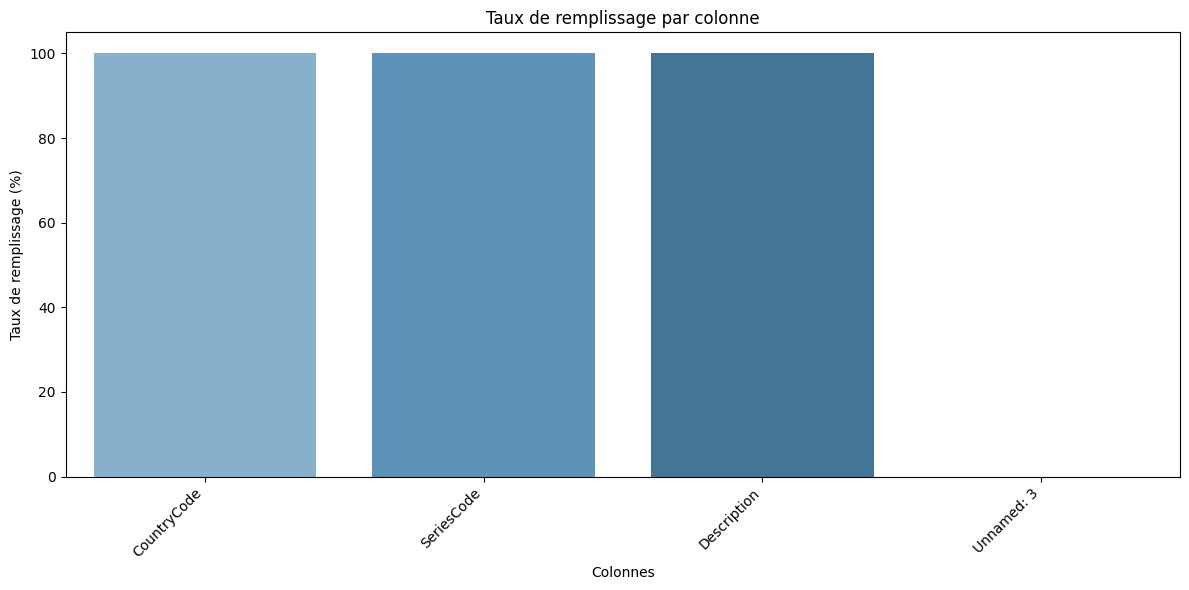

In [16]:
# 1. Calcul du taux de remplissage
taux = (country_series.notna().mean() * 100).round(2)
#### Crée un DF Booléan, avec not NaN = True, et NaN = False, avec True = 1 & False = 0. mean() calcule la proportion de valeurs
#### non manquantes, colonne par colonne. On le passage en %, arrondi à 2 décimales :: On obtient une Serie

# 2. Transformation en DataFrame pour seaborn
df_taux = taux.reset_index()
df_taux.columns = ['Colonne', 'TauxRemplissage']
#### On transforme la Série en DF, avec deux colonnes: Colonne et TauxRemplissage

# 3. Affichage avec seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=df_taux, x='Colonne', y='TauxRemplissage', hue='Colonne', palette='Blues_d')

plt.title("Taux de remplissage par colonne")
plt.ylabel("Taux de remplissage (%)")
plt.xlabel("Colonnes")
plt.ylim(0, 105)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### On crée un histogramme à barres (barplot), avec en x le nom des colonnes & en y le taux de remplissage, 
#### Avec la palette de couleurs Blues_d que l'on applique sur les colonnes

On remarque que les colonnes *CountryCode*, *SeriesCode*, et *Description* sont totalement remplies.  
La colonne *Unnamed :3* est totalement vide, on peut donc la supprimer.

In [17]:
country_series_filtered = country_series.drop("Unnamed: 3", axis=1)

In [18]:
country_series_filtered.columns

Index(['CountryCode', 'SeriesCode', 'Description'], dtype='object')

La colonne * Unnamed :3*  a bien été supprimée.

In [19]:
country_series_filtered.describe().T

count unique                                                top  \
CountryCode   613    211                                                GEO   
SeriesCode    613     21                                        SP.POP.TOTL   
Description   613     97  Data sources : United Nations World Population...   

            freq  
CountryCode   18  
SeriesCode   211  
Description  154

In [20]:
country_series_filtered.value_counts("CountryCode")

CountryCode
GEO    18
MDA    18
TZA    12
MAR    12
MUS    12
       ..
IRQ     2
ISL     2
ISR     2
ITA     2
HRV     2
Name: count, Length: 211, dtype: int64

In [21]:
country_series_filtered.value_counts("SeriesCode")

SeriesCode
SP.POP.GROW          211
SP.POP.TOTL          211
NY.GDP.PCAP.PP.KD     19
NY.GNP.PCAP.PP.CD     19
NY.GDP.PCAP.PP.CD     19
NY.GNP.MKTP.PP.CD     14
NY.GDP.MKTP.PP.CD     14
NY.GDP.MKTP.PP.KD     14
SP.POP.1564.TO.ZS     13
SP.POP.TOTL.MA.ZS     13
SP.POP.0014.TO.ZS     13
SP.POP.TOTL.FE.ZS     13
NY.GNP.PCAP.CD         6
NY.GDP.PCAP.KD         5
NY.GDP.PCAP.CD         5
SP.POP.0014.FE.IN      4
SP.POP.0014.MA.IN      4
SP.POP.0014.TO         4
SP.POP.1564.TO         4
SP.POP.1564.FE.IN      4
SP.POP.1564.MA.IN      4
Name: count, dtype: int64

In [22]:
country_series_filtered.value_counts("Description")

Description
Data sources : United Nations World Population Prospects                                                                          154
Data sources: United Nations World Population Prospects                                                                           137
Estimates are based on regression.                                                                                                 84
Data sources : Eurostat                                                                                                            54
Derived using ratio of age group from WPP and World Bank population.                                                               24
                                                                                                                                 ... 
Data sources : Statistics Greenland                                                                                                 1
Data sources : Statistics Canada                  

## Analyse de country

### Description de chaque colonne

In [23]:
country_info = country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

**Country Code** : code ISO3 à trois lettres (ex. AFG pour Afghanistan) utilisé pour identifier chaque pays de façon standardisée.  
  
**Short Name** : nom court du pays (ex. “World”, “Low & middle income”).  
  
**Table Name** : version plus longue ou formelle du nom (ex. “Dem. Rep. Congo”). 
  
**Long Name** : nom complet du pays (souvent avec précisions officielles, ex. “Republic of Congo”).  
  
**2‑alpha code** : code ISO‑3166 à deux lettres (ex. AF pour Afghanistan). 
  
**Currency Unit** : devise monétaire (ex. “US dollars”).  
  
**Special Notes** : notes spécifiques ou exceptions (ex. agrégats regionaux, méthodes).  
  
**Region** : zone géographique selon le World Bank (ex. Europe & Central Asia). 
  
**Income Group** : classification par revenu (Low, Lower‐middle, Upper‐middle, High income). 
  
**WB‑2 code** : code interne abrégé utilisé par la Banque mondiale pour régions/groupes (ex. UMC pour upper-middle income). 
  
**National accounts base year** : année de base utilisée pour les comptes nationaux.  
  
**National accounts reference year** : année de référence statistique.  
  
**SNA price valuation** : méthode d’évaluation des prix selon Système des comptes nationaux (ex. bas prix, prix marché). 
  
**Lending category** : type de financement auquel le pays a accès (IDA = prêt concessionnel, IBRD etc.). 

**Other groups** : appartenance à d’autres groupes (ex. EMU, HIPC).  
  
**System of National Accounts** : version du SNA appliquée (1993, 2008…).  
  
**Alternative conversion factor** : facteur de conversion alternatif pour certaines données.  
  
**PPP survey year** : année des données d’évaluation par Parité de Pouvoir d’Achat. 
  
**Balance of Payments Manual in use** : version du manuel BOP utilisée (BPM6…). 
  
**External debt Reporting status** : statut du pays concernant le reporting de sa dette externe (ex. “Actual”). 

**System of trade** : type de collecte des données commerciales (ex. “General trade system”).
  
**Government Accounting concept** : méthode de comptabilité gouvernementale (ex. centralisé). 
  
**IMF data dissemination standard** : norme suivie selon FMI (e‑GDDS, SDDS…). 
  
**Vital registration complete** : si le pays a un système complet d’enregistrement des naissances/décès.  

**Latest population census** : année du dernier recensement. 
  
**Latest household survey** : dernière enquête ménages (ex. DHS, MICS).  
  
**Source of most recent Income and expenditure data** : référence de la donnée la plus récente (ex. Living Standards Measurement Study). 
  
**Latest agricultural census / industrial data / trade data / water withdrawal data** : année de la dernière information disponible sur ces thèmes.  

In [24]:
country = country.drop("Unnamed: 31", axis=1)

### Nombre de lignes & colonnes 

In [25]:
country.shape

(241, 31)

Le DF country à *241 lignes* &  *32 colonnes*

### Calcul du nombre de doublons

In [26]:
country.duplicated().sum()

0

In [27]:
country.loc[country['Country Code'].duplicated(keep=False),:]
### On regarde si chaque ligne de 'Country Code' existe plusieurs fois.

Empty DataFrame
Columns: [Country Code, Short Name, Table Name, Long Name, 2-alpha code, Currency Unit, Special Notes, Region, Income Group, WB-2 code, National accounts base year, National accounts reference year, SNA price valuation, Lending category, Other groups, System of National Accounts, Alternative conversion factor, PPP survey year, Balance of Payments Manual in use, External debt Reporting status, System of trade, Government Accounting concept, IMF data dissemination standard, Latest population census, Latest household survey, Source of most recent Income and expenditure data, Vital registration complete, Latest agricultural census, Latest industrial data, Latest trade data, Latest water withdrawal data]
Index: []

[0 rows x 31 columns]

Il n'y a pas de doublons dans le DF

### Valeurs manquantes

In [28]:
skim(country)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 241    │ │ string      │ 28    │                                                          │
│ │ Number of columns │ 31     │ │ float64     │ 3     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name              ┃ NA   ┃ NA %   ┃ mean  ┃ sd     ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ National accounts        │  209 │  86.72 │  2002 │  5.249 │  1987 │  1997 │  2002 │  2005 │  2012 │ ▁▁▅▆▇▁ │  │
│ │ reference year           │      │        │       │        │       │       │       │       │       │        │  │
│ │ Latest industrial data   │  134 │   55.6 │  2008 │  2.617 │  2000 │  2008 │  2009 │  2010 │  2010 │ ▁▁ ▁▂▇ │  │
│ │ Latest trade data        │   56 │  23.24 │  2011 │   2.57 │  1995 │  2011 │  2012 │  2012 │  2012 │     ▁▇ │  │
│ └──────────────────────────┴──────┴────────┴───────┴────────┴───────┴───────┴───────┴───────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                         ┃ NA      ┃ NA %       ┃ words per row           ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Country Code                        │       0 │          0 │                       1 │                 241 │  │
│ │ Short Name                          │       0 │          0 │                     1.7 │                 401 │  │
│ │ Table Name                          │       0 │          0 │                     1.7 │                 404 │  │
│ │ Long Name                           │       0 │          0 │                     3.2 │                 777 │  │
│ │ 2-alpha code                        │       3 │       1.24 │                    0.99 │                 238 │  │
│ │ Currency Unit                       │      26 │      10.79 │                     1.9 │                 453 │  │
│ │ Special Notes                       │      96 │      39.83 │                      17 │                4082 │  │
│ │ Region                              │      27 │       11.2 │                     3.1 │                 759 │  │
│ │ Income Group                        │      27 │       11.2 │                     2.5 │                 608 │  │
│ │ WB-2 code                           │       1 │       0.41 │                       1 │                 240 │  │
│ │ National accounts base year         │      36 │      14.94 │                     1.6 │                 390 │  │
│ │ SNA price valuation                 │      44 │      18.26 │                     4.9 │                1182 │  │
│ │ Lending category                    │      97 │      40.25 │                     0.6 │                 144 │  │
│ │ Other groups                        │     183 │     

In [29]:
country.describe()

National accounts reference year  Latest industrial data  \
count                          32.00000              107.000000   
mean                         2001.53125             2008.102804   
std                             5.24856                2.616834   
min                          1987.00000             2000.000000   
25%                          1996.75000             2007.500000   
50%                          2002.00000             2009.000000   
75%                          2005.00000             2010.000000   
max                          2012.00000             2010.000000   

       Latest trade data  
count         185.000000  
mean         2010.994595  
std             2.569675  
min          1995.000000  
25%          2011.000000  
50%          2012.000000  
75%          2012.000000  
max          2012.000000

In [30]:
country.head(5)

Country Code   Short Name   Table Name                     Long Name  \
0          ABW        Aruba        Aruba                         Aruba   
1          AFG  Afghanistan  Afghanistan  Islamic State of Afghanistan   
2          AGO       Angola       Angola   People's Republic of Angola   
3          ALB      Albania      Albania           Republic of Albania   
4          AND      Andorra      Andorra       Principality of Andorra   

  2-alpha code   Currency Unit  \
0           AW   Aruban florin   
1           AF  Afghan afghani   
2           AO  Angolan kwanza   
3           AL    Albanian lek   
4           AD            Euro   

                                       Special Notes  \
0  SNA data for 2000-2011 are updated from offici...   
1  Fiscal year end: March 20; reporting period fo...   
2  April 2013 database update: Based on IMF data,...   
3                                                NaN   
4                                                NaN   

                      Region          Income Group WB-2 code  ...  \
0  Latin America & Caribbean  High income: nonOECD        AW  ...   
1                 South Asia            Low income        AF  ...   
2         Sub-Saharan Africa   Upper middle income        AO  ...   
3      Europe & Central Asia   Upper middle income        AL  ...   
4      Europe & Central Asia  High income: nonOECD        AD  ...   

     Government Accounting concept           IMF data dissemination standard  \
0                              NaN                                       NaN   
1  Consolidated central government  General Data Dissemination System (GDDS)   
2     Budgetary central government  General Data Dissemination System (GDDS)   
3     Budgetary central government  General Data Dissemination System (GDDS)   
4                              NaN                                       NaN   

                            Latest population census  \
0                                               2010   
1                                               1979   
2                                               1970   
3                                               2011   
4  2011. Population figures compiled from adminis...   

                             Latest household survey  \
0                                                NaN   
1  Multiple Indicator Cluster Survey (MICS), 2010/11   
2               Malaria Indicator Survey (MIS), 2011   
3       Demographic and Health Survey (DHS), 2008/09   
4                                                NaN   

   Source of most recent Income and expenditure data  \
0                                                NaN   
1            Integrated household survey (IHS), 2008   
2            Integrated household survey (IHS), 2008   
3  Living Standards Measurement Study Survey (LSM...   
4                                                NaN   

  Vital registration complete Latest agricultural census  \
0                         Yes                        NaN   
1                         NaN                    2013/14   
2                         NaN                       2015   
3                         Yes                       2012   
4                         Yes                        NaN   

  Latest industrial data Latest trade data Latest water withdrawal data  
0                    NaN            2012.0                          NaN  
1                    NaN            2012.0                         2000  
2                    NaN               NaN                         2005  
3                 2010.0            2012.0                         2006  
4                    NaN            2006.0                          NaN  

[5 rows x 31 columns]

Comme nous avons les **CountryCode**, les colonnes  **Table Name**, **Long Name** et **2-alphacode** n'ont pas d'utilité pour notre analyse. On remarque également que **Short Name** correspond à **Country Name** dans les autres DF. Nous pouvons donc la renomer.

In [31]:
country.rename(columns={'Short Name': 'Country Name'}, inplace=True)

In [32]:
useless_columns = ['Table Name', 'Long Name', '2-alpha code']

In [33]:
country_filtered = country.drop(columns=useless_columns)

In [34]:
country_filtered.head(5)

Country Code Country Name   Currency Unit  \
0          ABW        Aruba   Aruban florin   
1          AFG  Afghanistan  Afghan afghani   
2          AGO       Angola  Angolan kwanza   
3          ALB      Albania    Albanian lek   
4          AND      Andorra            Euro   

                                       Special Notes  \
0  SNA data for 2000-2011 are updated from offici...   
1  Fiscal year end: March 20; reporting period fo...   
2  April 2013 database update: Based on IMF data,...   
3                                                NaN   
4                                                NaN   

                      Region          Income Group WB-2 code  \
0  Latin America & Caribbean  High income: nonOECD        AW   
1                 South Asia            Low income        AF   
2         Sub-Saharan Africa   Upper middle income        AO   
3      Europe & Central Asia   Upper middle income        AL   
4      Europe & Central Asia  High income: nonOECD        AD   

                         National accounts base year  \
0                                               2000   
1                                            2002/03   
2                                               2002   
3  Original chained constant price data are resca...   
4                                               1990   

   National accounts reference year                   SNA price valuation  \
0                               NaN     Value added at basic prices (VAB)   
1                               NaN     Value added at basic prices (VAB)   
2                               NaN  Value added at producer prices (VAP)   
3                            1996.0     Value added at basic prices (VAB)   
4                               NaN                                   NaN   

   ...    Government Accounting concept  \
0  ...                              NaN   
1  ...  Consolidated central government   
2  ...     Budgetary central government   
3  ...     Budgetary central government   
4  ...                              NaN   

            IMF data dissemination standard  \
0                                       NaN   
1  General Data Dissemination System (GDDS)   
2  General Data Dissemination System (GDDS)   
3  General Data Dissemination System (GDDS)   
4                                       NaN   

                            Latest population census  \
0                                               2010   
1                                               1979   
2                                               1970   
3                                               2011   
4  2011. Population figures compiled from adminis...   

                             Latest household survey  \
0                                                NaN   
1  Multiple Indicator Cluster Survey (MICS), 2010/11   
2               Malaria Indicator Survey (MIS), 2011   
3       Demographic and Health Survey (DHS), 2008/09   
4                                                NaN   

   Source of most recent Income and expenditure data  \
0                                                NaN   
1            Integrated household survey (IHS), 2008   
2            Integrated household survey (IHS), 2008   
3  Living Standards Measurement Study Survey (LSM...   
4                                                NaN   

  Vital registration complete Latest agricultural census  \
0                         Yes                        NaN   
1                         NaN                    2013/14   
2                         NaN                       2015   
3                         Yes                       2012   
4                         Yes                        NaN   

  Latest industrial data Latest trade data Latest water withdrawal data  
0                    NaN            2012.0                          NaN  
1                    NaN            2012.0                         2000  
2                    NaN               NaN                   

## Analyse de ed_data

### Description de chaque colonne

In [35]:
ed_data_info = ed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

**Country Name** : le nom de chaque pays  
  
**Country Code** : le code indicatif de chaque pays  

**Indicateur Name** : le code de chaque indicateur de pays   

**Indicateur Code** : le code Indicateur de chaque pays  

**1970 - 2100** : Années sur lesquelles les données ont été calculées    


In [36]:
ed_data = ed_data.drop("Unnamed: 69" , axis=1)

In [37]:
ed_data.value_counts("Country Name")

Country Name
Zimbabwe                3665
Afghanistan             3665
Ukraine                 3665
United Arab Emirates    3665
United Kingdom          3665
                        ... 
Angola                  3665
Antigua and Barbuda     3665
Arab World              3665
Argentina               3665
Armenia                 3665
Name: count, Length: 242, dtype: int64

In [38]:
ed_data.value_counts("Country Code")

Country Code
ZWE    3665
ABW    3665
URY    3665
USA    3665
UZB    3665
       ... 
ARB    3665
ARE    3665
ARG    3665
ARM    3665
ASM    3665
Name: count, Length: 242, dtype: int64

In [39]:
ed_data.value_counts("Indicator Code")

Indicator Code
XGDP.56.FSGOV.FDINSTADM.FFD    242
BAR.NOED.1519.FE.ZS            242
BAR.NOED.1519.ZS               242
BAR.NOED.15UP.FE.ZS            242
BAR.NOED.15UP.ZS               242
                              ... 
BAR.NOED.5559.FE.ZS            242
BAR.NOED.5559.ZS               242
BAR.NOED.6064.FE.ZS            242
BAR.NOED.6064.ZS               242
BAR.NOED.6569.FE.ZS            242
Name: count, Length: 3665, dtype: int64

In [40]:
ed_data.value_counts("Indicator Name")

Indicator Name
Youth literacy rate, population 15-24 years, male (%)                                                  242
Adjusted net enrolment rate, lower secondary, both sexes (%)                                           242
Adjusted net enrolment rate, lower secondary, female (%)                                               242
Adjusted net enrolment rate, lower secondary, gender parity index (GPI)                                242
Adjusted net enrolment rate, lower secondary, male (%)                                                 242
                                                                                                      ... 
Adult literacy rate, population 15+ years, both sexes (%)                                              242
Adult literacy rate, population 15+ years, female (%)                                                  242
Adult literacy rate, population 15+ years, gender parity index (GPI)                                   242
Adult literacy rate, p

### Nombre de lignes & colonnes 

In [41]:
ed_data.shape

(886930, 69)

Le DF ed_data à **88693 lignes** & **70 colonnes**

### Calcul du nombre de doublons

In [42]:
ed_data.duplicated().sum()

0

In [43]:
ed_data.loc[ed_data['Country Code'].duplicated(keep=False),:]

Country Name Country Code  \
0        Arab World          ARB   
1        Arab World          ARB   
2        Arab World          ARB   
3        Arab World          ARB   
4        Arab World          ARB   
...             ...          ...   
886925     Zimbabwe          ZWE   
886926     Zimbabwe          ZWE   
886927     Zimbabwe          ZWE   
886928     Zimbabwe          ZWE   
886929     Zimbabwe          ZWE   

                                           Indicator Name  \
0       Adjusted net enrolment rate, lower secondary, ...   
1       Adjusted net enrolment rate, lower secondary, ...   
2       Adjusted net enrolment rate, lower secondary, ...   
3       Adjusted net enrolment rate, lower secondary, ...   
4       Adjusted net enrolment rate, primary, both sex...   
...                                                   ...   
886925  Youth illiterate population, 15-24 years, male...   
886926  Youth literacy rate, population 15-24 years, b...   
886927  Youth literacy rate, population 15-24 years, f...   
886928  Youth literacy rate, population 15-24 years, g...   
886929  Youth literacy rate, population 15-24 years, m...   

              Indicator Code       1970       1971       1972       1973  \
0                 UIS.NERA.2        NaN        NaN        NaN        NaN   
1               UIS.NERA.2.F        NaN        NaN        NaN        NaN   
2             UIS.NERA.2.GPI        NaN        NaN        NaN        NaN   
3               UIS.NERA.2.M        NaN        NaN        NaN        NaN   
4                SE.PRM.TENR  54.822121  54.894138  56.209438  57.267109   
...                      ...        ...        ...        ...        ...   
886925      UIS.LP.AG15T24.M        NaN        NaN        NaN        NaN   
886926     SE.ADT.1524.LT.ZS        NaN        NaN        NaN        NaN   
886927  SE.ADT.1524.LT.FE.ZS        NaN        NaN        NaN        NaN   
886928  SE.ADT.1524.LT.FM.ZS        NaN        NaN        NaN        NaN   
886929  SE.ADT.1524.LT.MA.ZS        NaN        NaN        NaN        NaN   

             1974      1975  ...  2055  2060  2065  2070  2075  2080  2085  \
0             NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1             NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2             NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3             NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4       57.991138  59.36554  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...           ...       ...  ...   ...   ...   ...   ...   ...   ...   ...   
886925        NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
886926        NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
886927        NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
886928        NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
886929        NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

        2090  2095  2100  
0        NaN   NaN   NaN  
1        NaN   NaN   NaN  
2        NaN   NaN   NaN  
3        NaN   NaN   NaN  
4        NaN   NaN   NaN  
...      ...   ...   ...  
886925   NaN   NaN   NaN  
886926   NaN   NaN   NaN  
886927   NaN   NaN   NaN  
886928   NaN   NaN   NaN  
886929   NaN   NaN   NaN  

[886930 rows x 69 columns]

Il n'y a pas de doublons dans le DF

#### Suppression de colonnes inutiles

### Valeurs manquantes

In [44]:
skim(ed_data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 886930 │ │ float64     │ 65    │                                                          │
│ │ Number of columns │ 69     │ │ string      │ 4     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_na ┃        ┃       ┃           ┃           ┃         ┃       ┃       ┃        ┃           ┃        ┃  │
│ ┃ me        ┃ NA     ┃ NA %  ┃ mean      ┃ sd        ┃ p0      ┃ p25   ┃ p50   ┃ p75    ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ 1970      │ 814642 │ 91.85 │ 197500000 │ 121200000 │  -1.436 │  0.89 │ 6.318 │  62.51 │ 190400000 │   ▇    │  │
│ │           │        │       │         0 │       000 │         │       │       │        │     00000 │        │  │
│ │ 1971      │ 851393 │ 95.99 │ 425400000 │ 180500000 │  -1.595 │ 8.853 │ 63.16 │  56550 │ 198600000 │   ▇    │  │
│ │           │        │       │         0 │       000 │         │       │       │        │     00000 │        │  │
│ │ 1972      │ 851311 │ 95.98 │ 459200000 │ 191400000 │  -3.057 │ 9.241 │ 66.55 │  58640 │ 210100000 │   ▇    │  │
│ │           │        │       │         0 │       000 │         │       │       │        │     00000 │        │  │
│ │ 1973      │ 851385 │ 95.99 │ 510500000 │ 205900000 │  -4.033 │ 9.595 │  69.7 │  62030 │ 223800000 │   ▇    │  │
│ │           │        │       │         0 │       000 │         │       │       │        │     00000 │        │  │
│ │ 1974      │ 851200 │ 95.97 │ 540100000 │ 211200000 │  -4.214 │ 9.862 │ 70.88 │  63840 │ 228300000 │   ▇    │  │
│ │           │        │       │         0 │       000 │         │       │       │        │     00000 │        │  │
│ │ 1975      │ 799624 │ 90.16 │ 231400000 │ 137500000 │  -3.659 │   1.4 │ 9.677 │  78.54 │ 230100000 │   ▇    │  │
│ │           │        │       │         0 │       000 │         │       │       │        │     00000 │        │  │
│ │ 1976      │ 849447 │ 95.77 │ 573200000 │ 221600000 │  -2.951 │ 9.313 │ 71.02 │  56830 │ 242400000 │   ▇    │  │
│ │           │        │       │         0 │       000 │         │       │       │        │     00000 │        │  │
│ │ 1977      │ 849356 │ 95.76 │ 612400000 │ 232500000 │  -3.175 │  9.52 │ 71.33 │  57390 │ 252100000 │   ▇    │  │
│ │           │        │       │         0 │       000 │         │       │       │        │     00000 │        │  │
│ │ 1978      │ 849354 │ 95.76 │ 667100000 │ 247400000 │  -3.559 │    10 │ 72.91 │  59400 │ 262200000 │   ▇    │  │
│ │           │        │       │         0 │       000 │         │       │       │        │     00000 │        │  │
│ │ 1979      │ 850121 │ 95.85 │ 743700000 │ 266100000 │  -2.974 │    10 │  75.1 │  64120 │ 273100000 │   ▇    │  │
│ │           │        │       │         0 │       000 │         │       │       │        │     00000 │        │  │
│ │ 1980      │ 797808 │ 89.95 │ 328400000 │ 178100000 │  -1.404 │  1.77 │ 11.07 │  82.03 │ 278400000 │   ▇    │  │
│ │           │        │       │         0 │       000 │

### Taux de remplissage des colonnes

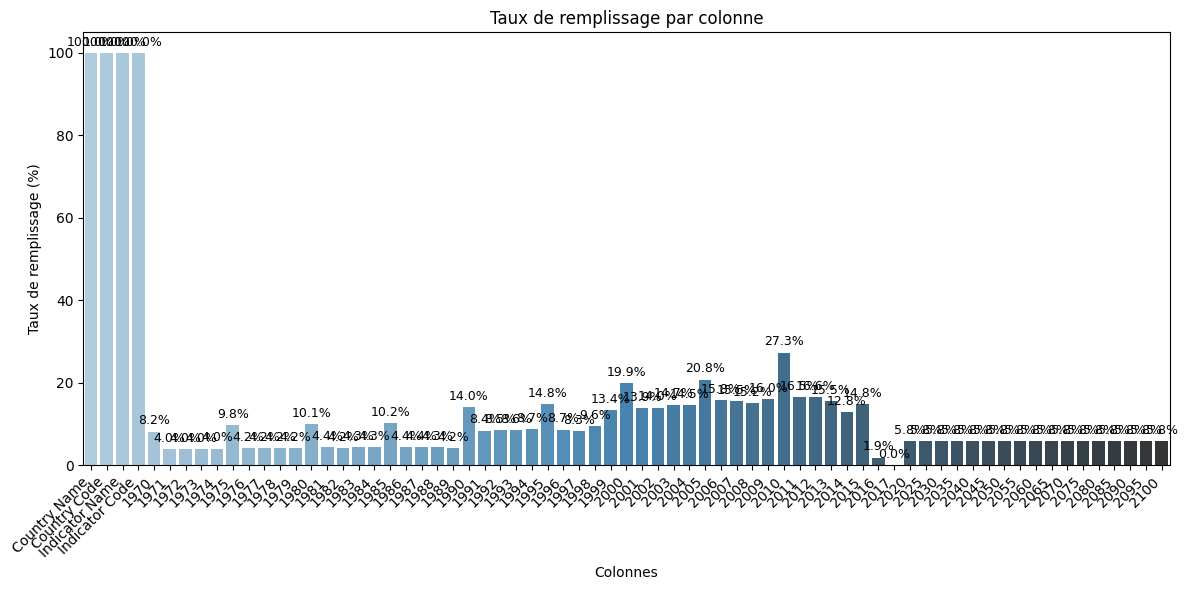

In [45]:
# 1. Calcul du taux de remplissage
taux = (ed_data.notna().mean() * 100).round(2)

# 2. Transformation en DataFrame pour seaborn
df_taux = taux.reset_index()
df_taux.columns = ['Colonne', 'TauxRemplissage']

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_taux, x='Colonne', y='TauxRemplissage', hue='Colonne', palette='Blues_d')

# Afficher le taux au-dessus de chaque barre
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=3)

plt.title("Taux de remplissage par colonne")
plt.ylabel("Taux de remplissage (%)")
plt.xlabel("Colonnes")
plt.ylim(0, 105)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

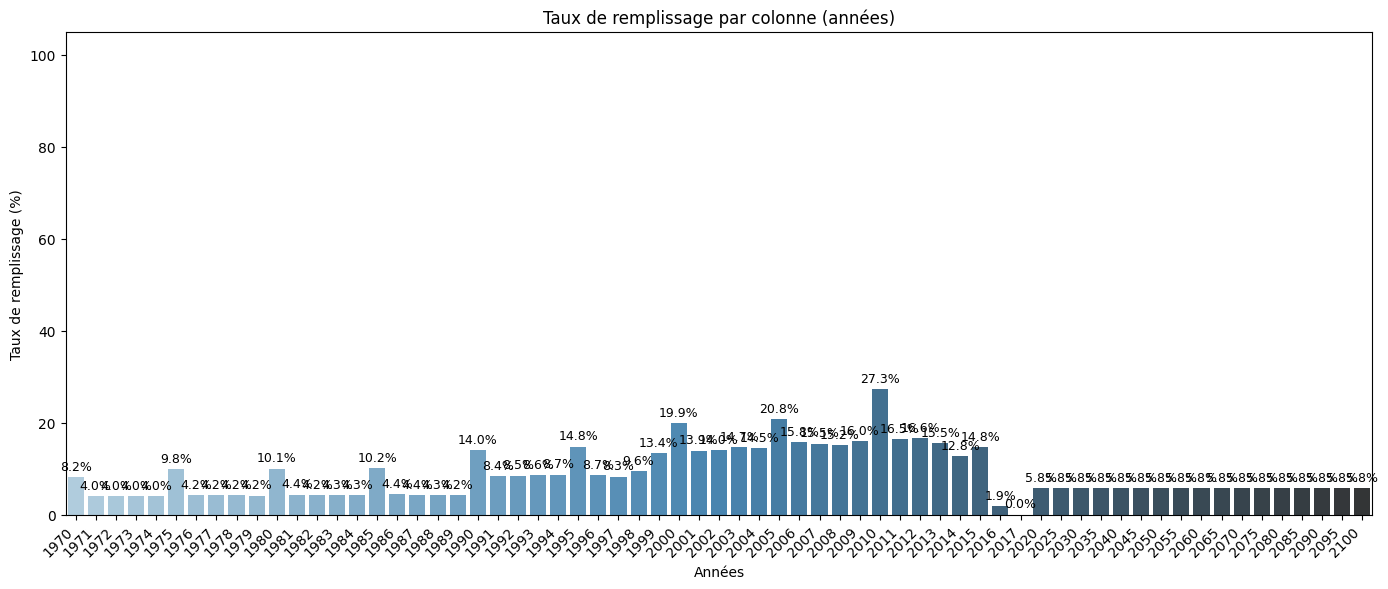

In [46]:
# 1. Sélectionner les colonnes de type année (supposons qu'elles commencent à l'index 4)
years_cols = ed_data.columns[4:]

# 2. Calculer le taux de remplissage pour chaque colonne
taux = ed_data[years_cols].notna().mean() * 100
taux = taux.round(2)

# 3. Transformation en DataFrame pour l'affichage
df_taux = taux.reset_index()
df_taux.columns = ['Colonne', 'TauxRemplissage']

# 4. Affichage avec seaborn
plt.figure(figsize=(14, 6))
ax = sns.barplot(
    data=df_taux,
    x='Colonne',
    y='TauxRemplissage',
    hue='Colonne',
    palette='Blues_d'
)

# 5. Ajouter les étiquettes au-dessus de chaque barre
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=3)

plt.title("Taux de remplissage par colonne (années)")
plt.ylabel("Taux de remplissage (%)")
plt.xlabel("Années")
plt.ylim(0, 105)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Créons une matrice de corrélation (pearson) pour voir les corrélation entre les années

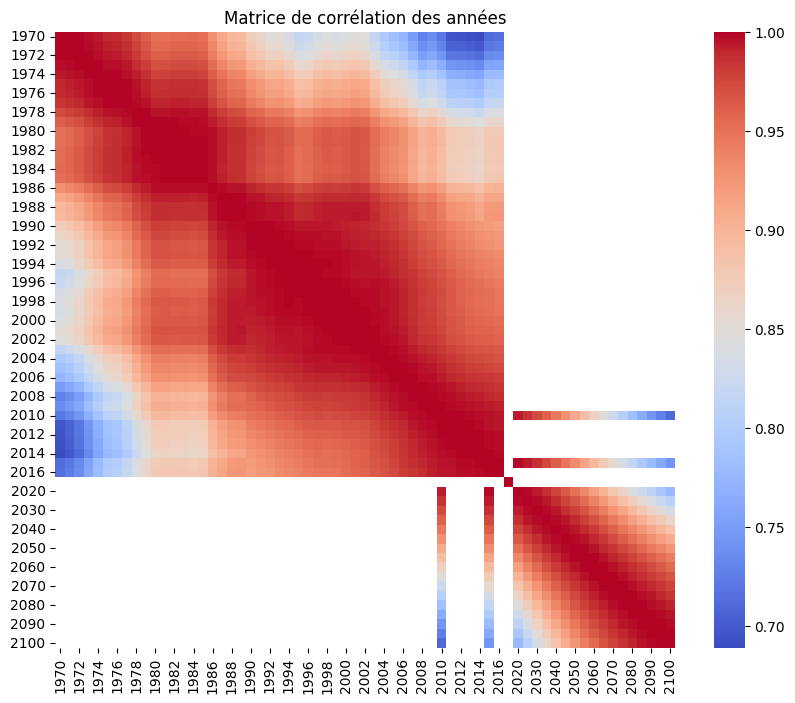

In [47]:
# Étape 1 : Sélectionnons les colonnes ayant des valeurs numériques ( dans le cas de ce DF, nous n'avons que les années)
years = ed_data.select_dtypes(include='number')

# Étape 2 : Calculer la matrice de corrélation avec la méthode pearson
years_correlation_matrix = years.corr(method='pearson')

# Etape 3 : Affichage de la matrice en mode Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(years_correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Matrice de corrélation des années")
plt.show()

Les données à partir de **2020** sont des projections. Celles au-delà de 2040 présentent un niveau d’incertitude élevé, rendant leur interprétation et leur exploitation moins fiables dans le cadre d’une prise de décision concrète.  

In [48]:
ed_data.shape

(886930, 69)

## Analyse de foot_note

### Description de chaque ligne

In [49]:
foot_note_info = foot_note.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


**CountryCode** : le code indicatif de chaque pays  
**SeriesCodes** : le code Série de chaque pays  
**Year** : l'année sur laquelle les datas sont données  
**DESCRIPTION** : source des données    

In [50]:
foot_note.rename(columns={'DESCRIPTION': 'Description'}, inplace=True)

### Nombre de lignes & colonnes 

In [51]:
foot_note.shape

(643638, 5)

### Calcul du nombre de doublons

In [52]:
foot_note.duplicated().sum()

0

Il n'y a pas de doublons dans le DF

### Valeurs manquantes

In [53]:
skim(foot_note)

/home/magali/.pyenv/versions/3.12.0/lib/python3.12/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 643638 │ │ string      │ 4     │                                                          │
│ │ Number of columns │ 5      │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA        ┃ NA %    ┃ mean   ┃ sd    ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ Unnamed: 4       │    643638 │     100 │    nan │   nan │   nan │   nan │   nan │   nan │    nan │         │  │
│ └──────────────────┴───────────┴─────────┴────────┴───────┴───────┴───────┴───────┴───────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ CountryCode               │       0 │          0 │                            1 │                   643638 │  │
│ │ SeriesCode                │       0 │          0 │                            1 │                   643638 │  │
│ │ Year                      │       0 │          0 │                            1 │                   643638 │  │
│ │ Description               │       0 │          0 │                          3.4 │                  2186579 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

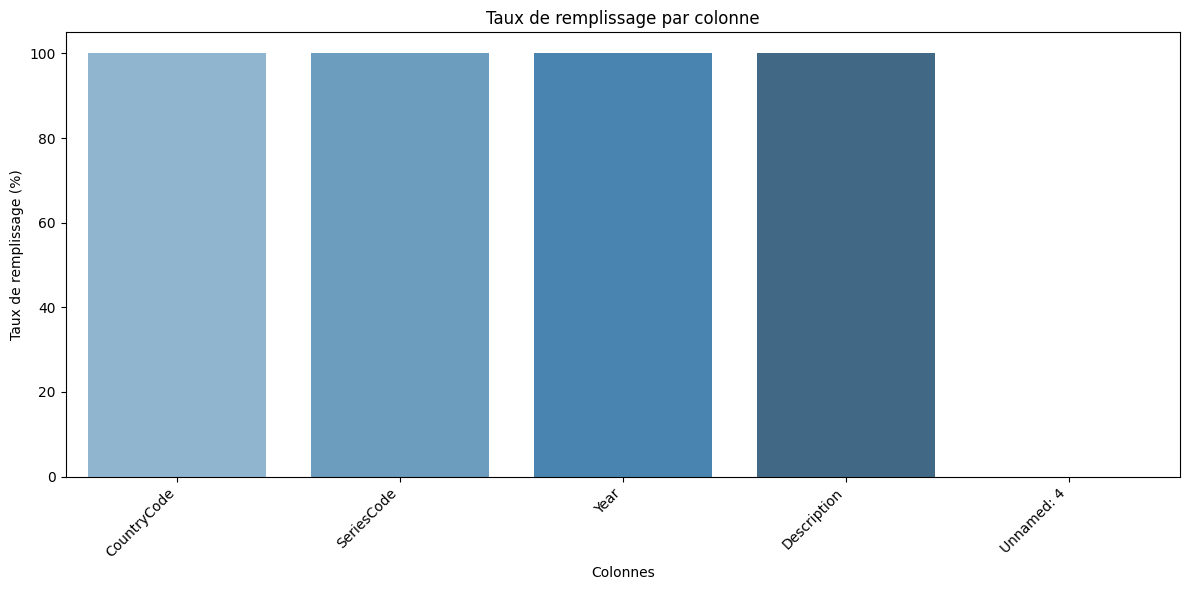

In [54]:
# 1. Calcul du taux de remplissage
taux = (foot_note.notna().mean() * 100).round(2)

# 2. Transformation en DataFrame pour seaborn
df_taux = taux.reset_index()
df_taux.columns = ['Colonne', 'TauxRemplissage']

# 3. Affichage avec seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=df_taux, x='Colonne', y='TauxRemplissage', hue='Colonne',  palette='Blues_d')

plt.title("Taux de remplissage par colonne")
plt.ylabel("Taux de remplissage (%)")
plt.xlabel("Colonnes")
plt.ylim(0, 105)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

On remarque que les colonnes *CountryCode*, *SeriesCode*, *Year* et *DESCRIPTION* sont totalement remplies.  
La colonne *Unnamed :4* est totalement vide, on peut donc la supprimer.

In [55]:
foot_note_filtered = foot_note.drop("Unnamed: 4", axis=1)

In [56]:
foot_note_filtered.columns

Index(['CountryCode', 'SeriesCode', 'Year', 'Description'], dtype='object')

La colonne **Unnamed :4**  a bien été supprimée.

In [57]:
foot_note_filtered.describe().T

count unique           top    freq
CountryCode  643638    239           LIC    7320
SeriesCode   643638   1558   SH.DYN.MORT    9226
Year         643638     56        YR2004   27128
Description  643638   9102  Country Data  191188

In [58]:
foot_note_filtered.value_counts("CountryCode")

CountryCode
LIC    7320
CYP    7183
LDC    6481
SSA    6389
SSF    6336
       ... 
IMN      32
CUW      23
XKX      12
MNP       4
FRO       2
Name: count, Length: 239, dtype: int64

In [59]:
foot_note_filtered.value_counts("SeriesCode")

SeriesCode
SH.DYN.MORT                  9226
SE.PRM.AGES                  8771
SE.PRM.DURS                  8771
SE.SEC.DURS                  8619
SE.SEC.AGES                  8581
                             ... 
UIS.XPubP.0                     1
UIS.XPubP.4                     1
UIS.XPubP.uk                    1
UIS.XSPENDP.1.FDPUB.FNCAP       1
UIS.XSPENDP.1.FDPUB.FNCUR       1
Name: count, Length: 1558, dtype: int64

In [60]:
foot_note_filtered.value_counts("Year")

Year
YR2004    27128
YR2005    25992
YR2002    25687
YR2003    25683
YR2000    25093
YR2001    25047
YR2008    25018
YR1999    24938
YR2007    24263
YR2006    23394
YR2009    22965
YR2010    22598
YR2011    17760
YR1998    14916
YR2012    13890
YR2013    13405
YR1994    11448
YR2014    11378
YR1992    11309
YR1996    11197
YR1995    11194
YR1997    11167
YR1991    11129
YR1993    11093
YR1990    10616
YR1986     9743
YR1985     9653
YR1989     9517
YR1981     9465
YR1984     9386
YR1988     9382
YR1987     9357
YR1983     9227
YR1982     9014
YR1980     8950
YR1979     8742
YR1976     8729
YR1972     8661
YR1975     8627
YR1977     8593
YR1978     8585
YR1973     8571
YR1974     8512
YR1971     8507
YR2015     6348
YR1970     5374
YR2016      819
YR2017      558
YR2035      144
YR2050      144
YR2045      144
YR2040      144
YR2030      140
YR2025      140
YR2020      140
yr2012       14
Name: count, dtype: int64

In [61]:
foot_note_filtered.value_counts("Description")

Description
Country Data                                      191188
UNESCO Institute for Statistics (UIS) estimate    171527
Estimated                                         117155
UIS Estimation                                     31395
Country estimation.                                26308
                                                   ...  
Uncertainty bound is 171.4 - 193.5                     1
Uncertainty bound is 171.4 - 195.2                     1
Uncertainty bound is 171.5 - 185.1                     1
Uncertainty bound is 171.5 - 189.7                     1
Uncertainty bound is 171.1 - 192.8                     1
Name: count, Length: 9102, dtype: int64

In [62]:
foot_note_filtered.shape

(643638, 4)

## Analyse de ed_series

### Description de chaque colonne

In [63]:
ed_series_info = ed_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

**Series Code**	Code unique identifiant chaque indicateur (ex: SP.POP.TOTL)  
  
**Topic	Catégorie** à laquelle appartient l’indicateur (ex: Population, Infrastructure)  
  
**Indicator Name**	Nom complet de l’indicateur (ex: Population, total)  
  
**Short definition**	Définition courte de l’indicateur (souvent absente ou redondante avec la longue)  
  
**Long definition**	Définition complète et précise de ce que mesure l’indicateur  
  
**Unit of measure**	Unité utilisée (ex. people, %, US dollars) — vide ici  
  
**Periodicity**	Fréquence de mise à jour (ex. Annual) — parfois vide  
  
**Base Period**	Année de base utilisée pour les données indexées ou relatives — ex. 2010  
  
**Other notes**	Commentaires complémentaires éventuels  
  
**Aggregation method**	Méthode d’agrégation (ex. Sum, Weighted Average) — peu remplie ici  
  
**Limitations and exceptions**	Limites ou particularités connues sur la donnée  
  
**Notes from original source**	Notes laissées par la source initiale (vide ici)  
  
**General comments**	Autres remarques générales  
  
**Source**	Nom de la source des données (ex. World Bank, ILO, WHO...)  
  
**Statistical concept and methodology**	Méthode statistique utilisée (définitions, modèles...)  
  
**Development relevance**	Lien entre l’indicateur et les enjeux de développement — très rarement rempli  
  
**Related source links**	Lien(s) vers les sources de données  
  
**Other web links**	Lien(s) divers ou complémentaires — vide ici  
  
**Related indicators**	Autres indicateurs liés ou similaires — vide ici  
  
**License Type**	Type de licence d’utilisation (ex: Open, Proprietary)  


### Nombre de lignes & colonnes 

In [64]:
ed_series.shape

(3665, 21)

### Calcul du nombre de doublons

In [65]:
ed_series.duplicated().sum()

0

Il n'y a pas de doublons dans le DF

### Valeurs manquantes

In [66]:
skim(ed_series)

/home/magali/.pyenv/versions/3.12.0/lib/python3.12/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 3665   │ │ string      │ 15    │                                                          │
│ │ Number of columns │ 21     │ │ float64     │ 6     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA     ┃ NA %   ┃ mean   ┃ sd   ┃ p0   ┃ p25  ┃ p50  ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ Unit of measure            │   3665 │    100 │    nan │  nan │  nan │  nan │  nan │  nan │   nan │         │  │
│ │ Notes from original source │   3665 │    100 │    nan │  nan │  nan │  nan │  nan │  nan │   nan │         │  │
│ │ Other web links            │   3665 │    100 │    nan │  nan │  nan │  nan │  nan │  nan │   nan │         │  │
│ │ Related indicators         │   3665 │    100 │    nan │  nan │  nan │  nan │  nan │  nan │   nan │         │  │
│ │ License Type               │   3665 │    100 │    nan │  nan │  nan │  nan │  nan │  nan │   nan │         │  │
│ │ Unnamed: 20                │   3665 │    100 │    nan │  nan │  nan │  nan │  nan │  nan │   nan │         │  │
│ └────────────────────────────┴────────┴────────┴────────┴──────┴──────┴──────┴──────┴──────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                         ┃ NA       ┃ NA %       ┃ words per row           ┃ total words        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Series Code                         │        0 │          0 │                       1 │               3668 │  │
│ │ Topic                               │        0 │          0 │                     1.6 │               6046 │  │
│ │ Indicator Name                      │        0 │          0 │                      11 │              41939 │  │
│ │ Short definition                    │     1509 │      41.17 │                      40 │             148277 │  │
│ │ Long definition                     │        0 │          0 │                      72 │             265471 │  │
│ │ Periodicity                         │     3566 │       97.3 │                   0.027 │                 99 │  │
│ │ Base Period                         │     3351 │      91.43 │                    0.34 │               1238 │  │
│ │ Other notes                         │     3113 │      84.94 │                    0.21 │                780 │  │
│ │ Aggregation method                  │     3618 │      98.72 │                   0.023 │                 84 │  │
│ │ Limitations and exceptions          │     3651 │      99.62 │                    0.54 │               1990 │  │
│ │ General comments                    │     3651 │      99.62 │                    0.12 │                447 │  │
│ │ Source                              │        0 │    

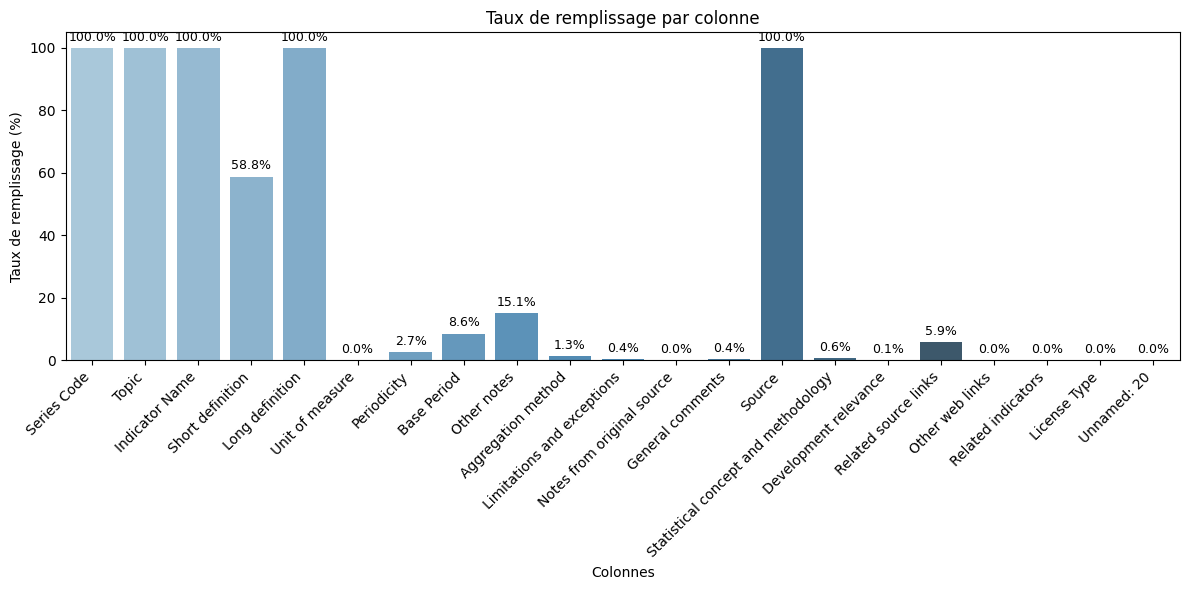

In [67]:
# 1. Calcul du taux de remplissage
taux = (ed_series.notna().mean() * 100).round(2)

# 2. Transformation en DataFrame pour seaborn
df_taux = taux.reset_index()
df_taux.columns = ['Colonne', 'TauxRemplissage']

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=df_taux,
    x='Colonne',
    y='TauxRemplissage',
    hue='Colonne',          
    palette='Blues_d',
    legend=False             
)

# Afficher le taux au-dessus de chaque barre
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=3)

plt.title("Taux de remplissage par colonne")
plt.ylabel("Taux de remplissage (%)")
plt.xlabel("Colonnes")
plt.ylim(0, 105)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

On peut prendre pour hypothèse que les colonnes remplies à moins de 60% ne contiennent pas assez de valeurs exploitables.

In [68]:
ed_series_clean = ed_series.loc[:, ed_series.notnull().mean() >= 0.6]

In [69]:
ed_series_clean.columns

Index(['Series Code', 'Topic', 'Indicator Name', 'Long definition', 'Source'], dtype='object')

In [70]:
ed_series_clean.shape

(3665, 5)

Il n'y a plus que **5 colonnes** au lieu de **22**

In [71]:
ed_series_clean.describe().T

count unique  \
Series Code      3665   3665   
Topic            3665     37   
Indicator Name   3665   3665   
Long definition  3665   2060   
Source           3665     31   

                                                               top  freq  
Series Code                            XGDP.56.FSGOV.FDINSTADM.FFD     1  
Topic                                            Learning Outcomes  1046  
Indicator Name   Government expenditure in tertiary institution...     1  
Long definition  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   215  
Source                             UNESCO Institute for Statistics  1269

## Nettoyage du DF Country

In [72]:
country_filtered.shape

(241, 28)

In [73]:
country_filtered_info = country_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 28 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Country Name                                       241 non-null    object 
 2   Currency Unit                                      215 non-null    object 
 3   Special Notes                                      145 non-null    object 
 4   Region                                             214 non-null    object 
 5   Income Group                                       214 non-null    object 
 6   WB-2 code                                          240 non-null    object 
 7   National accounts base year                        205 non-null    object 
 8   National accounts reference year                   32 non-null     float64
 9   SNA price 

In [74]:
len(country_filtered['Country Code'])

241

In [75]:
valid_codes = [c.alpha_3 for c in pycountry.countries]

### Première méthode avec liste des payx inexistants

In [76]:
false_country = country_filtered[~country_filtered['Country Code'].isin(valid_codes)]['Country Code'].unique().tolist()
false_country_names = country_filtered[country_filtered['Country Code'].isin(false_country)][['Country Code', 'Country Name']]
false_country_names

Country Code                                    Country Name
5            ARB                                      Arab World
35           CHI                                 Channel Islands
57           EAP           East Asia & Pacific (developing only)
58           EAS         East Asia & Pacific (all income levels)
59           ECA         Europe & Central Asia (developing only)
60           ECS       Europe & Central Asia (all income levels)
63           EMU                                       Euro area
68           EUU                                  European Union
89           HIC                                     High income
92           HPC          Heavily indebted poor countries (HIPC)
116          LAC     Latin America & Caribbean (developing only)
122          LCN   Latin America & Caribbean (all income levels)
123          LDC    Least developed countries: UN classification
124          LIC                                      Low income
127          LMC                             Lower middle income
128          LMY                             Low & middle income
140          MEA  Middle East & North Africa (all income levels)
143          MIC                                   Middle income
148          MNA    Middle East & North Africa (developing only)
157          NAC                                   North America
168          OED                                    OECD members
187          SAS                                      South Asia
198          SSA            Sub-Saharan Africa (developing only)
200          SSF          Sub-Saharan Africa (all income levels)
225          UMC                             Upper middle income
234          WLD                                           World
236          XKX                                          Kosovo

On remarque que des vrais Pays s'affiche dans cette liste. Nous devons donc leur réafecter leur bon code. ( Kosovo et Channel Islands)

In [77]:
# Dictionnaire de correction manuelle
corrections = {
    "XKX": "XK",
    "CHI": "GBR", 
}

# Appliquer les corrections dans country_clean
country_filtered['Country Code'] = country_filtered['Country Code'].replace(corrections)

# Liste complète des codes valides reconnus par pycountry
valid_codes = [c.alpha_3 for c in pycountry.countries]

# Supprimer les lignes qui ont un code toujours invalide après correction
country_clean = country_filtered[country_filtered['Country Code'].isin(valid_codes)]

codes_deleted = country_filtered[~country_filtered['Country Code'].isin(valid_codes)][['Country Code', 'Country Name']]
codes_deleted

Country Code                                    Country Name
5            ARB                                      Arab World
57           EAP           East Asia & Pacific (developing only)
58           EAS         East Asia & Pacific (all income levels)
59           ECA         Europe & Central Asia (developing only)
60           ECS       Europe & Central Asia (all income levels)
63           EMU                                       Euro area
68           EUU                                  European Union
89           HIC                                     High income
92           HPC          Heavily indebted poor countries (HIPC)
116          LAC     Latin America & Caribbean (developing only)
122          LCN   Latin America & Caribbean (all income levels)
123          LDC    Least developed countries: UN classification
124          LIC                                      Low income
127          LMC                             Lower middle income
128          LMY                             Low & middle income
140          MEA  Middle East & North Africa (all income levels)
143          MIC                                   Middle income
148          MNA    Middle East & North Africa (developing only)
157          NAC                                   North America
168          OED                                    OECD members
187          SAS                                      South Asia
198          SSA            Sub-Saharan Africa (developing only)
200          SSF          Sub-Saharan Africa (all income levels)
225          UMC                             Upper middle income
234          WLD                                           World
236           XK                                          Kosovo

In [78]:
country_clean.head(5)

Country Code Country Name   Currency Unit  \
0          ABW        Aruba   Aruban florin   
1          AFG  Afghanistan  Afghan afghani   
2          AGO       Angola  Angolan kwanza   
3          ALB      Albania    Albanian lek   
4          AND      Andorra            Euro   

                                       Special Notes  \
0  SNA data for 2000-2011 are updated from offici...   
1  Fiscal year end: March 20; reporting period fo...   
2  April 2013 database update: Based on IMF data,...   
3                                                NaN   
4                                                NaN   

                      Region          Income Group WB-2 code  \
0  Latin America & Caribbean  High income: nonOECD        AW   
1                 South Asia            Low income        AF   
2         Sub-Saharan Africa   Upper middle income        AO   
3      Europe & Central Asia   Upper middle income        AL   
4      Europe & Central Asia  High income: nonOECD        AD   

                         National accounts base year  \
0                                               2000   
1                                            2002/03   
2                                               2002   
3  Original chained constant price data are resca...   
4                                               1990   

   National accounts reference year                   SNA price valuation  \
0                               NaN     Value added at basic prices (VAB)   
1                               NaN     Value added at basic prices (VAB)   
2                               NaN  Value added at producer prices (VAP)   
3                            1996.0     Value added at basic prices (VAB)   
4                               NaN                                   NaN   

   ...    Government Accounting concept  \
0  ...                              NaN   
1  ...  Consolidated central government   
2  ...     Budgetary central government   
3  ...     Budgetary central government   
4  ...                              NaN   

            IMF data dissemination standard  \
0                                       NaN   
1  General Data Dissemination System (GDDS)   
2  General Data Dissemination System (GDDS)   
3  General Data Dissemination System (GDDS)   
4                                       NaN   

                            Latest population census  \
0                                               2010   
1                                               1979   
2                                               1970   
3                                               2011   
4  2011. Population figures compiled from adminis...   

                             Latest household survey  \
0                                                NaN   
1  Multiple Indicator Cluster Survey (MICS), 2010/11   
2               Malaria Indicator Survey (MIS), 2011   
3       Demographic and Health Survey (DHS), 2008/09   
4                                                NaN   

   Source of most recent Income and expenditure data  \
0                                                NaN   
1            Integrated household survey (IHS), 2008   
2            Integrated household survey (IHS), 2008   
3  Living Standards Measurement Study Survey (LSM...   
4                                                NaN   

  Vital registration complete Latest agricultural census  \
0                         Yes                        NaN   
1                         NaN                    2013/14   
2                         NaN                       2015   
3                         Yes                       2012   
4                         Yes                        NaN   

  Latest industrial data Latest trade data Latest water withdrawal data  
0                    NaN            2012.0                          NaN  
1                    NaN            2012.0                         2000  
2                    NaN               NaN                   

In [79]:
country_clean.shape

(215, 28)

### Deuxième méthode avec merge

In [80]:
### On crée un DF avec une colonne uniquem ' Country Code'
valid_codes_df = pd.DataFrame(valid_codes, columns=['Country Code'])

In [81]:
### On merge les DF country_filtered & valid_codes_df avec 'inner' = on ne garde que les lignes de country_filtered 
### dont le 'Country Code' est présent dans le DF valid_codes_df
country_clean_v2 = country_filtered.merge(valid_codes_df, on='Country Code', how='inner')


In [82]:
country_clean_v2.shape

(215, 28)

#### Vérification

In [83]:
## On crée 2 nouveaux DF, partant de country_clean & country_clean_v2, en triant toutes les colonnes 
### par ordre alphabétique & ordre croissant des valeurs, & on réinitialise les index.
country_clean_sorted = country_clean.sort_values(by=country_clean.columns.tolist()).reset_index(drop=True)
country_clean_v2_sorted = country_clean_v2.sort_values(by=country_clean_v2.columns.tolist()).reset_index(drop=True)

### On utilise la fonction equals pour voir si les DF sont identiques : renvoie TRUE si vrai, FALSE si faux
country_clean_sorted.equals(country_clean_v2_sorted)


True

**Les deux dataframes sont bien identiques**

## Indicateurs à supprimer

Pour trouver quels indicateurs sont à supprimer, nous allons partir de **ed_series_clean**, qui contient les **Series Codes** et les **Topic** et **ed_data_clean** qui contient les **Indicator Code** et **Indicator Name**, et **country_clean** qui nous donne les informations générales sur les pays.

In [84]:
ed_series_clean = ed_series_clean.copy()
ed_data_clean = ed_data.copy()
country_clean = country_clean.copy()

In [85]:
country_clean.sort_values(by='Latest population census', ascending=True).head(5)

Country Code     Country Name    Currency Unit  \
2            AGO           Angola   Angolan kwanza   
118          LBN          Lebanon   Lebanese pound   
1            AFG      Afghanistan   Afghan afghani   
147          MMR          Myanmar     Myanmar kyat   
40           COD  Dem. Rep. Congo  Congolese franc   

                                         Special Notes  \
2    April 2013 database update: Based on IMF data,...   
118                                                NaN   
1    Fiscal year end: March 20; reporting period fo...   
147  Fiscal year end: March 31; reporting period fo...   
40   Based on INS (2000-09) and IMF (2010-13) data,...   

                         Region         Income Group WB-2 code  \
2            Sub-Saharan Africa  Upper middle income        AO   
118  Middle East & North Africa  Upper middle income        LB   
1                    South Asia           Low income        AF   
147         East Asia & Pacific           Low income        MM   
40           Sub-Saharan Africa           Low income        ZR   

    National accounts base year  National accounts reference year  \
2                          2002                               NaN   
118                        1997                               NaN   
1                       2002/03                               NaN   
147                     2005/06                               NaN   
40                         2005                               NaN   

                      SNA price valuation  ...  \
2    Value added at producer prices (VAP)  ...   
118     Value added at basic prices (VAB)  ...   
1       Value added at basic prices (VAB)  ...   
147  Value added at producer prices (VAP)  ...   
40      Value added at basic prices (VAB)  ...   

       Government Accounting concept  \
2       Budgetary central government   
118     Budgetary central government   
1    Consolidated central government   
147  Consolidated central government   
40   Consolidated central government   

              IMF data dissemination standard Latest population census  \
2    General Data Dissemination System (GDDS)                     1970   
118  General Data Dissemination System (GDDS)                     1970   
1    General Data Dissemination System (GDDS)                     1979   
147  General Data Dissemination System (GDDS)                     1983   
40   General Data Dissemination System (GDDS)                     1984   

                               Latest household survey  \
2                 Malaria Indicator Survey (MIS), 2011   
118     Multiple Indicator Cluster Survey (MICS), 2000   
1    Multiple Indicator Cluster Survey (MICS), 2010/11   
147  Multiple Indicator Cluster Survey (MICS), 2009/10   
40           Demographic and Health Survey (DHS), 2013   

    Source of most recent Income and expenditure data  \
2             Integrated household survey (IHS), 2008   
118                                               NaN   
1             Integrated household survey (IHS), 2008   
147                                               NaN   
40                      1-2-3 survey (1-2-3), 2004/05   

    Vital registration complete Latest agricultural census  \
2                           NaN                       2015   
118                         Yes                       2011   
1                           NaN                    2013/14   
147                         NaN                       2010   
40                          NaN                        NaN   

    Latest industrial data Latest trade data Latest water withdrawal data  
2                      NaN               NaN                         2005  
118                 2007.0            2012.0                         2005  
1                      NaN            2012.0                         2000  
147                 2003.0            2010.0                         2000  
40                     NaN               NaN                         2005  

[5 rows x

### Colonnes à supprimer

In [86]:
country_clean.columns

Index(['Country Code', 'Country Name', 'Currency Unit', 'Special Notes',
       'Region', 'Income Group', 'WB-2 code', 'National accounts base year',
       'National accounts reference year', 'SNA price valuation',
       'Lending category', 'Other groups', 'System of National Accounts',
       'Alternative conversion factor', 'PPP survey year',
       'Balance of Payments Manual in use', 'External debt Reporting status',
       'System of trade', 'Government Accounting concept',
       'IMF data dissemination standard', 'Latest population census',
       'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data'],
      dtype='object')

Certaines de ces colonnes ont peu d'intêret pour notre etude.

In [87]:
useless_columns_country = [
    'WB-2 code', 'National accounts base year', 'National accounts reference year',
    'SNA price valuation', 'Other groups', 'System of National Accounts',
    'Alternative conversion factor', 'PPP survey year', 'Balance of Payments Manual in use',
    'External debt Reporting status', 'System of trade', 'Government Accounting concept',
    'IMF data dissemination standard', 'Source of most recent Income and expenditure data',
    'Vital registration complete', 'Latest agricultural census', 'Latest industrial data',
    'Latest trade data', 'Latest water withdrawal data'
]


In [88]:
country_filtered = country_clean.drop(useless_columns_country , axis=1)

In [89]:
country_filtered.columns

Index(['Country Code', 'Country Name', 'Currency Unit', 'Special Notes',
       'Region', 'Income Group', 'Lending category',
       'Latest population census', 'Latest household survey'],
      dtype='object')

In [90]:
ed_series_clean.columns

Index(['Series Code', 'Topic', 'Indicator Name', 'Long definition', 'Source'], dtype='object')

In [91]:
ed_data_clean.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100'],
      dtype='object')

On peut créer un nouveau DF qui contient les colonnes **Country Name**, **Country Code**, **Indicator Code** , **Indicator Name** ainsi que toutes les années.

### Nouveau DF de travail

In [92]:
df_indicators = ed_series_clean[['Indicator Name', 'Topic']].merge(ed_data_clean, on='Indicator Name', how='left')
df_indicators = country_filtered[['Country Code', 'Country Name','Region', 'Income Group', 'Latest population census']].merge(df_indicators, on=['Country Code', 'Country Name'], how='inner')
df_indicators

Country Code Country Name                     Region  \
0               ABW        Aruba  Latin America & Caribbean   
1               ABW        Aruba  Latin America & Caribbean   
2               ABW        Aruba  Latin America & Caribbean   
3               ABW        Aruba  Latin America & Caribbean   
4               ABW        Aruba  Latin America & Caribbean   
...             ...          ...                        ...   
624580          ZWE     Zimbabwe         Sub-Saharan Africa   
624581          ZWE     Zimbabwe         Sub-Saharan Africa   
624582          ZWE     Zimbabwe         Sub-Saharan Africa   
624583          ZWE     Zimbabwe         Sub-Saharan Africa   
624584          ZWE     Zimbabwe         Sub-Saharan Africa   

                Income Group Latest population census  \
0       High income: nonOECD                     2010   
1       High income: nonOECD                     2010   
2       High income: nonOECD                     2010   
3       High income: nonOECD                     2010   
4       High income: nonOECD                     2010   
...                      ...                      ...   
624580            Low income                     2012   
624581            Low income                     2012   
624582            Low income                     2012   
624583            Low income                     2012   
624584            Low income                     2012   

                                           Indicator Name         Topic  \
0       Barro-Lee: Percentage of female population age...    Attainment   
1       Barro-Lee: Percentage of population age 15-19 ...    Attainment   
2       Barro-Lee: Percentage of female population age...    Attainment   
3       Barro-Lee: Percentage of population age 15+ wi...    Attainment   
4       Barro-Lee: Percentage of female population age...    Attainment   
...                                                   ...           ...   
624580  Government expenditure per upper secondary stu...  Expenditures   
624581  Government expenditure per post-secondary non-...  Expenditures   
624582  Government expenditure per tertiary student (c...  Expenditures   
624583  Government expenditure in secondary institutio...  Expenditures   
624584  Government expenditure in tertiary institution...  Expenditures   

                     Indicator Code  1970  1971  ...  2055  2060  2065  2070  \
0               BAR.NOED.1519.FE.ZS   NaN   NaN  ...   NaN   NaN   NaN   NaN   
1                  BAR.NOED.1519.ZS   NaN   NaN  ...   NaN   NaN   NaN   NaN   
2               BAR.NOED.15UP.FE.ZS   NaN   NaN  ...   NaN   NaN   NaN   NaN   
3                  BAR.NOED.15UP.ZS   NaN   NaN  ...   NaN   NaN   NaN   NaN   
4               BAR.NOED.2024.FE.ZS   NaN   NaN  ...   NaN   NaN   NaN   NaN   
...                             ...   ...   ...  ...   ...   ...   ...   ...   
624580    UIS.XUNIT.USCONST.3.FSGOV   NaN   NaN  ...   NaN   NaN   NaN   NaN   
624581    UIS.XUNIT.USCONST.4.FSGOV   NaN   NaN  ...   NaN   NaN   NaN   NaN   
624582   UIS.XUNIT.USCONST.56.FSGOV   NaN   NaN  ...   NaN   NaN   NaN   NaN   
624583  XGDP.23.FSGOV.FDINSTADM.FFD   NaN   NaN  ...   NaN   NaN   NaN   NaN   
624584  XGDP.56.FSGOV.FDINSTADM.FFD   NaN   NaN  ...   NaN   NaN   NaN   NaN   

        2075  2080  2085  2090  2095  2100  
0        NaN   NaN   NaN   NaN   NaN   NaN  
1        NaN   NaN   NaN   NaN   NaN   NaN  
2        NaN   NaN   NaN   NaN   NaN   NaN  
3        NaN   NaN   NaN   NaN   NaN   NaN  
4        NaN   NaN   NaN   NaN   NaN   NaN  
...      ...   ...   ...   ...   ...   ...  
624580   NaN   NaN   NaN   NaN   NaN   NaN  
624581   NaN   NaN   NaN   NaN   NaN   NaN  
624582   NaN   NaN   NaN   NaN   NaN   NaN  
624583   NaN   NaN   NaN   NaN   NaN   NaN  
624584   NaN   NaN   NaN   NaN   NaN   NaN  

[624585 rows x 73 columns]

In [93]:
df_indicators.shape

(624585, 73)

Nous avons vu lors du nettoyage du **DF Country** que certains pays inexistants étaient dans la liste des **Country Code**. Il faut donc les enlever

In [94]:
df_indicators.columns

Index(['Country Code', 'Country Name', 'Region', 'Income Group',
       'Latest population census', 'Indicator Name', 'Topic', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100'],
      dtype='object')

### Premier filtre sur les Années

#### Matrice de Corrélation

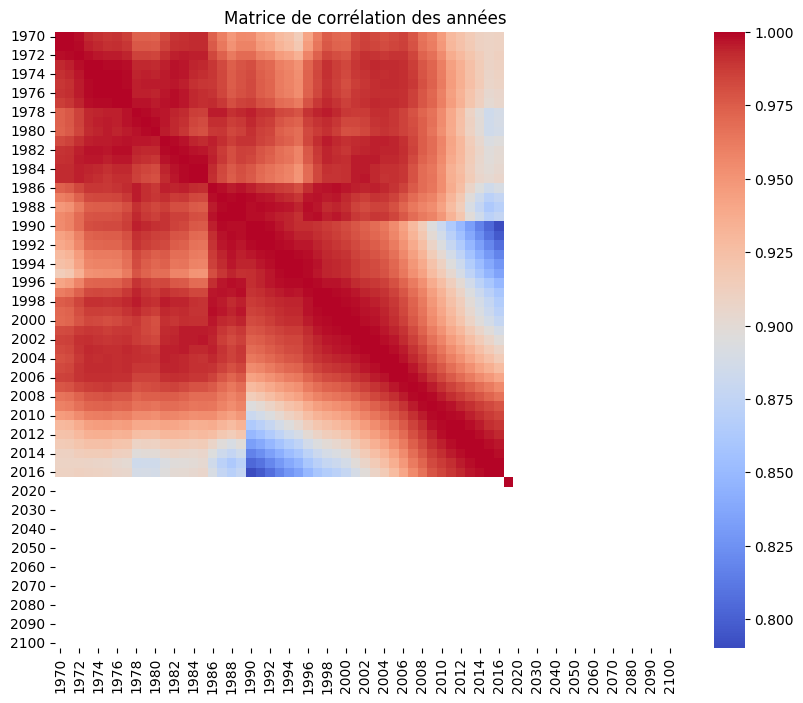

In [95]:
# Étape 1 : Sélectionner les colonnes numériques
years = df_indicators.select_dtypes(include='number')

# Étape 4 : Calculer la matrice de corrélation
years_correlation_matrix = years.corr(method='pearson')

# Étape 5 : Afficher la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(years_correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Matrice de corrélation des années")
plt.show()

Plus les années sont proches temporellement, plus l'indice de corrélation est fort.  
On peut noter également que pour les années **~>2020** les indices sont plus faibles : c'est normal, ce sont des projections.

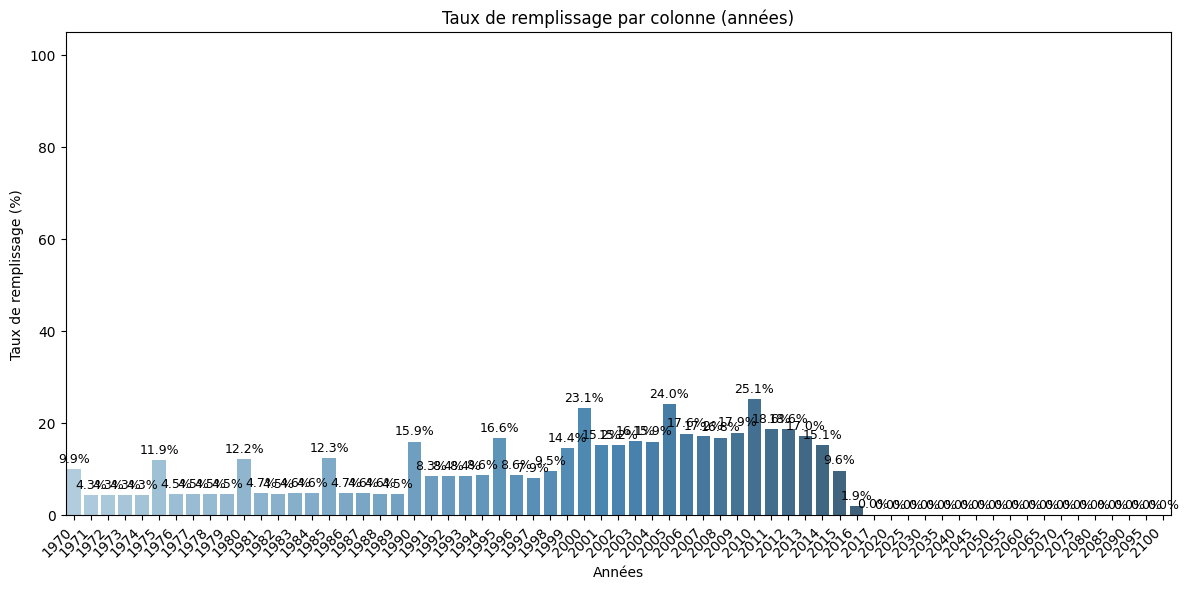

In [96]:
# 1.On garde les colonnes dans df_indicators qui sont des nombres , dans notre cas, il n'y a que les années
years_cols = [col for col in df_indicators.columns if col.isdigit()]

# 2. Calculer la proportion de valeurs non manquantes par année
years_proportion_completed = df_indicators[years_cols].notna().mean()

# 3. Transformation en DataFrame pour seaborn
df_taux = (years_proportion_completed * 100).round(2).reset_index()
df_taux.columns = ['Colonne', 'TauxRemplissage']

# 4. Affichage
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_taux, x='Colonne', y='TauxRemplissage', hue='Colonne', palette='Blues_d')

### Afficher le taux au-dessus de chaque barre
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=3)

plt.title("Taux de remplissage par colonne (années)")
plt.ylabel("Taux de remplissage (%)")
plt.xlabel("Années")
plt.ylim(0, 105)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

faire un bfi

Les années après **2016** sont peu remplies : c'est normal, ce sont des projections sur l'avenir. L'intégralité des indicateurs ne peut pas avoir de valeurs.
idem pour les valeurs avant **1990**

bfill = si NaN alors on rempli avec la valeur d'avant  
faire les counts & voir taux de remplissage

Séparer colonne future & passé - qui est rempli comment. D'abord analyser le passé puis après le futur

In [97]:
# 1. Construire la liste des années à supprimer : celles < 1990 et celles > 2040
years_passed = list(np.arange(1970, 2017))
years_futur = list(np.arange(2017, 2101))


# 2. Convertir ces années en chaînes
years_passed = [str(year) for year in years_passed]
years_futur = [str(year) for year in years_futur]

## Les colonnes du DF sont des chaînes. On transforme donc chaque année de la liste crée en chaîne de caractères.

# 3. Filtrer les colonnes à supprimer 
cols_to_keep_futur = [col for col in df_indicators.columns if not col.isdigit() or col not in years_passed]
cols_to_keep_passed = [col for col in df_indicators.columns if not col.isdigit() or col not in years_futur]

## On garde : les colonnes non numériques (col if not col.isdigit()
## Pour ces colonnes on garde les colonnes non présentes dans la liste years_to_delete_str

# 4. Créer un nouveau DataFrame avec ces colonnes
df_indicators_futur = df_indicators[cols_to_keep_futur]
df_indicators_passed = df_indicators[cols_to_keep_passed]


## Les années de 1970 à 2016

#### Filtre sur les Topic

Mark veut étendre *academy* , un site de formation en ligne pour les lycéens et  +.  
Il y a plusieurs types de Topic à regarder :  
- Population du pays
- Richesse du pays
- Accès à Internet
- L'éducation

Prouver le choix de chaque Topic. Rajouter Roleplay ou enlever Education Equality.  Regarder si les gens sont riches.  Avoir accès a internet. taille de la population visée. (1 truc d'éducation, 1 truc d'argent, internet, 1 truc de population)  
topic d'éducation = comment choisir ? les 3 autres ok pour commencer.
puis après topic d'éducation.
Si 4 indicateurs : comment choisir l'indicateur == le plus rempli.

In [98]:
df_indicators_passed= df_indicators_passed.rename(columns={'Country Name_x': 'Country Name'})

In [99]:
topic_list = df_indicators_passed['Topic'].unique().tolist()
topic_list

['Attainment',
 'Education Equality',
 'Infrastructure: Communications',
 'Learning Outcomes',
 'Economic Policy & Debt: Purchasing power parity',
 'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
 'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
 'Teachers',
 'Education Management Information Systems (SABER)',
 'Early Child Development (SABER)',
 'Engaging the Private Sector (SABER)',
 'School Health and School Feeding (SABER)',
 'School Finance (SABER)',
 'Student Assessment (SABER)',
 'Teachers (SABER)',
 'Tertiary Education (SABER)',
 'Workforce Development (SABER)',
 'Literacy',
 'Background',
 'Primary',
 'Secondary',
 'Tertiary',
 'Early Childhood Education',
 'Pre-Primary',
 'Expenditures',
 'Health: Risk factors',
 'Social Protection & Labor: Labor force structure',
 'Population',
 'Health: Population: Dynamics',
 'Health: Population: Structure',
 'EMIS',
 'Post-Secondary/Non-Tertiary']

### Topic à étudier

In [100]:
topics_to_keep = [
    'Population',
    'Infrastructure: Communications',
    'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
]

#### Taux de remplissage de chaque colonne par Topic

Regardons maintenant le taux de remplissage de chaque topic

In [101]:
# 2. Filtrer les lignes du DataFrame df_indicators contenant ces topics
df_filtered_topics = df_indicators_passed[df_indicators_passed['Topic'].isin(topics_to_keep)]


# 4. Calculer le taux de remplissage (valeurs non manquantes) par Topic
taux_par_topic = df_filtered_topics.groupby('Topic')[years_passed].apply(lambda x: x.notna().mean().mean() * 100).round(2)

# 5. Transformer en DataFrame pour affichage clair
df_taux = taux_par_topic.reset_index()
df_taux.columns = ['Topic', 'Taux de remplissage (%)']
df_taux

Topic  Taux de remplissage (%)
0  Economic Policy & Debt: National accounts: Atl...                    73.80
1                     Infrastructure: Communications                    36.19
2                                         Population                    53.69

Au vu des taux de remplissage par **Topic** , on peut penser que certaines années sont vides.

In [102]:
df_indicators_passed.columns

Index(['Country Code', 'Country Name', 'Region', 'Income Group',
       'Latest population census', 'Indicator Name', 'Topic', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016'],
      dtype='object')

In [103]:
df_filtered_topics.columns

Index(['Country Code', 'Country Name', 'Region', 'Income Group',
       'Latest population census', 'Indicator Name', 'Topic', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016'],
      dtype='object')

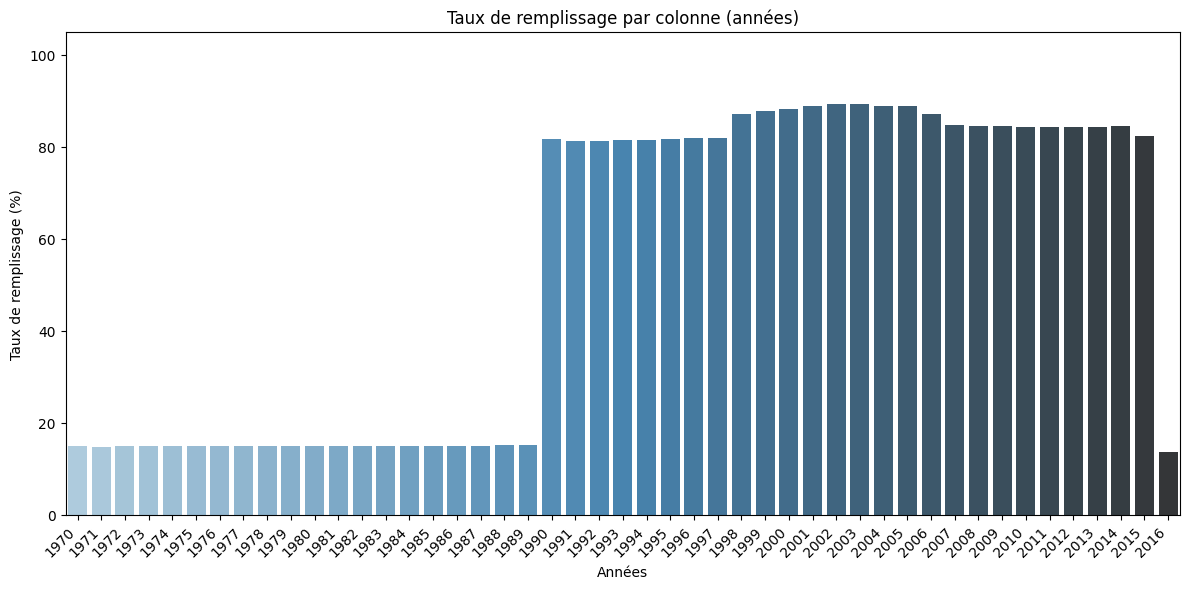

In [104]:
# 1. Calculer la proportion de valeurs non manquantes par année
years_proportion_completed = df_filtered_topics[years_passed].notna().mean()

# 2. Transformation en DataFrame pour seaborn
df_taux = (years_proportion_completed * 100).round(2).reset_index()
df_taux.columns = ['Colonne', 'TauxRemplissage']

# 3. Affichage
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_taux, x='Colonne', y='TauxRemplissage', hue='Colonne', palette='Blues_d')


plt.title("Taux de remplissage par colonne (années)")
plt.ylabel("Taux de remplissage (%)")
plt.xlabel("Années")
plt.ylim(0, 105)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

On remarque que les années avant 1990 sont peu remplis. Regardons en détail chacun des Topic pour voir quels pays n'ont pas beaucoup de données.

In [105]:
df_bfilled = df_filtered_topics.copy()
df_bfilled = df_bfilled.bfill(axis=1)
df_bfilled

Country Code Country Name                     Region  \
610             ABW        Aruba  Latin America & Caribbean   
611             ABW        Aruba  Latin America & Caribbean   
1621            ABW        Aruba  Latin America & Caribbean   
1999            ABW        Aruba  Latin America & Caribbean   
2000            ABW        Aruba  Latin America & Caribbean   
...             ...          ...                        ...   
624394          ZWE     Zimbabwe         Sub-Saharan Africa   
624395          ZWE     Zimbabwe         Sub-Saharan Africa   
624396          ZWE     Zimbabwe         Sub-Saharan Africa   
624397          ZWE     Zimbabwe         Sub-Saharan Africa   
624398          ZWE     Zimbabwe         Sub-Saharan Africa   

                Income Group Latest population census  \
610     High income: nonOECD                     2010   
611     High income: nonOECD                     2010   
1621    High income: nonOECD                     2010   
1999    High income: nonOECD                     2010   
2000    High income: nonOECD                     2010   
...                      ...                      ...   
624394            Low income                     2012   
624395            Low income                     2012   
624396            Low income                     2012   
624397            Low income                     2012   
624398            Low income                     2012   

                                           Indicator Name  \
610                   Personal computers (per 100 people)   
611                       Internet users (per 100 people)   
1621           GNI per capita, Atlas method (current US$)   
1999                         Population, ages 3-5, female   
2000                           Population, ages 3-5, male   
...                                                   ...   
624394  Population of the official age for post-second...   
624395  Population of the official age for post-second...   
624396  Population of compulsory school age, both sexe...   
624397  Population of compulsory school age, female (n...   
624398  Population of compulsory school age, male (num...   

                                                    Topic     Indicator Code  \
610                        Infrastructure: Communications     IT.CMP.PCMP.P2   
611                        Infrastructure: Communications     IT.NET.USER.P2   
1621    Economic Policy & Debt: National accounts: Atl...     NY.GNP.PCAP.CD   
1999                                           Population  SP.POP.0305.FE.UN   
2000                                           Population  SP.POP.0305.MA.UN   
...                                                   ...                ...   
624394                                         Population        UIS.SAP.4.F   
624395                                         Population        UIS.SAP.4.M   
624396                                         Population         UIS.SAP.CE   
624397                                         Population       UIS.SAP.CE.F   
624398                                         Population       UIS.SAP.CE.M   

             1970       1971  ...       2007       2008       2009       2010  \
610      7.923544   7.923544  ...        NaN        NaN        NaN        NaN   
611           0.0        0.0  ...       30.9       52.0       58.0       62.0   
1621          NaN        NaN  ...        NaN        NaN        NaN        NaN   
1999       1625.0     1625.0  ...     2201.0     2177.0     2148.0     2116.0   
2000       1823.0     1823.0  ...     2296.0     2268.0     2236.0     2200.0   
...           ...        ...  ...        ...        ...        ...        ...   
624394   301015.0   301015.0  ...   334139.0   334053.0   334139.0   334335.0   
624395   299852.0   299852.0  ...   329594.0   329584.0   330346.0   331524.0   
624396  2455719.0  2455719.0  ...  2445059.0  2459614.0  2485168.0  2520854.0   
624397  1225021.0  1225021.0  ...  1220060.0  1227284.0  1239

### Indicateurs du Topic 'Popuplation'

In [106]:
topic_population = df_filtered_topics[df_filtered_topics['Topic'] == 'Population']
topic_population.columns

Index(['Country Code', 'Country Name', 'Region', 'Income Group',
       'Latest population census', 'Indicator Name', 'Topic', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016'],
      dtype='object')

In [107]:
topic_population.rename(columns={'Country Name_x': 'Country Name'})

Country Code Country Name                     Region  \
1999            ABW        Aruba  Latin America & Caribbean   
2000            ABW        Aruba  Latin America & Caribbean   
2001            ABW        Aruba  Latin America & Caribbean   
2002            ABW        Aruba  Latin America & Caribbean   
2003            ABW        Aruba  Latin America & Caribbean   
...             ...          ...                        ...   
624394          ZWE     Zimbabwe         Sub-Saharan Africa   
624395          ZWE     Zimbabwe         Sub-Saharan Africa   
624396          ZWE     Zimbabwe         Sub-Saharan Africa   
624397          ZWE     Zimbabwe         Sub-Saharan Africa   
624398          ZWE     Zimbabwe         Sub-Saharan Africa   

                Income Group Latest population census  \
1999    High income: nonOECD                     2010   
2000    High income: nonOECD                     2010   
2001    High income: nonOECD                     2010   
2002    High income: nonOECD                     2010   
2003    High income: nonOECD                     2010   
...                      ...                      ...   
624394            Low income                     2012   
624395            Low income                     2012   
624396            Low income                     2012   
624397            Low income                     2012   
624398            Low income                     2012   

                                           Indicator Name       Topic  \
1999                         Population, ages 3-5, female  Population   
2000                           Population, ages 3-5, male  Population   
2001                          Population, ages 3-5, total  Population   
2002                         Population, ages 4-6, female  Population   
2003                           Population, ages 4-6, male  Population   
...                                                   ...         ...   
624394  Population of the official age for post-second...  Population   
624395  Population of the official age for post-second...  Population   
624396  Population of compulsory school age, both sexe...  Population   
624397  Population of compulsory school age, female (n...  Population   
624398  Population of compulsory school age, male (num...  Population   

           Indicator Code  1970  1971  ...       2007       2008       2009  \
1999    SP.POP.0305.FE.UN   NaN   NaN  ...     2201.0     2177.0     2148.0   
2000    SP.POP.0305.MA.UN   NaN   NaN  ...     2296.0     2268.0     2236.0   
2001    SP.POP.0305.TO.UN   NaN   NaN  ...     4497.0     4445.0     4384.0   
2002    SP.POP.0406.FE.UN   NaN   NaN  ...     2210.0     2189.0     2163.0   
2003    SP.POP.0406.MA.UN   NaN   NaN  ...     2301.0     2277.0     2251.0   
...                   ...   ...   ...  ...        ...        ...        ...   
624394        UIS.SAP.4.F   NaN   NaN  ...   334139.0   334053.0   334139.0   
624395        UIS.SAP.4.M   NaN   NaN  ...   329594.0   329584.0   330346.0   
624396         UIS.SAP.CE   NaN   NaN  ...  2445059.0  2459614.0  2485168.0   
624397       UIS.SAP.CE.F   NaN   NaN  ...  1220060.0  1227284.0  1239978.0   
624398       UIS.SAP.CE.M   NaN   NaN  ...  1224999.0  1232330.0  1245190.0   

             2010       2011       2012       2013       2014      2015  \
1999       2116.0     2084.0     2051.0     2014.0     1974.0    1927.0   
2000       2200.0     2164.0     2128.0     2088.0     2046.0    1998.0   
2001       4316.0     4248.0     4179.0     4102.0     4020.0    3925.0   
2002       2137.0     2112.0     2087.0     2059.0     2024.0    1980.0   
2003       2221.0     2192.0     2165.0     2134.0     2096.0    2051.0   
...           ...        ...        ...        ...        ...       ...   
624394   334335.0   332676.0   331560.0   330949.0   330857.0  331625.0   
624395   331524.0   329762.0   328327.0   327722.0   328227.0  329990.0   
624396  2520854.0  2554192.0  2602762.0  2664843.0  2738602.0   

In [108]:
indicator_population_list = topic_population['Indicator Name'].unique()
indicator_population_list

array(['Population, ages 3-5, female', 'Population, ages 3-5, male',
       'Population, ages 3-5, total', 'Population, ages 4-6, female',
       'Population, ages 4-6, male', 'Population, ages 4-6, total',
       'Population, ages 5-9, female', 'Population, ages 5-9, male',
       'Population, ages 5-9, total', 'Population, ages 5-10, female',
       'Population, ages 5-10, male', 'Population, ages 5-10, total',
       'Population, ages 5-11, female', 'Population, ages 5-11, male',
       'Population, ages 5-11, total', 'Population, ages 6-9, female',
       'Population, ages 6-9, male', 'Population, ages 6-9, total',
       'Population, ages 6-10, female', 'Population, ages 6-10, male',
       'Population, ages 6-10, total', 'Population, ages 6-11, female',
       'Population, ages 6-11, male', 'Population, ages 6-11, total',
       'Population, ages 6-12, female', 'Population, ages 6-12, male',
       'Population, ages 6-12, total', 'Population, ages 7-9, female',
       'Population

Pour savoir quel indicateurs choisir, regardons les 20 indicateurs ayant le plus de pays où l'on a des données.

In [109]:
# 1. Création d'un mask : on veut supprimer les lignes contenant 'male' ou 'female'
mask = topic_population['Indicator Name'].str.contains('male|female', case=False, na=False)
# 2. On crée un nouveau DF où l'on enlève le mask précédemment crée
topic_population = topic_population[~mask]
indicators_pop = topic_population['Indicator Name']
indicators_pop

2001                            Population, ages 3-5, total
2004                            Population, ages 4-6, total
2007                            Population, ages 5-9, total
2010                           Population, ages 5-10, total
2013                           Population, ages 5-11, total
                                ...                        
623534    Population of the official age for tertiary ed...
624387    Population of the official entrance age to pri...
624390    Population of the official entrance age to sec...
624393    Population of the official age for post-second...
624396    Population of compulsory school age, both sexe...
Name: Indicator Name, Length: 8775, dtype: object

In [110]:
df_bfilled_pop = df_bfilled[df_bfilled['Indicator Name'].isin(indicators_pop)]
df_bfilled_pop.head(5)

Country Code Country Name                     Region  \
2001          ABW        Aruba  Latin America & Caribbean   
2004          ABW        Aruba  Latin America & Caribbean   
2007          ABW        Aruba  Latin America & Caribbean   
2010          ABW        Aruba  Latin America & Caribbean   
2013          ABW        Aruba  Latin America & Caribbean   

              Income Group Latest population census  \
2001  High income: nonOECD                     2010   
2004  High income: nonOECD                     2010   
2007  High income: nonOECD                     2010   
2010  High income: nonOECD                     2010   
2013  High income: nonOECD                     2010   

                    Indicator Name       Topic     Indicator Code    1970  \
2001   Population, ages 3-5, total  Population  SP.POP.0305.TO.UN  3448.0   
2004   Population, ages 4-6, total  Population  SP.POP.0406.TO.UN  3428.0   
2007   Population, ages 5-9, total  Population  SP.POP.0509.TO.UN  5515.0   
2010  Population, ages 5-10, total  Population  SP.POP.0510.TO.UN  6531.0   
2013  Population, ages 5-11, total  Population  SP.POP.0511.TO.UN  7507.0   

        1971  ...     2007     2008     2009     2010     2011     2012  \
2001  3448.0  ...   4497.0   4445.0   4384.0   4316.0   4248.0   4179.0   
2004  3428.0  ...   4511.0   4466.0   4414.0   4358.0   4304.0   4252.0   
2007  5515.0  ...   7551.0   7488.0   7416.0   7348.0   7291.0   7242.0   
2010  6531.0  ...   9064.0   8990.0   8905.0   8828.0   8766.0   8713.0   
2013  7507.0  ...  10575.0  10488.0  10390.0  10303.0  10236.0  10184.0   

         2013     2014    2015 2016  
2001   4102.0   4020.0  3925.0  NaN  
2004   4193.0   4120.0  4031.0  NaN  
2007   7186.0   7104.0  6985.0  NaN  
2010   8656.0   8569.0  8438.0  NaN  
2013  10125.0  10038.0  9901.0  NaN  

[5 rows x 55 columns]

In [111]:
df_bfilled_pop.groupby('Indicator Name').count()['1970'].sort_values(ascending=False).head(50)

Indicator Name
Population of the official age for tertiary education, both sexes (number)                       184
Population of the official age for primary education, both sexes (number)                        183
Population of the official age for pre-primary education, both sexes (number)                    183
Population of the official age for secondary education, both sexes (number)                      183
Population of the official age for lower secondary education, both sexes (number)                183
Population of the official entrance age to primary education, both sexes (number)                183
Population of the official entrance age to secondary general education, both sexes (number)      183
Population of the official age for the last grade of primary education, both sexes (number)      183
Population of the official age for upper secondary education, both sexes (number)                183
Population, ages 10-14, total                                               

regarder les indicateurs intéressants, & re regarder le bfill

Au vu du projet de Mark, concentrons nous sur les indicateurs suivant: **Population of the official age for tertiary education, both sexes (number)**, **Population of the official age for secondary education, both sexes (number)** et **Population of the official age for upper secondary education, both sexes (number)**

In [112]:
df_subset = topic_population[topic_population['Indicator Name'].isin(indicator_population_list)]
nb_country_filled = df_subset.groupby('Indicator Name')[years_passed].apply(
    lambda x: (x.notna().sum(axis=1) > 0).sum()
)
nb_country_filled

Indicator Name
Population of compulsory school age, both sexes (number)                                         162
Population of the official age for lower secondary education, both sexes (number)                183
Population of the official age for post-secondary non-tertiary education, both sexes (number)    155
Population of the official age for pre-primary education, both sexes (number)                    183
Population of the official age for primary education, both sexes (number)                        183
Population of the official age for secondary education, both sexes (number)                      183
Population of the official age for tertiary education, both sexes (number)                       184
Population of the official age for the last grade of primary education, both sexes (number)      183
Population of the official age for upper secondary education, both sexes (number)                183
Population of the official entrance age to primary education, both sexes (nu

In [113]:
# 1. Copie du DF de base avant de faire un bfill
df_indicators_selected = topic_population.copy()
df_indicators_selected = df_indicators_selected[df_indicators_selected['Indicator Name'].isin(indicator_population_list)]
# 2. Appliquer un bfill pour récupérer les données "rattrapables" 
years_cols = [col for col in df_indicators_selected.columns if col.isdigit()]
df_indicators_selected[years_cols] = df_indicators_selected[years_cols].bfill(axis=1)

# 3. Fonction pour analyser chaque indicateur 
def analyse_filled_indicators(df, years):
    resultats = []

    for indicateur, group in df.groupby('Indicator Name'):
        data = group[years]
        # Combien de fois chaque année est remplie (par pays)
        taux_by_years = data.notna().sum()
        total_values = taux_by_years.sum()
        years_completed = taux_by_years[taux_by_years > 0].index.astype(int)
        
        if len(years_completed) == 0:
            continue

        resultats.append({
            'Indicator Name': indicateur,
            'Total valeurs non nulles': total_values,
            'Nb années remplies': len(years_completed),
            'Première année': years_completed.min(),
            'Dernière année': years_completed.max(),
            'Années récentes (≥2000)': sum(years_completed >= 2000),
        })

    return pd.DataFrame(resultats).sort_values(by='Années récentes (≥2000)', ascending=False)

# 4. Afficher les Indicators les mieux remplis
df_result_pop_indicators = analyse_filled_indicators(df_indicators_selected, years_cols)
df_result_pop_indicators

Indicator Name  \
0   Population of compulsory school age, both sexe...   
1   Population of the official age for lower secon...   
2   Population of the official age for post-second...   
3   Population of the official age for pre-primary...   
4   Population of the official age for primary edu...   
5   Population of the official age for secondary e...   
6   Population of the official age for tertiary ed...   
7   Population of the official age for the last gr...   
8   Population of the official age for upper secon...   
9   Population of the official entrance age to pri...   
10  Population of the official entrance age to sec...   
11                      Population, ages 10-14, total   
12                      Population, ages 10-15, total   
13                      Population, ages 10-16, total   
14                      Population, ages 10-17, total   
15                      Population, ages 10-18, total   
16                      Population, ages 11-15, total   
17                      Population, ages 11-16, total   
18                      Population, ages 11-17, total   
19                      Population, ages 11-18, total   
20                      Population, ages 12-15, total   
21                      Population, ages 12-16, total   
22                      Population, ages 12-17, total   
23                      Population, ages 12-18, total   
24                      Population, ages 13-16, total   
25                      Population, ages 13-17, total   
26                      Population, ages 13-18, total   
27                      Population, ages 13-19, total   
28                      Population, ages 14-18, total   
29                      Population, ages 14-19, total   
30                      Population, ages 15-24, total   
31                        Population, ages 3-5, total   
32                        Population, ages 4-6, total   
33                       Population, ages 5-10, total   
34                       Population, ages 5-11, total   
35                        Population, ages 5-9, total   
36                       Population, ages 6-10, total   
37                       Population, ages 6-11, total   
38                       Population, ages 6-12, total   
39                        Population, ages 6-9, total   
40                       Population, ages 7-10, total   
41                       Population, ages 7-11, total   
42                       Population, ages 7-12, total   
43                       Population, ages 7-13, total   
44                        Population, ages 7-9, total   

    Total valeurs non nulles  Nb années remplies  Première année  \
0                       7258                  47            1970   
1                       8468                  47            1970   
2                       7131                  47            1970   
3                       8463                  47            1970   
4                       8400                  47            1970   
5                       8468                  47            1970   
6                       8255                  47            1970   
7                       8380                  47            1970   
8                       8468                  47            1970   
9                       8453                  47            1970   
10                      8472                  47            1970   
11                      7990                  46            1970   
12                      7990                  46            1970   
13                      7990                  46            1970   
14                      7990                  46            1970   
15                      7990                  46            1970   
16                      7990                  46            1970   
17                      7990                  46            1970   
18                      7990                  46            1970   
19                      7990                  46        

Regardons maintenant le nombre de pays où les données peuvent être remplies après **2020** grace à un **bfill**

In [114]:
# 1. Sélection des années >= 2020
years_post_2000 = [year for year in years_passed if int(year) >= 2000]

# 2. Copie du DF avant de faire un bfill
df_indic_bfill = df_indicators_selected.copy() 

# 3. Appliquer un bfill pour simuler les données récupérables
df_indic_bfill[years_passed] = df_indicators_selected[years_passed].bfill(axis=1)

# 4. Calculer pour chaque indicateur le nombre de pays ayant des valeurs > 2000
resultats = []

for indicateur, groupe in df_indicators_selected.groupby('Indicator Name'):
    df_ = groupe.copy()
    df_post_2000 = df_[years_post_2000]

    # Pays avec au moins une valeur non nulle après 2000
    country_with_values = df_post_2000.dropna(how='all')
    nb_pays = country_with_values.shape[0]

    resultats.append({
        'Indicator Name': indicateur,
        'Nb pays avec données >2000': nb_pays
    })

# 6. Résultat final
df_country_post2000 = pd.DataFrame(resultats).sort_values(by='Nb pays avec données >2000', ascending=False)
df_country_post2000.head(20)

Indicator Name  \
3   Population of the official age for pre-primary...   
6   Population of the official age for tertiary ed...   
1   Population of the official age for lower secon...   
5   Population of the official age for secondary e...   
8   Population of the official age for upper secon...   
10  Population of the official entrance age to sec...   
9   Population of the official entrance age to pri...   
4   Population of the official age for primary edu...   
7   Population of the official age for the last gr...   
11                      Population, ages 10-14, total   
12                      Population, ages 10-15, total   
14                      Population, ages 10-17, total   
13                      Population, ages 10-16, total   
29                      Population, ages 14-19, total   
30                      Population, ages 15-24, total   
15                      Population, ages 10-18, total   
16                      Population, ages 11-15, total   
17                      Population, ages 11-16, total   
18                      Population, ages 11-17, total   
19                      Population, ages 11-18, total   

    Nb pays avec données >2000  
3                          181  
6                          181  
1                          180  
5                          180  
8                          180  
10                         180  
9                          180  
4                          179  
7                          178  
11                         176  
12                         176  
14                         176  
13                         176  
29                         176  
30                         176  
15                         176  
16                         176  
17                         176  
18                         176  
19                         176

Affichage sous forme de graphique à barre.

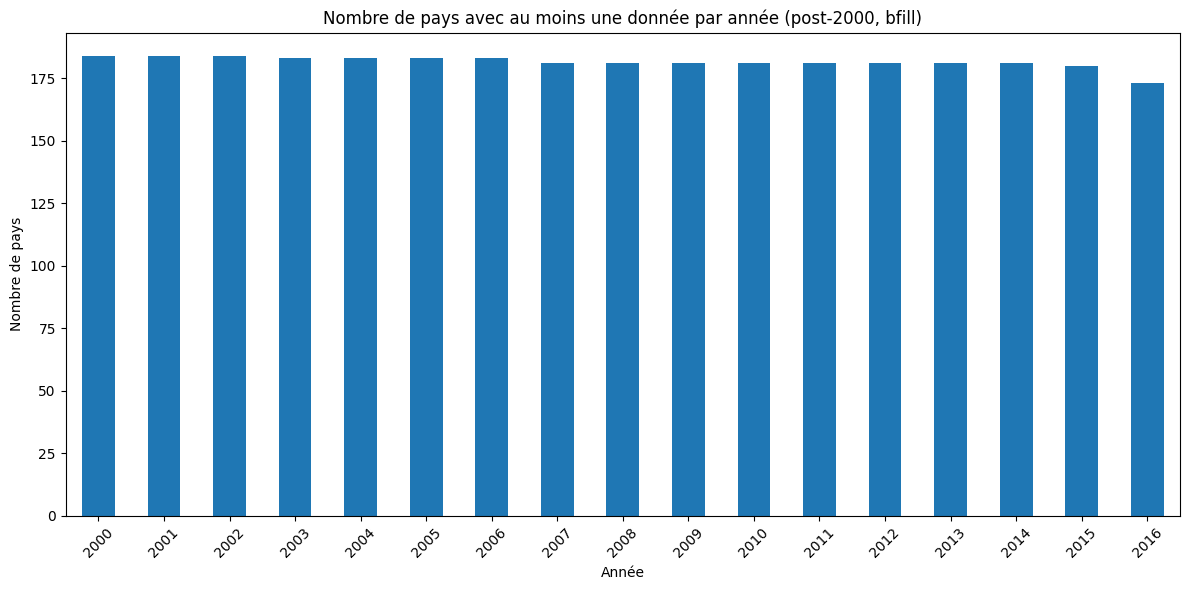

In [115]:
# 1. Repartir du DataFrame avec infos pays + années
df_indicators_selected = topic_population.copy()

# 2. Appliquer un bfill pour récupérer les valeurs "rattrapables"
df_indic_bfill = df_indicators_selected.copy()
df_indic_bfill[years_cols] = df_indic_bfill[years_cols].bfill(axis=1)

# 3. Calculer les pays avec au moins une donnée non manquante par année
country_not_nan = df_indic_bfill.groupby('Country Name')[years_post_2000].apply(lambda g: g.notna().any())

# 4. Compter le nombre de pays avec des données chaque année
nb_country_by_year = country_not_nan.sum(axis=0)

# 5. Affichage

plt.figure(figsize=(12,6))
nb_country_by_year.plot(kind='bar')
plt.title("Nombre de pays avec au moins une donnée par année (post-2000, bfill)")
plt.xlabel("Année")
plt.ylabel("Nombre de pays")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Les indicateurs étant bien remplis après un **bfill**, on peut choisir ceux qui nous interesse le plus.

In [116]:
# 1. Repartir du DataFrame source (par ex. topic_population)
df_indicators_selected = df_indicators_selected.copy()

# 2. Colonnes années
years_cols = [col for col in df_indicators_selected.columns if col.isdigit()]

# 3. Calcul du taux de remplissage par indicateur
taux_remplissage = (
    df_indicators_selected
    .groupby('Indicator Name')[years_cols]
    .apply(lambda x: x.notna().sum().sum() / x.size * 100)
    .round(2)
    .sort_values(ascending=False)
)

# 4. Transformation en DataFrame
df_taux_indicateur = taux_remplissage.reset_index()
df_taux_indicateur.columns = ['Indicator Name', 'Taux remplissage (%)']

# 5. Affichage des 10 premiers indicateurs les mieux remplis
df_taux_indicateur.head(20)

Indicator Name  Taux remplissage (%)
0   Population of the official age for pre-primary...                 89.08
1   Population of the official age for upper secon...                 88.90
2   Population of the official age for lower secon...                 88.88
3   Population of the official age for secondary e...                 88.85
4   Population of the official entrance age to sec...                 88.84
5   Population of the official entrance age to pri...                 88.59
6   Population of the official age for primary edu...                 88.37
7   Population of the official age for the last gr...                 87.91
8   Population of the official age for tertiary ed...                 85.84
9                       Population, ages 10-14, total                 47.70
10                      Population, ages 10-15, total                 47.70
11                      Population, ages 10-17, total                 47.70
12                      Population, ages 10-16, total                 47.70
13                      Population, ages 14-19, total                 47.70
14                      Population, ages 15-24, total                 47.70
15                      Population, ages 10-18, total                 47.70
16                      Population, ages 11-15, total                 47.70
17                      Population, ages 11-16, total                 47.70
18                      Population, ages 11-17, total                 47.70
19                      Population, ages 11-18, total                 47.70

Les indicateurs qui différencient les hommes des femmes ne sont pas utiles dans notre cas. Nous pouvons donc déjà les supprimer

In [117]:
# 1. Création d'un mask : on veut supprimer les lignes contenant 'male' ou 'female'
mask = df_indicators_selected['Indicator Name'].str.contains('male|female', case=False, na=False)
# 2. On crée un nouveau DF où l'on enlève le mask précédemment crée
df_indic_selected_filtered = df_indicators_selected[~mask]

Comme le projet de Mark concerne les personnes étant au lycée ou +, on peut supprimer les indicateurs qui concernent les populations ayant des niveaux d'éducation plus faibles.

In [118]:
# 3. Calcul du taux de remplissage par indicateur
taux_remplissage = (
    df_indic_selected_filtered
    .groupby('Indicator Name')[years_cols]
    .apply(lambda x: x.notna().sum().sum() / x.size * 100)
    .round(2)
    .sort_values(ascending=False)
)

# 4. Transformation en DataFrame
df_taux_indicateur = taux_remplissage.reset_index()
df_taux_indicateur.columns = ['Indicator Name', 'Taux remplissage (%)']

# 5. Affichage des 10 premiers indicateurs les mieux remplis
df_taux_indicateur.head(20)

Indicator Name  Taux remplissage (%)
0   Population of the official age for pre-primary...                 89.08
1   Population of the official age for upper secon...                 88.90
2   Population of the official age for lower secon...                 88.88
3   Population of the official age for secondary e...                 88.85
4   Population of the official entrance age to sec...                 88.84
5   Population of the official entrance age to pri...                 88.59
6   Population of the official age for primary edu...                 88.37
7   Population of the official age for the last gr...                 87.91
8   Population of the official age for tertiary ed...                 85.84
9                       Population, ages 10-14, total                 47.70
10                      Population, ages 10-15, total                 47.70
11                      Population, ages 10-17, total                 47.70
12                      Population, ages 10-16, total                 47.70
13                      Population, ages 14-19, total                 47.70
14                      Population, ages 15-24, total                 47.70
15                      Population, ages 10-18, total                 47.70
16                      Population, ages 11-15, total                 47.70
17                      Population, ages 11-16, total                 47.70
18                      Population, ages 11-17, total                 47.70
19                      Population, ages 11-18, total                 47.70

In [119]:
indicators_population_to_keep = [
 'Population of the official age for secondary education, both sexes (number)',
 'Population of the official age for upper secondary education, both sexes (number)',
 'Population of the official age for tertiary education, both sexes (number)'
]

Faisons une copie du DF taux_remplissage_par_année, et mergeons le avec df_indicators_passed pour voir si certains pays n'ayant aucune valeurs remplies.

In [120]:
df_topic_pop = df_indicators_selected[
    df_indicators_selected['Indicator Name'].isin(indicators_population_to_keep)
]

In [121]:
df_bfill_population = df_topic_pop.copy()
df_bfill_population = df_topic_pop.bfill(axis=1)

In [122]:
df_topic_pop_1=df_topic_pop[df_topic_pop['Indicator Name'] == 'Population of the official age for secondary education, both sexes (number)']
df_topic_pop_1.count()

Country Code                195
Country Name                195
Region                      193
Income Group                193
Latest population census    193
Indicator Name              195
Topic                       195
Indicator Code              195
1970                        173
1971                        172
1972                        172
1973                        172
1974                        172
1975                        172
1976                        172
1977                        172
1978                        172
1979                        172
1980                        172
1981                        172
1982                        172
1983                        172
1984                        172
1985                        172
1986                        172
1987                        172
1988                        172
1989                        172
1990                        172
1991                        172
1992                        172
1993    

In [123]:
# 2. Fonction pour trouver la première et la dernière année non-NaN
def get_first_last_years(row):
    non_nan_years = row[years_passed].dropna()
    if non_nan_years.empty:
        return pd.Series([None, None])
    return pd.Series([non_nan_years.index[0], non_nan_years.index[-1]])

df_topic_pop_1[['First valid year', 'Last valid year']] = df_topic_pop_1.apply(get_first_last_years, axis=1)
df_topic_pop_1["Total valid years"] = df_topic_pop_1[years_passed].notna().sum(axis=1)

df_topic_pop_1[["Country Name", "Latest population census", "First valid year", "Last valid year", "Total valid years"]].sort_values(by='Total valid years', ascending=False).tail(30)

/tmp/ipykernel_9241/3334579220.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_topic_pop_1[['First valid year', 'Last valid year']] = df_topic_pop_1.apply(get_first_last_years, axis=1)
/tmp/ipykernel_9241/3334579220.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_topic_pop_1[['First valid year', 'Last valid year']] = df_topic_pop_1.apply(get_first_last_years, axis=1)
/tmp/ipykernel_9241/3334579220.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

Country Name  \
63003                     Bahrain   
155890                    Algeria   
591498                    Ukraine   
476190                      Qatar   
24567                     Armenia   
66206      Bosnia and Herzegovina   
14958                     Andorra   
460175                Puerto Rico   
428145                      Nauru   
489002                      Sudan   
581889                     Tuvalu   
450566                      Palau   
82221                      Brazil   
319243              Liechtenstein   
517829                South Sudan   
508220                 San Marino   
130266             Cayman Islands   
197529                  Gibraltar   
405724              New Caledonia   
27770              American Samoa   
383303   Northern Mariana Islands   
341664   St. Martin (French part)   
348070                     Monaco   
472987           French Polynesia   
248777                Isle of Man   
495408                  Singapore   
216747                  Greenland   
537047  Sint Maarten (Dutch part)   
546656   Turks and Caicos Islands   
223153                       Guam   

                                 Latest population census First valid year  \
63003                                                2010             1970   
155890                                               2008             1970   
591498                                               2001             1970   
476190                                               2010             1970   
24567                                                2011             1970   
66206                                                2013             1970   
14958   2011. Population figures compiled from adminis...             1970   
460175                                               2010             1997   
428145                                                NaN             1998   
489002                                               2008             1999   
581889                                               2012             2000   
450566                                               2010             2001   
82221                                                2010             1999   
319243                                               2010             2003   
517829                                               2008             2005   
508220                                               2010             2009   
130266                                               2010             1970   
197529                                               2012             2002   
405724                                               2009             None   
27770                                                2010             None   
383303                                               2010             None   
341664                                                NaN             None   
348070                                               2008             None   
472987                                               2007             None   
248777                                               2011             None   
495408                                               2010             None   
216747                                               2010             None   
537047                                               2011             None   
546656                                               2012             None   
223153                                               2010             None   

       Last valid year  Total valid years  
63003             2015                 46  
155890            2015                 46  
591498            2014                 45  
476190            2015                 43  
24567             2016                 42  
66206             1998                 29  
14958             1998                 29  
460175            2016                 20  
428145            2016                 19  
489002        

In [124]:

df_bfill_pop_secondary = df_bfill_population[df_bfill_population['Indicator Name'] == 'Population of the official age for secondary education, both sexes (number)'].copy()
df_bfill_pop_secondary.count()

Country Code                195
Country Name                195
Region                      195
Income Group                195
Latest population census    195
Indicator Name              195
Topic                       195
Indicator Code              195
1970                        183
1971                        182
1972                        182
1973                        182
1974                        182
1975                        182
1976                        182
1977                        182
1978                        182
1979                        182
1980                        182
1981                        182
1982                        182
1983                        182
1984                        182
1985                        182
1986                        182
1987                        182
1988                        182
1989                        182
1990                        182
1991                        182
1992                        182
1993    

Concentrons nous sur les années allant de **2002** à **2016**

In [125]:
# 1. Sélection des années 
years_pop1 = [year for year in years_passed if 2002 <= int(year) <= 2016]


# 4. Calculer le taux de remplissage (valeurs non manquantes) par Topic
taux_par_pc = df_topic_pop_1.groupby('Income Group')[years_pop1].apply(lambda x: x.notna().mean().mean() * 100).round(2)

# 5. Transformer en DataFrame pour affichage clair
df_taux = taux_par_pc.reset_index()
df_taux.columns = ['Income Group', 'Taux de remplissage (%)']
df_taux

Income Group  Taux de remplissage (%)
0     High income: OECD                   100.00
1  High income: nonOECD                    60.90
2            Low income                    99.35
3   Lower middle income                    96.74
4   Upper middle income                    94.49

In [126]:
df_bfill_pop_secondary[['First valid year', 'Last valid year']] = df_bfill_pop_secondary.apply(get_first_last_years, axis=1)
df_bfill_pop_secondary["Total valid years"] = df_bfill_pop_secondary[years_pop1].notna().sum(axis=1)

df_bfill_pop_secondary[["Country Name", "Latest population census", "First valid year", "Last valid year", "Total valid years"]].sort_values(by='Total valid years', ascending=False).tail(10)


Country Name  \
14958                     Andorra   
383303   Northern Mariana Islands   
248777                Isle of Man   
537047  Sint Maarten (Dutch part)   
495408                  Singapore   
216747                  Greenland   
130266             Cayman Islands   
546656   Turks and Caicos Islands   
223153                       Guam   
66206      Bosnia and Herzegovina   

                                 Latest population census First valid year  \
14958   2011. Population figures compiled from adminis...             1970   
383303                                               2010             None   
248777                                               2011             None   
537047                                               2011             None   
495408                                               2010             None   
216747                                               2010             None   
130266                                               2010             1970   
546656                                               2012             None   
223153                                               2010             None   
66206                                                2013             1970   

       Last valid year  Total valid years  
14958             1998                  0  
383303            None                  0  
248777            None                  0  
537047            None                  0  
495408            None                  0  
216747            None                  0  
130266            1970                  0  
546656            None                  0  
223153            None                  0  
66206             1998                  0

In [127]:
df_bfill_pop_secondary[df_bfill_pop_secondary["Total valid years"] == 0]

Country Code               Country Name                     Region  \
14958           AND                    Andorra      Europe & Central Asia   
27770           ASM             American Samoa        East Asia & Pacific   
66206           BIH     Bosnia and Herzegovina      Europe & Central Asia   
130266          CYM             Cayman Islands  Latin America & Caribbean   
216747          GRL                  Greenland      Europe & Central Asia   
223153          GUM                       Guam        East Asia & Pacific   
248777          IMN                Isle of Man      Europe & Central Asia   
341664          MAF   St. Martin (French part)  Latin America & Caribbean   
348070          MCO                     Monaco      Europe & Central Asia   
383303          MNP   Northern Mariana Islands        East Asia & Pacific   
405724          NCL              New Caledonia        East Asia & Pacific   
472987          PYF           French Polynesia        East Asia & Pacific   
495408          SGP                  Singapore        East Asia & Pacific   
537047          SXM  Sint Maarten (Dutch part)  Latin America & Caribbean   
546656          TCA   Turks and Caicos Islands  Latin America & Caribbean   

                Income Group  \
14958   High income: nonOECD   
27770    Upper middle income   
66206    Upper middle income   
130266  High income: nonOECD   
216747  High income: nonOECD   
223153  High income: nonOECD   
248777  High income: nonOECD   
341664  High income: nonOECD   
348070  High income: nonOECD   
383303  High income: nonOECD   
405724  High income: nonOECD   
472987  High income: nonOECD   
495408  High income: nonOECD   
537047  High income: nonOECD   
546656  High income: nonOECD   

                                 Latest population census  \
14958   2011. Population figures compiled from adminis...   
27770                                                2010   
66206                                                2013   
130266                                               2010   
216747                                               2010   
223153                                               2010   
248777                                               2011   
341664  Population of the official age for secondary e...   
348070                                               2008   
383303                                               2010   
405724                                               2009   
472987                                               2007   
495408                                               2010   
537047                                               2011   
546656                                               2012   

                                           Indicator Name       Topic  \
14958   Population of the official age for secondary e...  Population   
27770   Population of the official age for secondary e...  Population   
66206   Population of the official age for secondary e...  Population   
130266  Population of the official age for secondary e...  Population   
216747  Population of the official age for secondary e...  Population   
223153  Population of the official age for secondary e...  Population   
248777  Population of the official age for secondary e...  Population   
341664  Population of the official age for secondary e...  Population   
348070  Population of the official age for secondary e...  Population   
383303  Population of the official age for secondary e...  Population   
405724  Population of the official age for secondary e...  Population   
472987  Population of the official age for secondary e...  Population   
495408  Population of the official age for secondary e...  Population   
537047  Population of the official age for secondary e...  Population   
546656  Population of the official age for secondary e...  Population   

        Indicator Code      1970      1971  ... 2010 2011 2012 2013 2014 2015  \
14958   SP.SEC.TOTL.IN    4471.0  

Les pays listés étant majoritairement des îles ou des pays avec peu de population, il n'est pas nécessaire d'essayer de récupérer ces données

In [128]:

# 2. Calcul du taux de remplissage (% de pays non-NaN) par indicateur et par année
taux_filled_by_year = df_topic_pop_1.groupby('Income Group')[years_pop1].apply(
    lambda x: x.notna().mean() * 100
).round(2)

# 3. Résultat : un DataFrame avec les années en colonnes et un % par indicateur
taux_filled_by_year.head()

2002    2003    2004    2005    2006    2007    2008  \
Income Group                                                                   
High income: OECD     100.00  100.00  100.00  100.00  100.00  100.00  100.00   
High income: nonOECD   59.46   62.16   62.16   59.46   62.16   62.16   62.16   
Low income            100.00  100.00  100.00  100.00  100.00  100.00  100.00   
Lower middle income    97.67   97.67   97.67  100.00  100.00  100.00  100.00   
Upper middle income    96.15   96.15   96.15   96.15   94.23   96.15   96.15   

                        2009    2010    2011    2012    2013    2014    2015  \
Income Group                                                                   
High income: OECD     100.00  100.00  100.00  100.00  100.00  100.00  100.00   
High income: nonOECD   64.86   64.86   62.16   62.16   62.16   64.86   62.16   
Low income            100.00  100.00  100.00  100.00  100.00  100.00  100.00   
Lower middle income   100.00   97.67   97.67   97.67   97.67   97.67   97.67   
Upper middle income    96.15   94.23   96.15   96.15   96.15   96.15   96.15   

                        2016  
Income Group                  
High income: OECD     100.00  
High income: nonOECD   40.54  
Low income             90.32  
Lower middle income    72.09  
Upper middle income    75.00

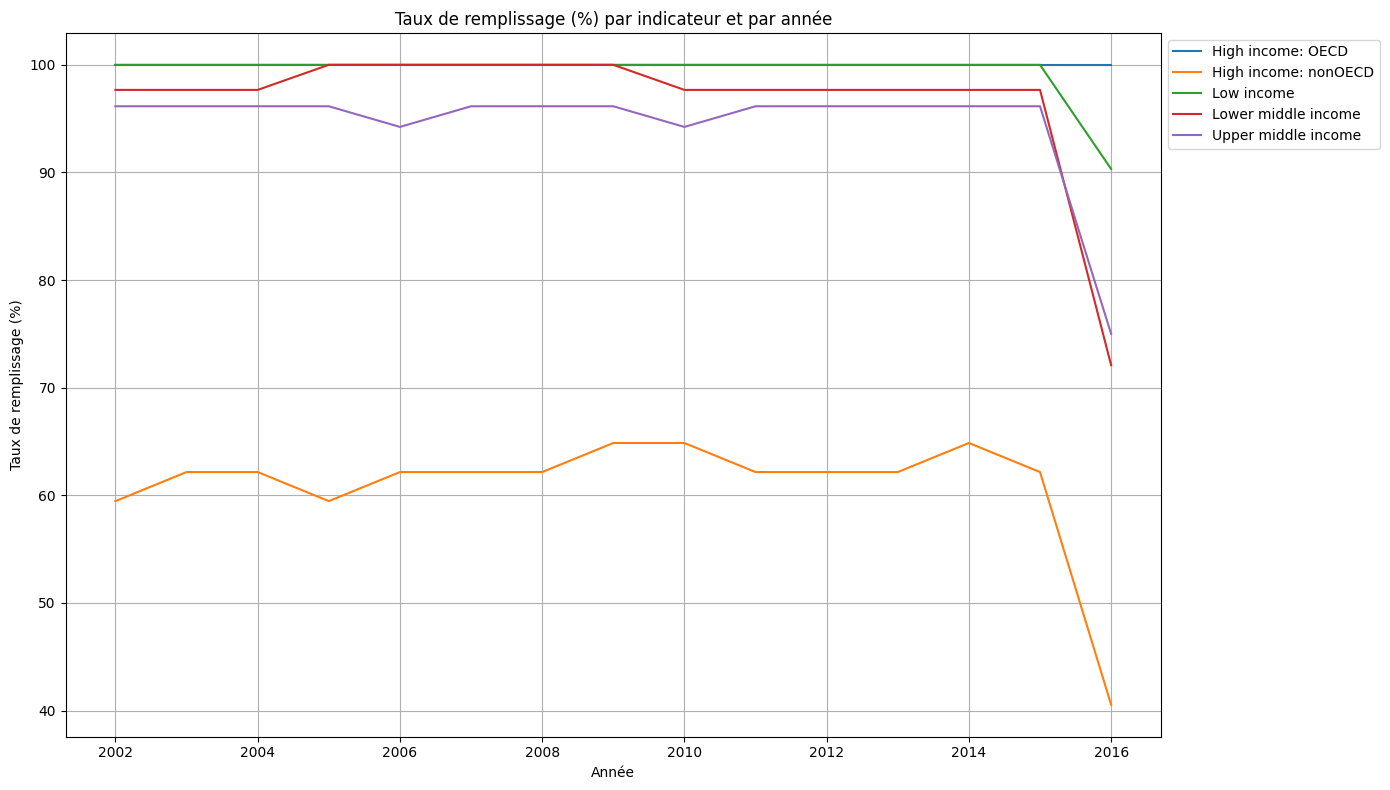

In [129]:
# 1. Taille du graphe
plt.figure(figsize=(14, 8))

# 2. Boucle sur chaque indicateur
for indicateur in taux_filled_by_year.index:
    plt.plot(
        taux_filled_by_year.columns.astype(int),   # années
        taux_filled_by_year.loc[indicateur],       # valeurs %
        label=indicateur
    )

# 3. Mise en forme
plt.title("Taux de remplissage (%) par indicateur et par année")
plt.xlabel("Année")
plt.ylabel("Taux de remplissage (%)")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

In [130]:
# Supprimer les colonnes inutiles
df_pop1_sub = df_topic_pop_1[["Country Name", "Region", "Income Group"]+years_pop1]


# 1. Vérifier les données manquantes par région
region_missing = df_topic_pop_1.groupby('Region')[years_pop1].apply(lambda x: x.notna().sum())

# 2. Vérifier les données manquantes par income group
income_missing = df_topic_pop_1.groupby('Income Group')[years_pop1].apply(lambda x: x.notna().sum())
income_missing

2002  2003  2004  2005  2006  2007  2008  2009  2010  \
Income Group                                                                 
High income: OECD       30    30    30    30    30    30    30    30    30   
High income: nonOECD    22    23    23    22    23    23    23    24    24   
Low income              31    31    31    31    31    31    31    31    31   
Lower middle income     42    42    42    43    43    43    43    43    42   
Upper middle income     50    50    50    50    49    50    50    50    49   

                      2011  2012  2013  2014  2015  2016  
Income Group                                              
High income: OECD       30    30    30    30    30    30  
High income: nonOECD    23    23    23    24    23    15  
Low income              31    31    31    31    31    28  
Lower middle income     42    42    42    42    42    31  
Upper middle income     50    50    50    50    50    39

/tmp/ipykernel_9241/3481202853.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop1_sub[year] = pd.to_numeric(df_pop1_sub[year], errors='coerce')


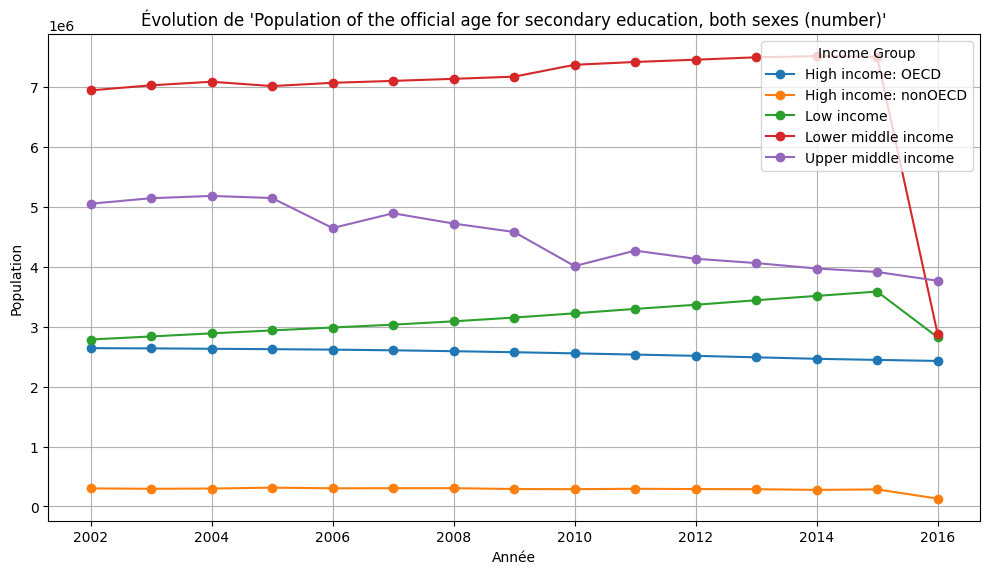

In [131]:

# 2. Conversion des années en float pour éviter les erreurs sur des valeurs non numériques
for year in years_pop1:
    df_pop1_sub[year] = pd.to_numeric(df_pop1_sub[year], errors='coerce')

# 3. Moyenne par Income Group et par année
income_group_evolution = df_pop1_sub.groupby("Income Group")[years_pop1].mean()

# 4. Transposer pour avoir les années en index (pour l'affichage)
income_group_evolution_T = income_group_evolution.T
income_group_evolution_T.index.name = "Year"
income_group_evolution_T.plot(figsize=(10,6), marker='o')
plt.title("Évolution de 'Population of the official age for secondary education, both sexes (number)'")
plt.ylabel("Population")
plt.xlabel("Année")
plt.grid(True)
plt.legend(title="Income Group")
plt.tight_layout()
plt.show()

Regardons maintenant en détail chaque **Income Group**

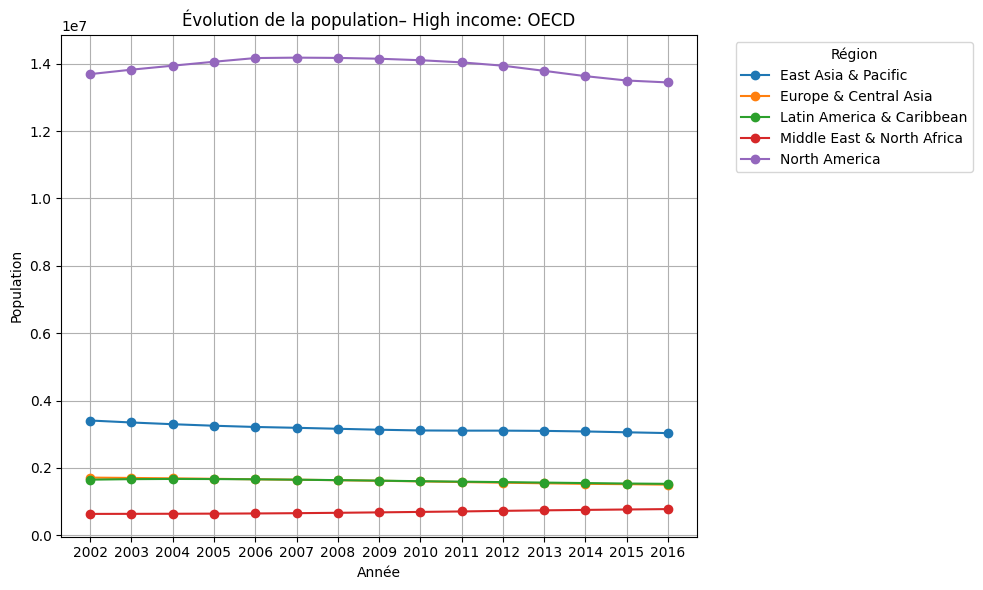

In [132]:
# Spécifie l'Income Group 
selected_income_group = "High income: OECD"

# Calcul des moyennes pour ce groupe
grouped = df_pop1_sub.groupby(['Income Group', 'Region'])[years_pop1].mean()

# Extraire les données du groupe sélectionné
data = grouped.loc[selected_income_group]
data = data.T  # Transposer : les années deviennent l'index

# Tracer le graphique
plt.figure(figsize=(10, 6))
for region in data.columns:
    plt.plot(data.index, data[region], marker='o', label=region)

plt.title(f"Évolution de la population– {selected_income_group}")
plt.xlabel("Année")
plt.ylabel("Population")
plt.legend(title="Région", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Les données semblent complètes avec une évolution qui semble normale.

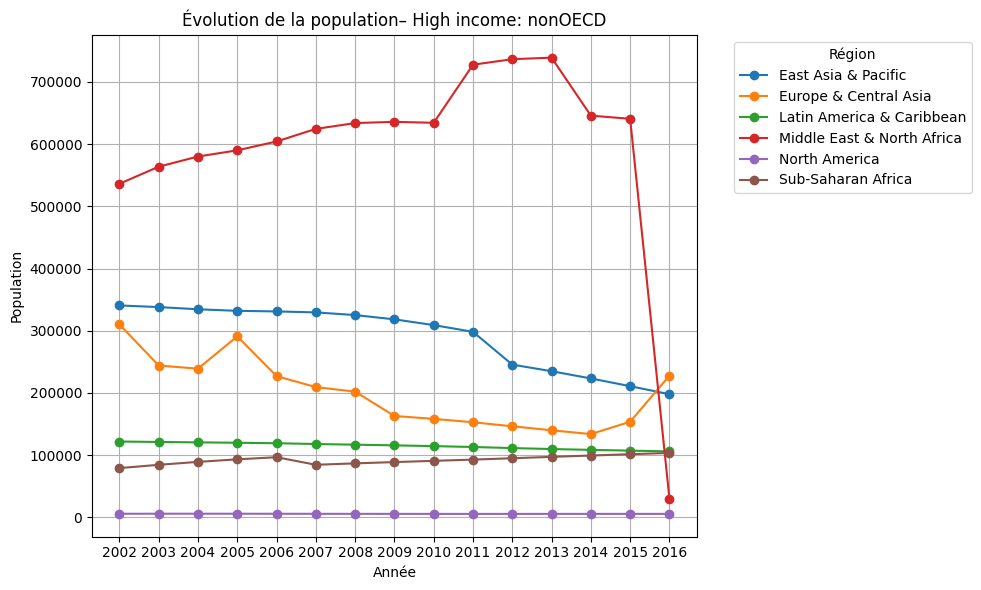

In [133]:
# Spécifie l'Income Group 
selected_income_group = "High income: nonOECD"

# Calcul des moyennes pour ce groupe
grouped = df_pop1_sub.groupby(['Income Group', 'Region'])[years_pop1].mean()

# Extraire les données du groupe sélectionné
data = grouped.loc[selected_income_group]
data = data.T  # Transposer : les années deviennent l'index

# Tracer le graphique
plt.figure(figsize=(10, 6))
for region in data.columns:
    plt.plot(data.index, data[region], marker='o', label=region)

plt.title(f"Évolution de la population– {selected_income_group}")
plt.xlabel("Année")
plt.ylabel("Population")
plt.legend(title="Région", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

On remarque une nette baisse de la popluation au **Moyen-Orient & Afrique du Nord** , intéressons nous à cette région pour voir quel est le problème au niveau des données.

In [134]:
# Filtrer les pays de la région 'East Asia & Pacific'
middle_east = df_pop1_sub[df_pop1_sub["Region"] == "Middle East & North Africa"]

# Identifier les pays n’ayant **aucune** valeur sur la période
no_data_countries_me = middle_east[middle_east[years_pop1].isna().all(axis=1)]
no_data_countries_me

Empty DataFrame
Columns: [Country Name, Region, Income Group, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
Index: []

In [135]:
missing_2016 = middle_east[middle_east["2016"].isna()][["Country Name"]]
missing_2016

Country Name
18161   United Arab Emirates
63003                Bahrain
155890               Algeria
258386                  Iraq
274401                Jordan
300025                Kuwait
306431               Lebanon
312837                 Libya
344867               Morocco
434551                  Oman
469784    West Bank and Gaza
476190                 Qatar
485799          Saudi Arabia
543453  Syrian Arab Republic
575483               Tunisia

Ces pays étant importants, mais la courbe d'évolution n'étant pas linéaire, il est préférable de leur accorder la valeur qu'ils avaient en 2015.

In [136]:
# 2. Trouver les pays avec une valeur manquante en 2016
mask_missing_2016 = middle_east["2016"].isna()

# 3. Remplacer les NaN de 2016 par la valeur de 2015
df_pop1_sub.loc[mask_missing_2016.index[mask_missing_2016], "2016"] = \
    df_pop1_sub.loc[mask_missing_2016.index[mask_missing_2016], "2015"]

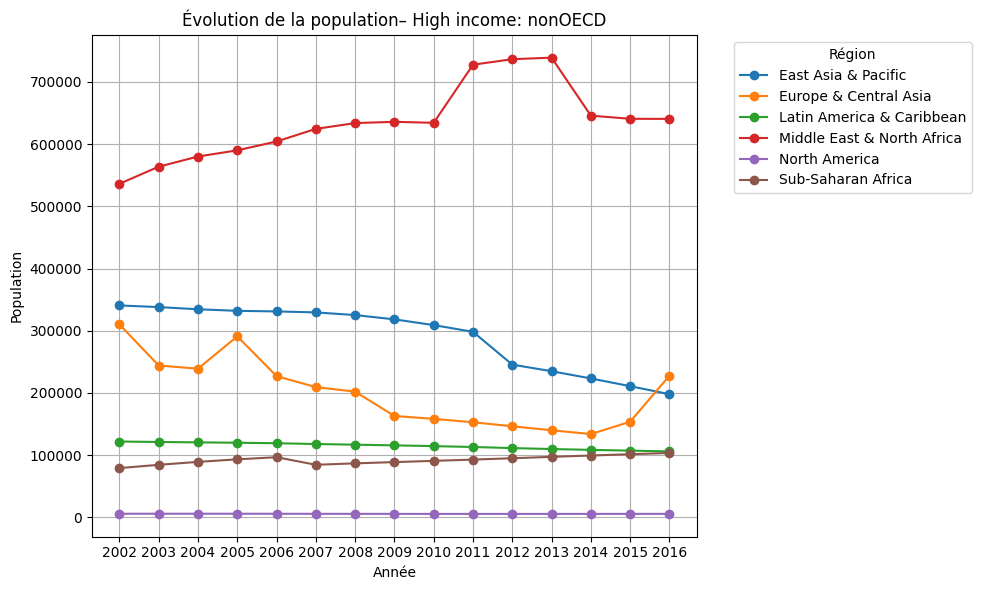

In [137]:
# Spécifie l'Income Group 
selected_income_group = "High income: nonOECD"

# Calcul des moyennes pour ce groupe
grouped = df_pop1_sub.groupby(['Income Group', 'Region'])[years_pop1].mean()

# Extraire les données du groupe sélectionné
data = grouped.loc[selected_income_group]
data = data.T  # Transposer : les années deviennent l'index

# Tracer le graphique
plt.figure(figsize=(10, 6))
for region in data.columns:
    plt.plot(data.index, data[region], marker='o', label=region)

plt.title(f"Évolution de la population– {selected_income_group}")
plt.xlabel("Année")
plt.ylabel("Population")
plt.legend(title="Région", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

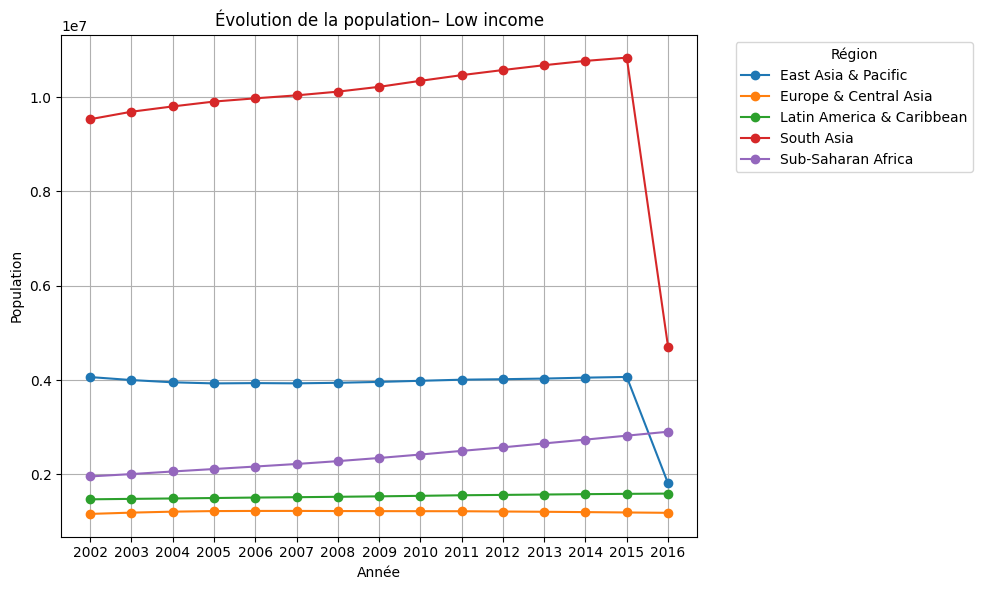

In [138]:
# Spécifie l'Income Group 
selected_income_group = "Low income"

# Calcul des moyennes pour ce groupe
grouped = df_pop1_sub.groupby(['Income Group', 'Region'])[years_pop1].mean()

# Extraire les données du groupe sélectionné
data = grouped.loc[selected_income_group]
data = data.T  # Transposer : les années deviennent l'index

# Tracer le graphique
plt.figure(figsize=(10, 6))
for region in data.columns:
    plt.plot(data.index, data[region], marker='o', label=region)

plt.title(f"Évolution de la population– {selected_income_group}")
plt.xlabel("Année")
plt.ylabel("Population")
plt.legend(title="Région", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

On observe une nette baisse au niveau de l'**Asie de l'est & du Pacifique** et de l'**Asie du Sud**. On note également que le taux d'évolution semble linéaire, on pourra donc faire un calcul pour remplir les données manquantes.

In [139]:
# Filtrer les pays de la région 'East Asia & Pacific'
east_asia = df_pop1_sub[df_pop1_sub["Region"] == "East Asia & Pacific"]
# Identifier les pays n’ayant **aucune** valeur sur la période
no_data_countries_ea = east_asia[east_asia[years_pop1].isna().all(axis=1)]
no_data_countries_ea

Country Name               Region          Income Group  \
27770             American Samoa  East Asia & Pacific   Upper middle income   
223153                      Guam  East Asia & Pacific  High income: nonOECD   
383303  Northern Mariana Islands  East Asia & Pacific  High income: nonOECD   
405724             New Caledonia  East Asia & Pacific  High income: nonOECD   
472987          French Polynesia  East Asia & Pacific  High income: nonOECD   
495408                 Singapore  East Asia & Pacific  High income: nonOECD   

        2002  2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  \
27770    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
223153   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
383303   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
405724   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
472987   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
495408   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

        2013  2014  2015  2016  
27770    NaN   NaN   NaN   NaN  
223153   NaN   NaN   NaN   NaN  
383303   NaN   NaN   NaN   NaN  
405724   NaN   NaN   NaN   NaN  
472987   NaN   NaN   NaN   NaN  
495408   NaN   NaN   NaN   NaN

On peut noter qu'ici, seul **Singapour** serait un pays pour lequel récupérer des valeurs serait intéressant.

In [140]:
# Filtrer les pays de la région 'East Asia & Pacific'
east_asia = df_pop1_sub[df_pop1_sub["Region"] == "East Asia & Pacific"]

missing_2016_ea = east_asia[east_asia["2016"].isna()][["Country Name"]]
missing_2016_ea 

Country Name
27770             American Samoa
223153                      Guam
303228                   Lao PDR
373694                   Myanmar
383303  Northern Mariana Islands
399318                  Malaysia
405724             New Caledonia
472987          French Polynesia
495408                 Singapore
556265                  Thailand
607513                   Vietnam
610716                   Vanuatu

In [141]:
def fill_with_dynamic_taux(group):
    group = group.sort_values('Year').copy()
    taux = group['Taux'].tolist()
    taux_evol = group['Taux évolution moyen'].tolist()
    
    for i in range(1, len(taux)):
        if pd.isna(taux[i]):
            if not pd.isna(taux[i - 1]) and not pd.isna(taux_evol[i]):
                taux[i] = taux[i - 1] * (1 + taux_evol[i])
    
    group['Taux remplis'] = taux
    return group

In [142]:
year_columns = [col for col in east_asia.columns if col.isdigit()]

east_asia_long = east_asia.melt(
    id_vars=[col for col in east_asia.columns if col not in year_columns],
    value_vars=year_columns,
    var_name='Year',
    value_name='Taux'
)
east_asia_long['Year'] = east_asia_long['Year'].astype(int)

east_asia_long['Taux évolution moyen'] = (
    east_asia_long
    .groupby('Country Name')['Taux']
    .pct_change()
    .rolling(window=3, min_periods=1)
    .mean()
    .reset_index(drop=True)
)
east_asia_filled = (
    east_asia_long
    .groupby('Country Name', group_keys=False)
    .apply(fill_with_dynamic_taux)
    .reset_index(drop=True)
)

/tmp/ipykernel_9241/1005572588.py:14: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  .pct_change()
/tmp/ipykernel_9241/1005572588.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(fill_with_dynamic_taux)


In [143]:
list_country_empty = missing_2016_ea['Country Name'].tolist()
list_country_empty

['American Samoa',
 'Guam',
 'Lao PDR',
 'Myanmar',
 'Northern Mariana Islands',
 'Malaysia',
 'New Caledonia',
 'French Polynesia',
 'Singapore',
 'Thailand',
 'Vietnam',
 'Vanuatu']

In [144]:
filled_2016_for_empty = east_asia_filled[
    (east_asia_filled['Country Name'].isin(list_country_empty)) &
    (east_asia_filled['Year'] == 2016)
]

filled_2016_for_empty 

Country Name               Region          Income Group  \
448            American Samoa  East Asia & Pacific   Upper middle income   
452                      Guam  East Asia & Pacific  High income: nonOECD   
458                   Lao PDR  East Asia & Pacific   Lower middle income   
461                   Myanmar  East Asia & Pacific            Low income   
463  Northern Mariana Islands  East Asia & Pacific  High income: nonOECD   
464                  Malaysia  East Asia & Pacific   Upper middle income   
465             New Caledonia  East Asia & Pacific  High income: nonOECD   
470          French Polynesia  East Asia & Pacific  High income: nonOECD   
471                 Singapore  East Asia & Pacific  High income: nonOECD   
473                  Thailand  East Asia & Pacific   Upper middle income   
477                   Vietnam  East Asia & Pacific   Lower middle income   
478                   Vanuatu  East Asia & Pacific   Lower middle income   

     Year  Taux  Taux évolution moyen  Taux remplis  
448  2016   NaN              0.009072           NaN  
452  2016   NaN             -0.005412           NaN  
458  2016   NaN             -0.064273  9.710023e+05  
461  2016   NaN             -0.004282  6.261943e+06  
463  2016   NaN             -0.005304           NaN  
464  2016   NaN             -0.005304  3.835516e+06  
465  2016   NaN              0.000000           NaN  
470  2016   NaN              0.011320           NaN  
471  2016   NaN              0.016938           NaN  
473  2016   NaN              0.009923  5.290025e+06  
477  2016   NaN             -0.039866  9.003827e+06  
478  2016   NaN             -0.043672  3.588334e+04

In [145]:
# 1. Pivotage du DataFrame rempli
filled_wide = (
    east_asia_filled.pivot(index='Country Name', columns='Year', values='Taux remplis')
    .reset_index()
)

# 2. Conversion des années en str (si nécessaire)
filled_wide.columns = filled_wide.columns.astype(str)

# 3. Sélection des colonnes à conserver
years_str = [str(y) for y in years_pop1]
filled_final = filled_wide[["Country Name"] + years_str]

# 4. Suppression des anciennes colonnes annuelles
df_final = df_topic_pop_1.drop(columns=years_str, errors='ignore')


In [146]:
df_topic_pop_2=df_topic_pop[df_topic_pop['Indicator Name'] == 'Population of the official age for upper secondary education, both sexes (number)']

In [147]:

df_bfill_pop_uppersecondary = df_bfill_population[df_bfill_population['Indicator Name'] == 'Population of the official age for upper secondary education, both sexes (number)'].copy()

# 2. Création d'un nouveau df avec bfill
df_bfill_pop_uppersecondary.count()


Country Code                195
Country Name                195
Region                      195
Income Group                195
Latest population census    195
Indicator Name              195
Topic                       195
Indicator Code              195
1970                        183
1971                        182
1972                        182
1973                        182
1974                        182
1975                        182
1976                        182
1977                        182
1978                        182
1979                        182
1980                        182
1981                        182
1982                        182
1983                        182
1984                        182
1985                        182
1986                        182
1987                        182
1988                        182
1989                        182
1990                        182
1991                        182
1992                        182
1993    

Au vu des résultats, on peut s'intéresser aux années allant de **1998** à **2016**

In [148]:
# 1. Sélection des années 
years_pop2 = [year for year in years_passed if 1998 <= int(year) <= 2016]


# 4. Calculer le taux de remplissage (valeurs non manquantes) par Topic
taux_par_pop_2 = df_topic_pop_2.groupby('Income Group')[years_pop2].apply(lambda x: x.notna().mean().mean() * 100).round(2)

# 5. Transformer en DataFrame pour affichage clair
df_taux = taux_par_pop_2.reset_index()
df_taux.columns = ['Income Group', 'Taux de remplissage (%)']
df_taux

Income Group  Taux de remplissage (%)
0     High income: OECD                   100.00
1  High income: nonOECD                    60.74
2            Low income                    99.49
3   Lower middle income                    97.43
4   Upper middle income                    94.23

In [149]:
df_bfill_pop_secondary[['First valid year', 'Last valid year']] = df_bfill_pop_secondary.apply(get_first_last_years, axis=1)
df_bfill_pop_secondary["Total valid years"] = df_bfill_pop_secondary[years_pop1].notna().sum(axis=1)

df_bfill_pop_secondary[["Country Name", "Latest population census", "First valid year", "Last valid year", "Total valid years"]].sort_values(by='Total valid years', ascending=False).tail(10)


Country Name  \
14958                     Andorra   
383303   Northern Mariana Islands   
248777                Isle of Man   
537047  Sint Maarten (Dutch part)   
495408                  Singapore   
216747                  Greenland   
130266             Cayman Islands   
546656   Turks and Caicos Islands   
223153                       Guam   
66206      Bosnia and Herzegovina   

                                 Latest population census First valid year  \
14958   2011. Population figures compiled from adminis...             1970   
383303                                               2010             None   
248777                                               2011             None   
537047                                               2011             None   
495408                                               2010             None   
216747                                               2010             None   
130266                                               2010             1970   
546656                                               2012             None   
223153                                               2010             None   
66206                                                2013             1970   

       Last valid year  Total valid years  
14958             1998                  0  
383303            None                  0  
248777            None                  0  
537047            None                  0  
495408            None                  0  
216747            None                  0  
130266            1970                  0  
546656            None                  0  
223153            None                  0  
66206             1998                  0

In [150]:
df_bfill_pop_secondary[df_bfill_pop_secondary["Total valid years"] == 0]['Country Name']

14958                       Andorra
27770                American Samoa
66206        Bosnia and Herzegovina
130266               Cayman Islands
216747                    Greenland
223153                         Guam
248777                  Isle of Man
341664     St. Martin (French part)
348070                       Monaco
383303     Northern Mariana Islands
405724                New Caledonia
472987             French Polynesia
495408                    Singapore
537047    Sint Maarten (Dutch part)
546656     Turks and Caicos Islands
Name: Country Name, dtype: object

Excepté Singapour, la majorité des pays sont des îles, il n'est donc pas nécessaire d'essayer de récupérer leurs données.

In [151]:

# 2. Calcul du taux de remplissage (% de pays non-NaN) par indicateur et par année
taux_filled_by_year = df_topic_pop_2.groupby('Income Group')[years_pop2].apply(
    lambda x: x.notna().mean() * 100
).round(2)

# 3. Résultat : un DataFrame avec les années en colonnes et un % par indicateur
taux_filled_by_year.head()

1998    1999    2000    2001    2002    2003    2004  \
Income Group                                                                   
High income: OECD     100.00  100.00  100.00  100.00  100.00  100.00  100.00   
High income: nonOECD   62.16   59.46   59.46   59.46   59.46   62.16   62.16   
Low income            100.00  100.00  100.00  100.00  100.00  100.00  100.00   
Lower middle income    95.35   97.67   97.67   97.67   97.67   97.67   97.67   
Upper middle income    92.31   92.31   92.31   96.15   96.15   96.15   96.15   

                        2005    2006    2007    2008    2009    2010    2011  \
Income Group                                                                   
High income: OECD     100.00  100.00  100.00  100.00  100.00  100.00  100.00   
High income: nonOECD   59.46   62.16   62.16   62.16   64.86   64.86   62.16   
Low income            100.00  100.00  100.00  100.00  100.00  100.00  100.00   
Lower middle income   100.00  100.00  100.00  100.00  100.00  100.00  100.00   
Upper middle income    96.15   94.23   96.15   96.15   96.15   94.23   96.15   

                        2012    2013    2014    2015    2016  
Income Group                                                  
High income: OECD     100.00  100.00  100.00  100.00  100.00  
High income: nonOECD   62.16   62.16   64.86   62.16   40.54  
Low income            100.00  100.00  100.00  100.00   90.32  
Lower middle income   100.00  100.00  100.00   97.67   72.09  
Upper middle income    96.15   96.15   96.15   96.15   75.00

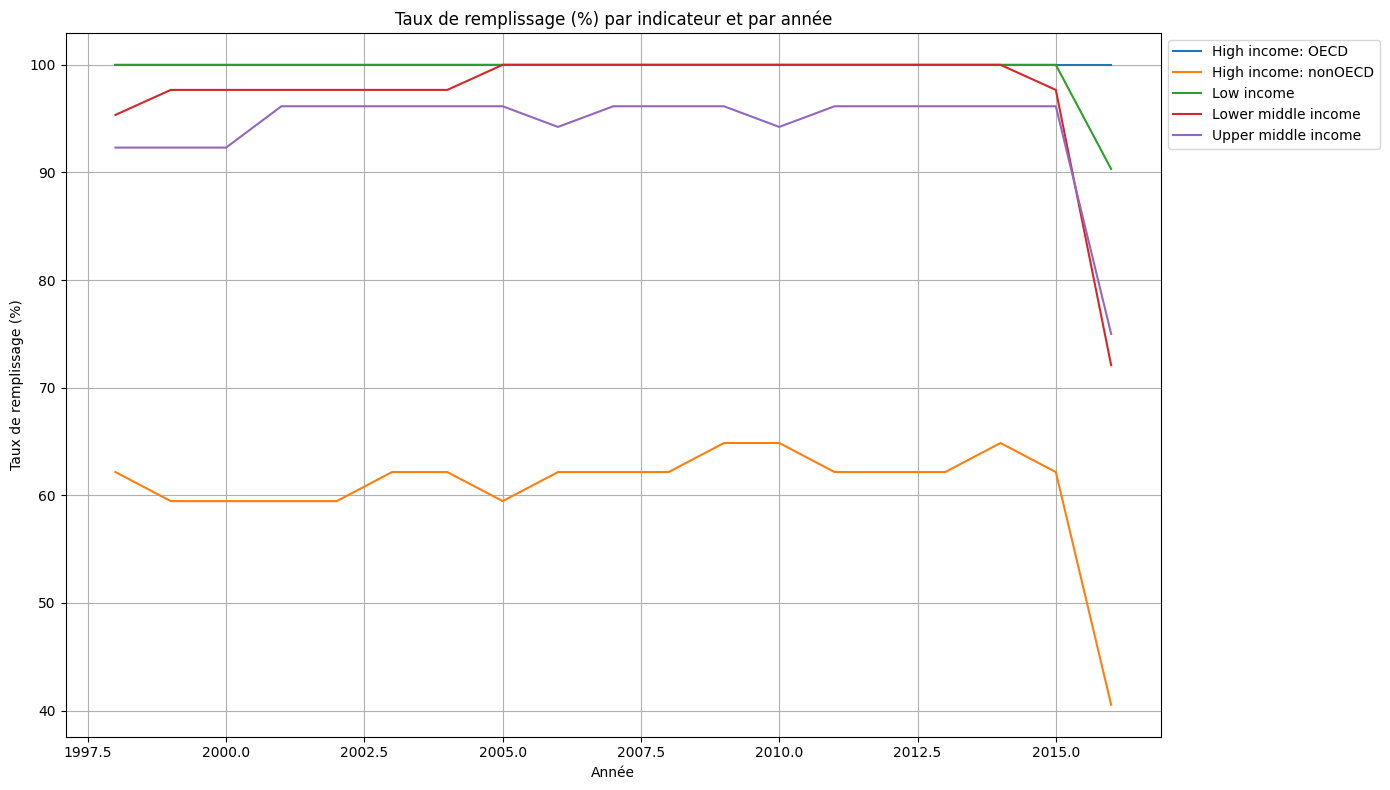

In [152]:
# 1. Taille du graphe
plt.figure(figsize=(14, 8))

# 2. Boucle sur chaque indicateur
for indicateur in taux_filled_by_year.index:
    plt.plot(
        taux_filled_by_year.columns.astype(int),   # années
        taux_filled_by_year.loc[indicateur],       # valeurs %
        label=indicateur
    )

# 3. Mise en forme
plt.title("Taux de remplissage (%) par indicateur et par année")
plt.xlabel("Année")
plt.ylabel("Taux de remplissage (%)")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

In [153]:
# Supprimer les colonnes inutiles
df_pop2_sub = df_topic_pop_2[["Country Name", "Region", "Income Group"]+years_pop2]


# 1. Vérifier les données manquantes par région
region_missing = df_topic_pop_2.groupby('Region')[years_pop2].apply(lambda x: x.notna().sum())

# 2. Vérifier les données manquantes par income group
income_missing = df_topic_pop_2.groupby('Income Group')[years_pop2].apply(lambda x: x.notna().sum())
income_missing

1998  1999  2000  2001  2002  2003  2004  2005  2006  \
Income Group                                                                 
High income: OECD       30    30    30    30    30    30    30    30    30   
High income: nonOECD    23    22    22    22    22    23    23    22    23   
Low income              31    31    31    31    31    31    31    31    31   
Lower middle income     41    42    42    42    42    42    42    43    43   
Upper middle income     48    48    48    50    50    50    50    50    49   

                      2007  2008  2009  2010  2011  2012  2013  2014  2015  \
Income Group                                                                 
High income: OECD       30    30    30    30    30    30    30    30    30   
High income: nonOECD    23    23    24    24    23    23    23    24    23   
Low income              31    31    31    31    31    31    31    31    31   
Lower middle income     43    43    43    43    43    43    43    43    42   
Upper middle income     50    50    50    49    50    50    50    50    50   

                      2016  
Income Group                
High income: OECD       30  
High income: nonOECD    15  
Low income              28  
Lower middle income     31  
Upper middle income     39

/tmp/ipykernel_9241/4165837245.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop2_sub[year] = pd.to_numeric(df_pop2_sub[year], errors='coerce')


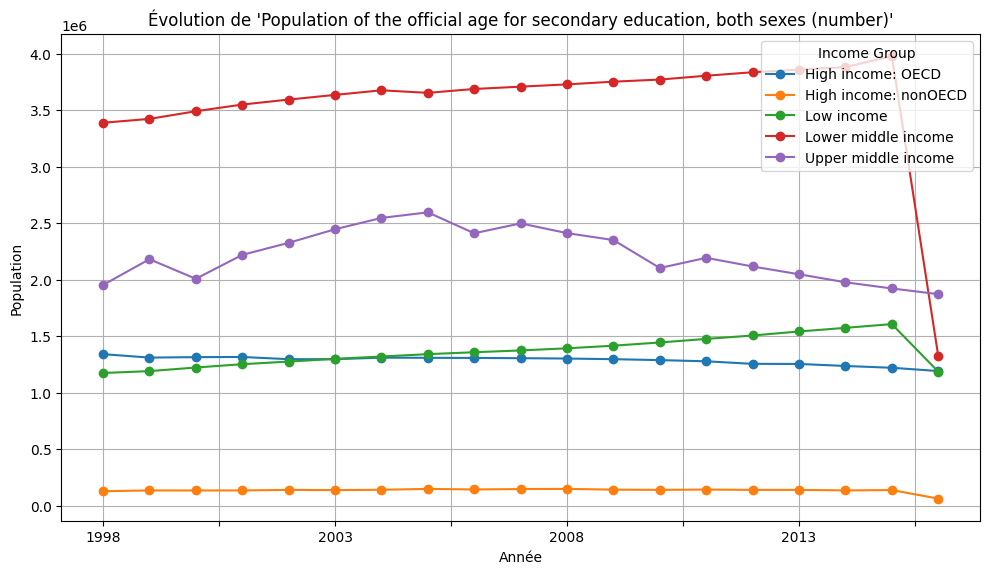

In [154]:

# 2. Conversion des années en float pour éviter les erreurs sur des valeurs non numériques
for year in years_pop2:
    df_pop2_sub[year] = pd.to_numeric(df_pop2_sub[year], errors='coerce')

# 3. Moyenne par Income Group et par année
income_group_evolution = df_pop2_sub.groupby("Income Group")[years_pop2].mean()

# 4. Transposer pour avoir les années en index (pour l'affichage)
income_group_evolution_T = income_group_evolution.T
income_group_evolution_T.index.name = "Year"
income_group_evolution_T.plot(figsize=(10,6), marker='o')
plt.title("Évolution de 'Population of the official age for secondary education, both sexes (number)'")
plt.ylabel("Population")
plt.xlabel("Année")
plt.grid(True)
plt.legend(title="Income Group")
plt.tight_layout()
plt.show()

Regardons maintenant en détail chaque **Income Group**

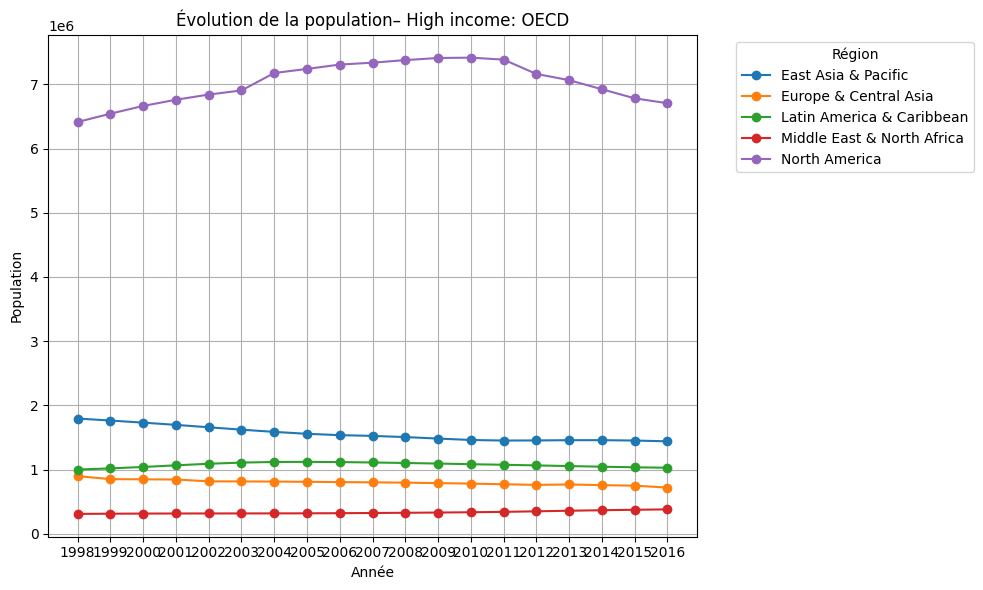

In [155]:
# Spécifie l'Income Group 
selected_income_group = "High income: OECD"

# Calcul des moyennes pour ce groupe2
grouped = df_pop2_sub.groupby(['Income Group', 'Region'])[years_pop2].mean()

# Extraire les données du groupe sélectionné
data = grouped.loc[selected_income_group]
data = data.T  # Transposer : les années deviennent l'index

# Tracer le graphique
plt.figure(figsize=(10, 6))
for region in data.columns:
    plt.plot(data.index, data[region], marker='o', label=region)

plt.title(f"Évolution de la population– {selected_income_group}")
plt.xlabel("Année")
plt.ylabel("Population")
plt.legend(title="Région", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Les données semblent complètes avec une évolution qui semble normale.

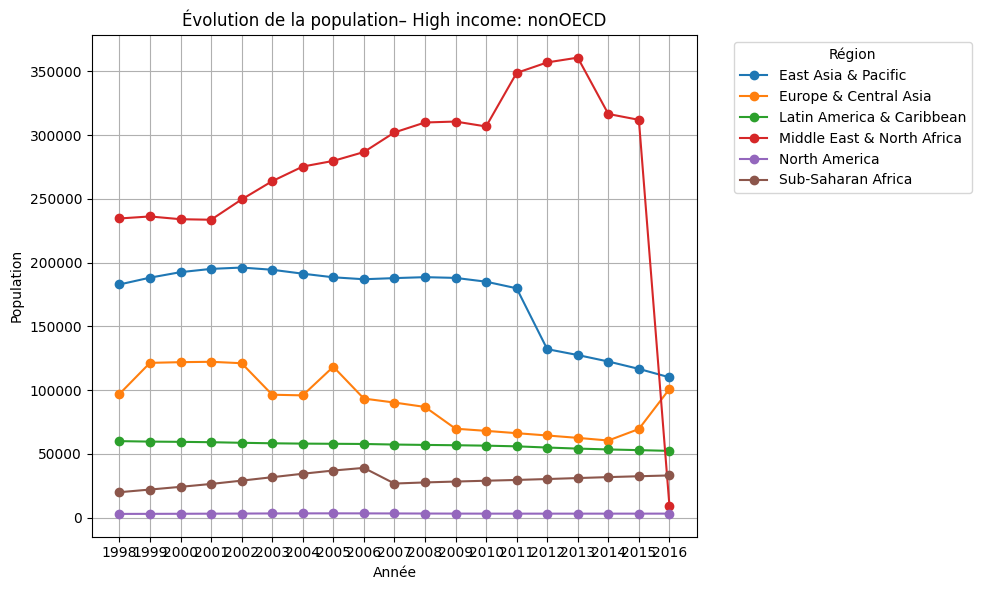

In [156]:
# Spécifie l'Income Group 
selected_income_group = "High income: nonOECD"

# Calcul des moyennes pour ce groupe
grouped = df_pop2_sub.groupby(['Income Group', 'Region'])[years_pop2].mean()

# Extraire les données du groupe sélectionné
data = grouped.loc[selected_income_group]
data = data.T  # Transposer : les années deviennent l'index

# Tracer le graphique
plt.figure(figsize=(10, 6))
for region in data.columns:
    plt.plot(data.index, data[region], marker='o', label=region)

plt.title(f"Évolution de la population– {selected_income_group}")
plt.xlabel("Année")
plt.ylabel("Population")
plt.legend(title="Région", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

On remarque une nette baisse de la popluation au **Moyen-Orient & Afrique du Nord** , intéressons nous à cette région pour voir quel est le problème au niveau des données.

In [157]:
middle_east = df_pop2_sub[df_pop2_sub['Region'] == 'Middle East & North Africa']
missing_2016 = middle_east[middle_east["2016"].isna()][["Country Name"]]
missing_2016

Country Name
18164   United Arab Emirates
63006                Bahrain
155893               Algeria
258389                  Iraq
274404                Jordan
300028                Kuwait
306434               Lebanon
312840                 Libya
344870               Morocco
434554                  Oman
469787    West Bank and Gaza
476193                 Qatar
485802          Saudi Arabia
543456  Syrian Arab Republic
575486               Tunisia

Ces pays étant importants, mais la courbe d'évolution n'étant pas linéaire, il est préférable de leur accorder la valeur qu'ils avaient en 2015.

In [158]:
# 2. Trouver les pays avec une valeur manquante en 2016
mask_missing_2016 = middle_east["2016"].isna()

# 3. Remplacer les NaN de 2016 par la valeur de 2015
df_pop2_sub.loc[mask_missing_2016.index[mask_missing_2016], "2016"] = \
    df_pop2_sub.loc[mask_missing_2016.index[mask_missing_2016], "2015"]

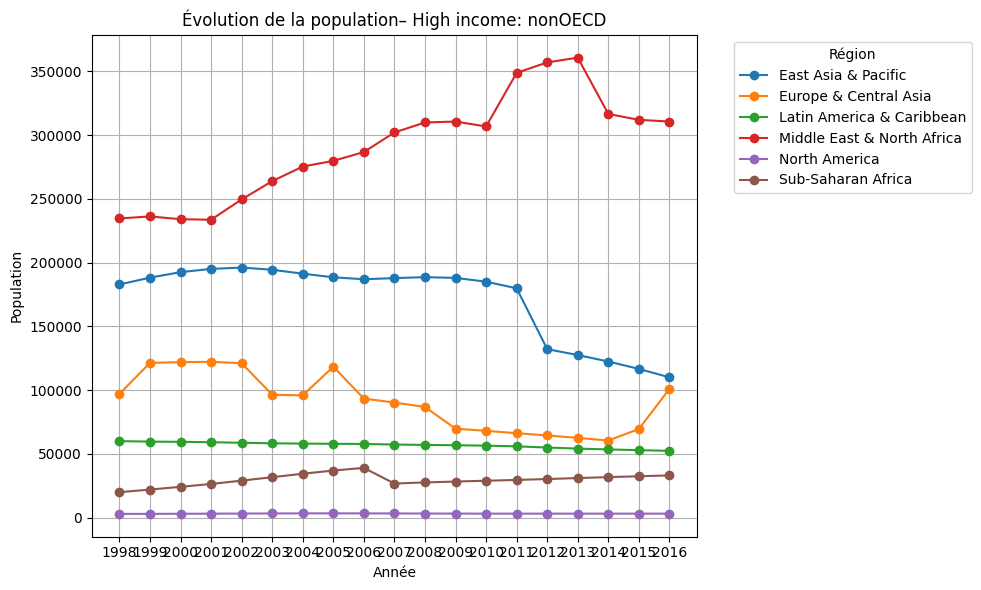

In [159]:
# Spécifie l'Income Group 
selected_income_group = "High income: nonOECD"

# Calcul des moyennes pour ce groupe
grouped = df_pop2_sub.groupby(['Income Group', 'Region'])[years_pop2].mean()

# Extraire les données du groupe sélectionné
data = grouped.loc[selected_income_group]
data = data.T  # Transposer : les années deviennent l'index

# Tracer le graphique
plt.figure(figsize=(10, 6))
for region in data.columns:
    plt.plot(data.index, data[region], marker='o', label=region)

plt.title(f"Évolution de la population– {selected_income_group}")
plt.xlabel("Année")
plt.ylabel("Population")
plt.legend(title="Région", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

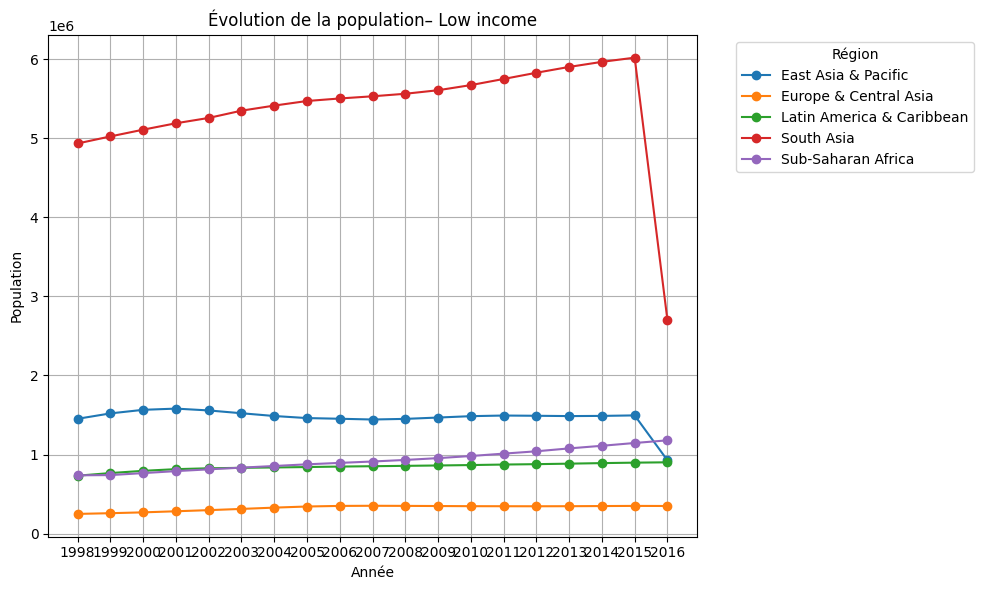

In [160]:
# Spécifie l'Income Group 
selected_income_group = "Low income"

# Calcul des moyennes pour ce groupe
grouped = df_pop2_sub.groupby(['Income Group', 'Region'])[years_pop2].mean()

# Extraire les données du groupe sélectionné
data = grouped.loc[selected_income_group]
data = data.T  # Transposer : les années deviennent l'index

# Tracer le graphique
plt.figure(figsize=(10, 6))
for region in data.columns:
    plt.plot(data.index, data[region], marker='o', label=region)

plt.title(f"Évolution de la population– {selected_income_group}")
plt.xlabel("Année")
plt.ylabel("Population")
plt.legend(title="Région", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

On observe une nette baisse au niveau de l'**Asie du Sud**. On note également que le taux d'évolution semble linéaire, on pourra donc faire un calcul pour remplir les données manquantes.

In [161]:
south_asia = df_pop2_sub[df_pop2_sub['Region'] == 'South Asia']

# Identifier les pays n’ayant **aucune** valeur sur la période
no_data_countries_sa = south_asia[south_asia[years_pop2].isna().all(axis=1)]
no_data_countries_sa

Empty DataFrame
Columns: [Country Name, Region, Income Group, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
Index: []

[0 rows x 22 columns]

In [162]:
missing_2016 = south_asia[south_asia["2016"].isna()][["Country Name"]]
missing_2016

Country Name
5352    Afghanistan
56600    Bangladesh
251983        India
322449    Sri Lanka
437757     Pakistan

In [163]:
# Filtrage
year_columns = [col for col in south_asia.columns if col.isdigit()]

# Transformation longue
south_asia_long = south_asia.melt(
    id_vars=[col for col in south_asia.columns if col not in year_columns],
    value_vars=year_columns,
    var_name='Year',
    value_name='Taux'
)
south_asia_long['Year'] = south_asia_long['Year'].astype(int)

# Calcul du taux d'évolution moyen
south_asia_long['Taux évolution moyen'] = (
    south_asia_long
    .groupby('Country Name')['Taux']
    .pct_change(fill_method=None)
    .rolling(window=3, min_periods=1)
    .mean()
    .reset_index(drop=True)
)
south_asia_filled = (
    south_asia_long
    .groupby('Country Name', group_keys=False)
    .apply(fill_with_dynamic_taux)
    .reset_index(drop=True)
)

/tmp/ipykernel_9241/3189701201.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(fill_with_dynamic_taux)


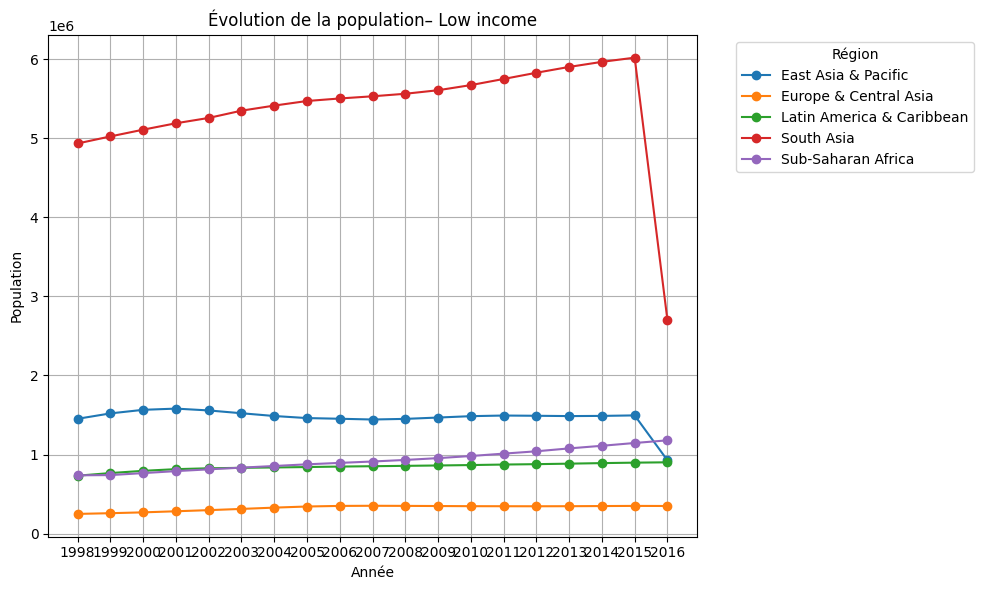

In [164]:
# Spécifie l'Income Group 
selected_income_group = "Low income"

# Calcul des moyennes pour ce groupe
grouped = df_pop2_sub.groupby(['Income Group', 'Region'])[years_pop2].mean()

# Extraire les données du groupe sélectionné
data = grouped.loc[selected_income_group]
data = data.T  # Transposer : les années deviennent l'index

# Tracer le graphique
plt.figure(figsize=(10, 6))
for region in data.columns:
    plt.plot(data.index, data[region], marker='o', label=region)

plt.title(f"Évolution de la population– {selected_income_group}")
plt.xlabel("Année")
plt.ylabel("Population")
plt.legend(title="Région", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [165]:
# 1. Pivotage du DataFrame rempli
filled_wide = (
    south_asia_filled.pivot(index='Country Name', columns='Year', values='Taux remplis')
    .reset_index()
)

# 2. Conversion des années en str (si nécessaire)
filled_wide.columns = filled_wide.columns.astype(str)

# 3. Sélection des colonnes à conserver
years_str = [str(y) for y in years_pop2]
filled_final = filled_wide[["Country Name"] + years_str]

# 4. Suppression des anciennes colonnes annuelles
df_final = df_topic_pop.drop(columns=years_str, errors='ignore')

# 5. Fusion sur "Country Name"
df_topic_pop = df_final.merge(filled_final, on="Country Name", how="left")


#### Remplissage des Topic Population par Pays

In [166]:
df_topic_pop_3 = df_topic_pop[df_topic_pop['Indicator Name'] == 'Population of the official age for tertiary education, both sexes (number)'].copy()
df_bfill_pop_tertiary = df_bfill_population[df_bfill_population['Indicator Name'] == 'Population of the official age for tertiary education, both sexes (number)'].copy()

df_bfill_pop_tertiary.count()

Country Code                195
Country Name                195
Region                      195
Income Group                195
Latest population census    195
Indicator Name              195
Topic                       195
Indicator Code              195
1970                        184
1971                        182
1972                        182
1973                        182
1974                        182
1975                        182
1976                        182
1977                        182
1978                        182
1979                        182
1980                        182
1981                        182
1982                        182
1983                        182
1984                        182
1985                        182
1986                        182
1987                        182
1988                        182
1989                        182
1990                        182
1991                        182
1992                        182
1993    

Au vu des résultats, on peut se concentrer sur l'étude des années **1998** à **2016**

In [167]:
years_pop3 = [year for year in years_passed if 1998 <= int(year) <= 2016]

In [168]:
df_bfill_pop_tertiary[['First valid year', 'Last valid year']] = df_bfill_pop_tertiary.apply(get_first_last_years, axis=1)
df_bfill_pop_tertiary["Total valid years"] = df_bfill_pop_tertiary[years_pop3].notna().sum(axis=1)

df_bfill_pop_tertiary[["Country Name", "Latest population census", "First valid year", "Last valid year", "Total valid years"]].sort_values(by='Total valid years', ascending=False).tail(10)

Country Name  \
537053  Sint Maarten (Dutch part)   
27776              American Samoa   
495414                  Singapore   
472993           French Polynesia   
223159                       Guam   
248783                Isle of Man   
405730              New Caledonia   
341670   St. Martin (French part)   
130272             Cayman Islands   
546662   Turks and Caicos Islands   

                                 Latest population census First valid year  \
537053                                               2011             None   
27776                                                2010             None   
495414                                               2010             1970   
472993                                               2007             None   
223159                                               2010             None   
248783                                               2011             None   
405730                                               2009             None   
341670  Population of the official age for tertiary ed...             None   
130272                                               2010             1970   
546662                                               2012             None   

       Last valid year  Total valid years  
537053            None                  0  
27776             None                  0  
495414            1970                  0  
472993            None                  0  
223159            None                  0  
248783            None                  0  
405730            None                  0  
341670            None                  0  
130272            1970                  0  
546662            None                  0

In [169]:
df_bfill_pop_tertiary[df_bfill_pop_tertiary["Total valid years"] == 0]['Country Name']

27776                American Samoa
130272               Cayman Islands
216753                    Greenland
223159                         Guam
248783                  Isle of Man
341670     St. Martin (French part)
348076                       Monaco
383309     Northern Mariana Islands
405730                New Caledonia
472993             French Polynesia
495414                    Singapore
537053    Sint Maarten (Dutch part)
546662     Turks and Caicos Islands
Name: Country Name, dtype: object

Comme vu précédement, la majorité des pays n'ayant pas de valeurs sont des îles. Il serait  nécessaire de récupérer les données liées à Singapour.

In [170]:
df_topic_pop_3['Indicator Name'].unique()

array(['Population of the official age for tertiary education, both sexes (number)'],
      dtype=object)

In [171]:
# 4. Calculer le taux de remplissage (valeurs non manquantes) par Topic
taux_par_pop3 = df_topic_pop_3.groupby('Income Group')[years_pop3].apply(lambda x: x.notna().mean().mean() * 100).round(2)

# 5. Transformer en DataFrame pour affichage clair
df_taux = taux_par_pop3.reset_index()
df_taux.columns = ['Income Group', 'Taux de remplissage (%)']
df_taux

Income Group  Taux de remplissage (%)
0     High income: OECD                     0.00
1  High income: nonOECD                     0.00
2            Low income                     9.68
3   Lower middle income                     9.30
4   Upper middle income                     1.92

In [172]:

# 2. Calcul du taux de remplissage (% de pays non-NaN) par indicateur et par année
taux_filled_by_year = df_topic_pop_3.groupby('Income Group')[years_pop3].apply(
    lambda x: x.notna().mean() * 100
).round(2)

# 3. Résultat : un DataFrame avec les années en colonnes et un % par indicateur
taux_filled_by_year.head()

1998  1999  2000  2001  2002  2003  2004  2005  2006  \
Income Group                                                                 
High income: OECD     0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
High income: nonOECD  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
Low income            9.68  9.68  9.68  9.68  9.68  9.68  9.68  9.68  9.68   
Lower middle income   9.30  9.30  9.30  9.30  9.30  9.30  9.30  9.30  9.30   
Upper middle income   1.92  1.92  1.92  1.92  1.92  1.92  1.92  1.92  1.92   

                      2007  2008  2009  2010  2011  2012  2013  2014  2015  \
Income Group                                                                 
High income: OECD     0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
High income: nonOECD  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
Low income            9.68  9.68  9.68  9.68  9.68  9.68  9.68  9.68  9.68   
Lower middle income   9.30  9.30  9.30  9.30  9.30  9.30  9.30  9.30  9.30   
Upper middle income   1.92  1.92  1.92  1.92  1.92  1.92  1.92  1.92  1.92   

                      2016  
Income Group                
High income: OECD     0.00  
High income: nonOECD  0.00  
Low income            9.68  
Lower middle income   9.30  
Upper middle income   1.92

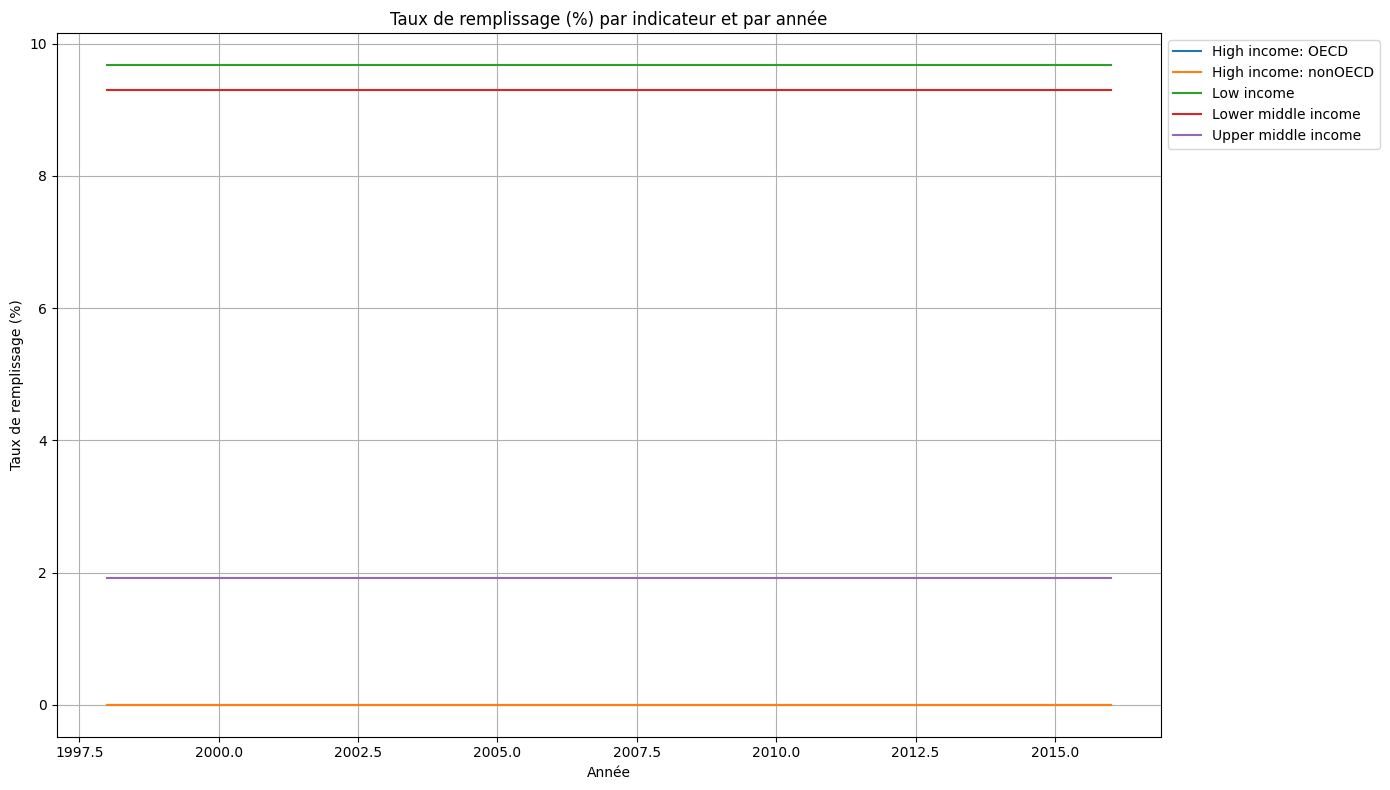

In [173]:
# 1. Taille du graphe
plt.figure(figsize=(14, 8))

# 2. Boucle sur chaque indicateur
for indicateur in taux_filled_by_year.index:
    plt.plot(
        taux_filled_by_year.columns.astype(int),   # années
        taux_filled_by_year.loc[indicateur],       # valeurs %
        label=indicateur
    )

# 3. Mise en forme
plt.title("Taux de remplissage (%) par indicateur et par année")
plt.xlabel("Année")
plt.ylabel("Taux de remplissage (%)")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

L'indicateur étant peu rempli, il ne semble pas nécessaire de récuper les données.

In [174]:
indic_to_drop = ['Population of the official age for tertiary education, both sexes (number)']

In [175]:
df_topic_pop = df_topic_pop[
    ~df_topic_pop['Indicator Name'].isin(indic_to_drop)
]

### Comparaison des 2 autres indicateurs

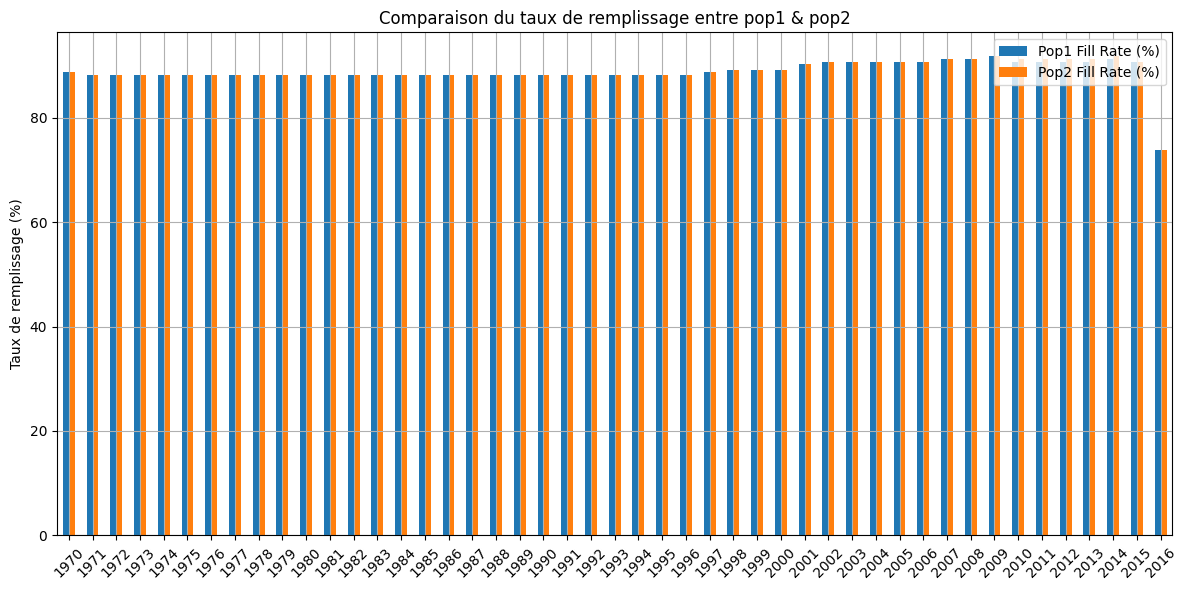

In [176]:
cols_to_drop_pop1 = ['Country Name', 'Country Code', 'Region','Income Group', 'Topic', 'Indicator Name', 'Indicator Code', 'Latest population census', 'First valid year', 'Last valid year', 'Total valid years']
df_topic_pop1_comparison = df_topic_pop_1.copy()
df_topic_pop1_comparison  = df_topic_pop1_comparison.drop(columns = cols_to_drop_pop1)
cols_to_drop_pop2 = ['Country Code', 'Country Name', 'Income Group', 'Region','Topic', 'Indicator Name', 'Indicator Code', 'Latest population census']

df_topic_pop2_comparison = df_topic_pop_2.copy()
df_topic_pop2_comparison = df_topic_pop2_comparison.drop(columns = cols_to_drop_pop2)                       
fill_rate_pop1 = df_topic_pop1_comparison.notna().mean() * 100
fill_rate_pop2 = df_topic_pop2_comparison.notna().mean() * 100

fill_rate_comparison = pd.DataFrame({
    'Pop1 Fill Rate (%)': fill_rate_pop1,
    'Pop2 Fill Rate (%)': fill_rate_pop2
})


fill_rate_comparison[['Pop1 Fill Rate (%)', 'Pop2 Fill Rate (%)']].plot(kind='bar', figsize=(12, 6))
plt.ylabel('Taux de remplissage (%)')
plt.title('Comparaison du taux de remplissage entre pop1 & pop2')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [177]:
df_topic_pop['Indicator Name'].unique()

array(['Population of the official age for secondary education, both sexes (number)',
       'Population of the official age for upper secondary education, both sexes (number)'],
      dtype=object)

L'indicateur **secondary education** comprend les collégiens & lycéens, tandis que **upper secondary** concerne uniquement les lycéens. On va donc le choisir comme indicateur pour la population.

In [178]:
indic_to_keep = ['Population of the official age for upper secondary education, both sexes (number)']
df_topic_pop = df_topic_pop[
    df_topic_pop['Indicator Name'].isin(indic_to_keep)
]

### Indicateurs du Topic 'Infrastructure: Communications'

In [179]:
topic_infra = df_filtered_topics[df_filtered_topics['Topic'] == 'Infrastructure: Communications']
indicators_infra_list = topic_infra['Indicator Name'].unique().tolist()
indicators_infra_list

['Personal computers (per 100 people)', 'Internet users (per 100 people)']

In [180]:
# 1. Filtrer pour ne garder que les indicateurs que l'on souhaite
df_subset = topic_infra[topic_infra['Indicator Name'].isin(indicators_infra_list)]

# 2. Calcul du taux de remplissage (% de pays non-NaN) par indicateur et par année
taux_filled_by_year = df_subset.groupby('Indicator Name')[years_passed].apply(
    lambda x: x.notna().mean() * 100
).round(2)

# 3. Résultat : un DataFrame avec les années en colonnes et un % par indicateur
taux_filled_by_year.head()


1970  1971  1972  1973  1974  1975  1976  \
Indicator Name                                                                  
Internet users (per 100 people)      3.59   0.0   0.0   0.0   0.0  3.59  3.59   
Personal computers (per 100 people)  0.51   0.0   0.0   0.0   0.0  0.51  0.51   

                                     1977  1978  1979  ...   2007   2008  \
Indicator Name                                         ...                 
Internet users (per 100 people)      3.59  3.59  3.59  ...  95.38  94.87   
Personal computers (per 100 people)  0.51  0.51  0.51  ...  22.56  13.33   

                                      2009   2010   2011   2012   2013   2014  \
Indicator Name                                                                  
Internet users (per 100 people)      94.36  94.36  95.38  94.36  94.36  94.36   
Personal computers (per 100 people)   1.54   0.00   0.00   0.00   0.00   0.00   

                                      2015   2016  
Indicator Name                                     
Internet users (per 100 people)      94.36  94.36  
Personal computers (per 100 people)   0.00   0.00  

[2 rows x 47 columns]

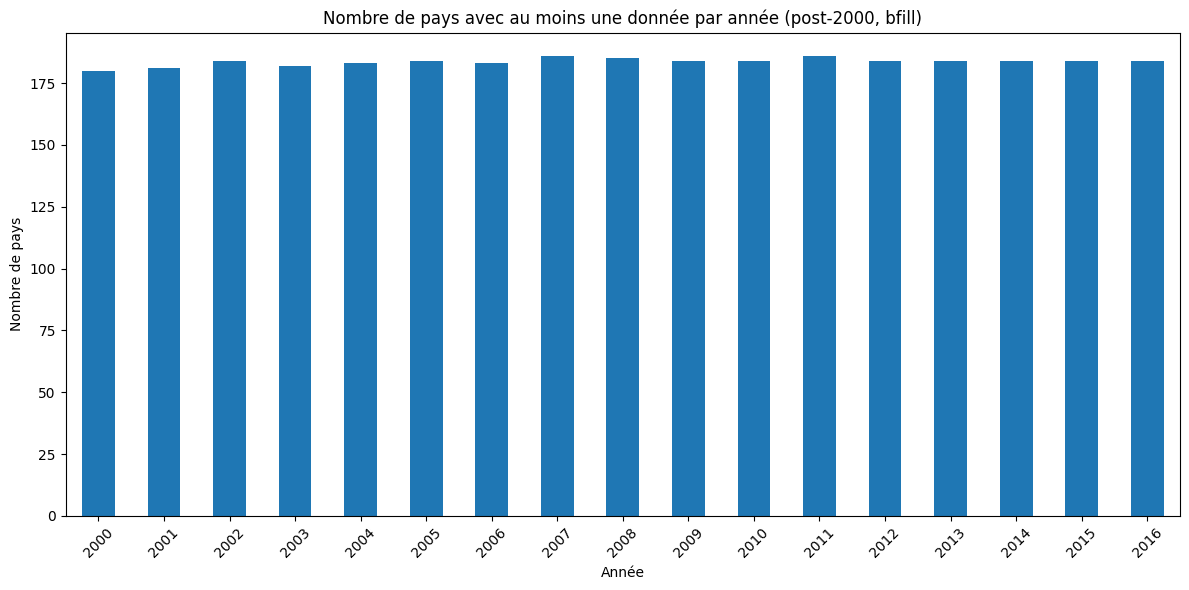

In [181]:
df_infra_bfill = topic_infra.copy()
df_infra_bfill[years_cols] = topic_infra[years_cols].bfill(axis=1)

# 3. Calculer les pays avec au moins une donnée non manquante par année
country_not_nan = topic_infra.groupby('Country Name')[years_post_2000].apply(lambda g: g.notna().any())

# 4. Compter le nombre de pays avec des données chaque année
nb_country_by_year = country_not_nan.sum(axis=0)

# 5. Affichage

plt.figure(figsize=(12,6))
nb_country_by_year.plot(kind='bar')
plt.title("Nombre de pays avec au moins une donnée par année (post-2000, bfill)")
plt.xlabel("Année")
plt.ylabel("Nombre de pays")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

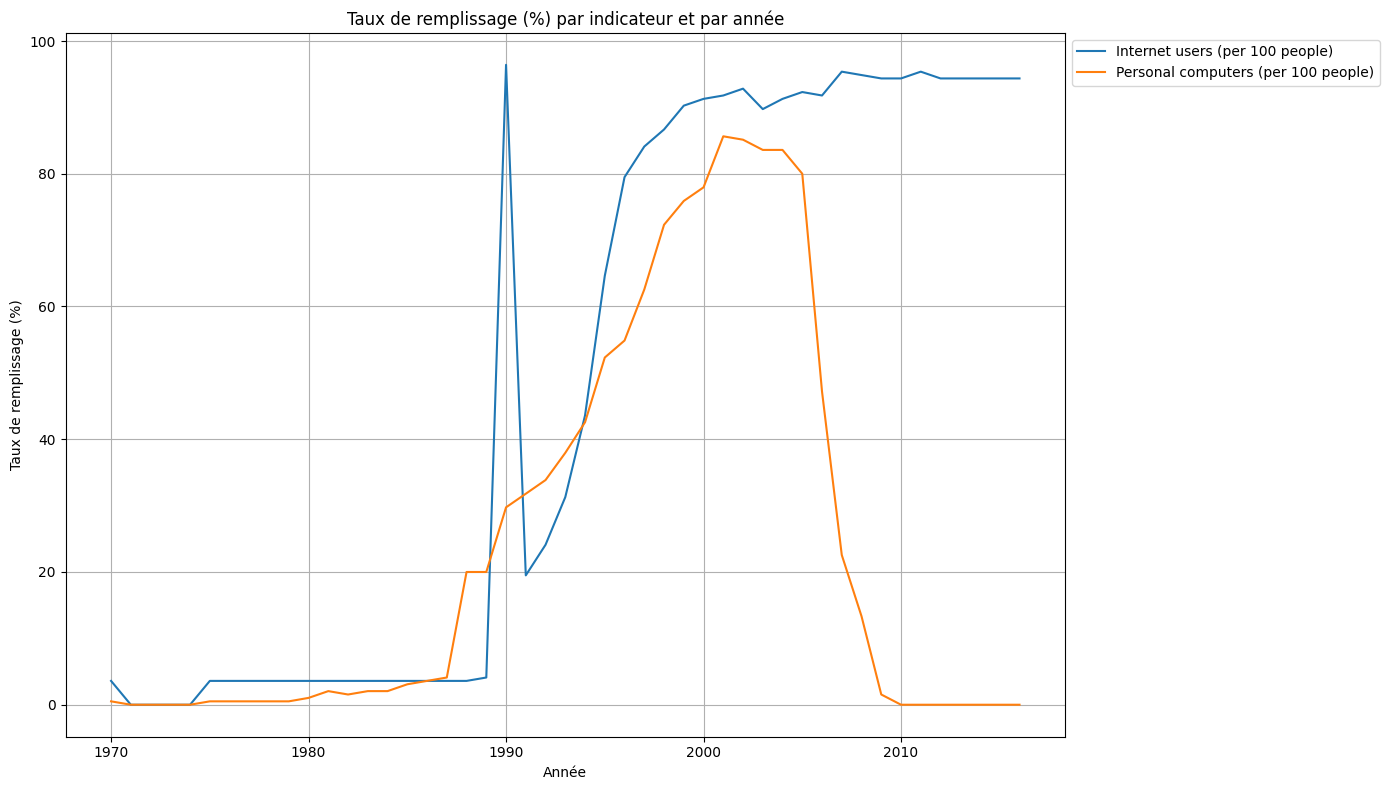

In [182]:
# 1. Taille du graphe
plt.figure(figsize=(14, 8))

# 2. Boucle sur chaque indicateur
for indicateur in taux_filled_by_year.index:
    plt.plot(
        taux_filled_by_year.columns.astype(int),   # années
        taux_filled_by_year.loc[indicateur],       # valeurs %
        label=indicateur
    )

# 3. Mise en forme
plt.title("Taux de remplissage (%) par indicateur et par année")
plt.xlabel("Année")
plt.ylabel("Taux de remplissage (%)")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

On note une forte hausse de l'usage d'internet en 1990. On peut supposer qu'il y a très peu de valeurs remplies. Nous ne tiendrons pas compte de cette année dans notre analyse.

In [183]:
df_infra_pc = topic_infra[topic_infra['Indicator Name'] == 'Personal computers (per 100 people)']

In [184]:
df_bfilled_infra = df_bfilled[df_bfilled['Indicator Name'].isin(indicators_infra_list)]
df_bfilled_infra_pc = df_bfilled_infra[df_bfilled_infra['Indicator Name'] == 'Personal computers (per 100 people)']
df_bfilled_infra_pc.count()

Country Code                195
Country Name                195
Region                      195
Income Group                195
Latest population census    195
Indicator Name              195
Topic                       195
Indicator Code              195
1970                        176
1971                        176
1972                        176
1973                        176
1974                        176
1975                        176
1976                        176
1977                        176
1978                        176
1979                        176
1980                        176
1981                        176
1982                        176
1983                        176
1984                        176
1985                        176
1986                        176
1987                        176
1988                        176
1989                        176
1990                        176
1991                        176
1992                        176
1993    

Au vu du remplissage des années, on peut se concentrer sur l'études des années **2000** à **2009**

In [185]:

df_infra_pc[['First valid year', 'Last valid year']] = df_infra_pc.apply(get_first_last_years, axis=1)
df_infra_pc["Total valid years"] = df_infra_pc[years_passed].notna().sum(axis=1)

df_infra_pc[["Country Name", "First valid year", "Last valid year", "Total valid years"]].sort_values(by='Total valid years', ascending=False).head(10)

/tmp/ipykernel_9241/3737503920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_infra_pc[['First valid year', 'Last valid year']] = df_infra_pc.apply(get_first_last_years, axis=1)
/tmp/ipykernel_9241/3737503920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_infra_pc[['First valid year', 'Last valid year']] = df_infra_pc.apply(get_first_last_years, axis=1)
/tmp/ipykernel_9241/3737503920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

Country Name First valid year Last valid year  \
96700                 Canada             1980            2006   
490669               Senegal             1981            2005   
596368         United States             1981            2006   
192790                 Ghana             1983            2008   
186384        United Kingdom             1985            2006   
228023  Hong Kong SAR, China             1988            2008   
461842              Portugal             1988            2008   
99903            Switzerland             1988            2008   
163963                 Spain             1988            2007   
266459                 Italy             1986            2005   

        Total valid years  
96700                  27  
490669                 25  
596368                 24  
192790                 24  
186384                 22  
228023                 21  
461842                 21  
99903                  21  
163963                 20  
266459                 20

In [186]:
# 1. Sélection des années 
years_pc = [year for year in years_passed if 2000 <= int(year) <= 2009]


# 4. Calculer le taux de remplissage (valeurs non manquantes) par Topic
taux_par_pc = df_infra_pc.groupby('Income Group')[years_pc].apply(lambda x: x.notna().mean().mean() * 100).round(2)

# 5. Transformer en DataFrame pour affichage clair
df_taux = taux_par_pc.reset_index()
df_taux.columns = ['Income Group', 'Taux de remplissage (%)']
df_taux

Income Group  Taux de remplissage (%)
0     High income: OECD                    68.00
1  High income: nonOECD                    44.86
2            Low income                    58.71
3   Lower middle income                    63.02
4   Upper middle income                    59.23

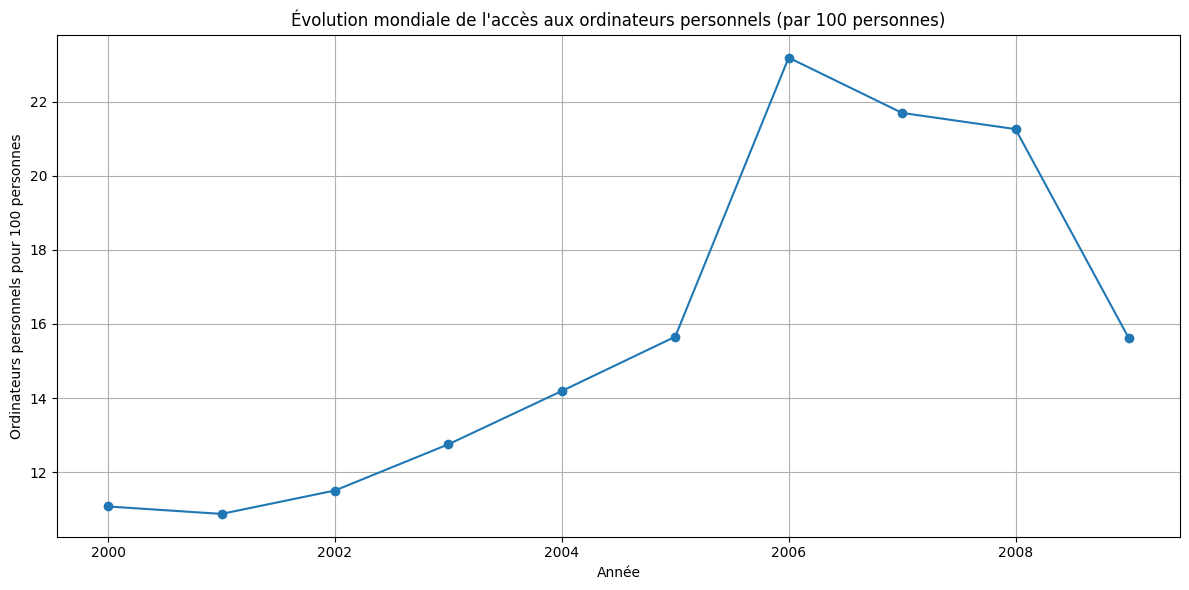

In [187]:
# 1. Création d'un nouveau DF avec melt.
df_long = df_infra_pc.melt(
    id_vars=['Country Name'],
    value_vars=years_pc,
    var_name='Year',
    value_name='PCs_per_100_people'
)
### La fonction melt() de pandas permet de transformer un DataFrame "large" en un DataFrame "long"
###c’est-à-dire de passer d’un format avec une colonne par année à un format où les années deviennent des lignes.

# 2. Convertir "Year" en entier
df_long['Year'] = df_long['Year'].astype(int)

# 3. Moyenne par année pour  n'avoir qu'une seule courbe
df_yearly_avg = df_long.groupby('Year')['PCs_per_100_people'].mean().reset_index()

# 4. Tracer
plt.figure(figsize=(12, 6))
plt.plot(df_yearly_avg['Year'], df_yearly_avg['PCs_per_100_people'], marker='o')
plt.title("Évolution mondiale de l'accès aux ordinateurs personnels (par 100 personnes)")
plt.xlabel("Année")
plt.ylabel("Ordinateurs personnels pour 100 personnes")
plt.grid(True)
plt.tight_layout()
plt.show()

### Remplissage des années

In [188]:
df_infra_pc[["Country Name", "Region", "Income Group"]+years_pc]

Country Name                     Region          Income Group  \
610            Aruba  Latin America & Caribbean  High income: nonOECD   
3813     Afghanistan                 South Asia            Low income   
7016          Angola         Sub-Saharan Africa   Upper middle income   
10219        Albania      Europe & Central Asia   Upper middle income   
13422        Andorra      Europe & Central Asia  High income: nonOECD   
...              ...                        ...                   ...   
609180       Vanuatu        East Asia & Pacific   Lower middle income   
612383         Samoa        East Asia & Pacific   Lower middle income   
615586  South Africa         Sub-Saharan Africa   Upper middle income   
618789        Zambia         Sub-Saharan Africa   Lower middle income   
621992      Zimbabwe         Sub-Saharan Africa            Low income   

            2000      2001      2002      2003      2004      2005      2006  \
610          NaN       NaN       NaN       NaN       NaN  7.923544  9.917683   
3813         NaN       NaN       NaN       NaN       NaN  0.341903  0.390148   
7016    0.107720  0.118176  0.181371       NaN       NaN  0.564518  0.646019   
10219   0.756442  0.912941  1.103078  1.296542  1.492446  1.689543  3.774092   
13422        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
...          ...       ...       ...       ...       ...       ...       ...   
609180  1.296891  1.373590  1.546790  1.507901  1.469616  1.432836       NaN   
612383  0.572692  0.626541  0.679532  1.125638  1.566048  1.945223  2.319506   
615586  6.466533  6.811208  7.144745  7.495355  7.864904  8.222196       NaN   
618789  0.693002  0.723789  0.752911  0.871998  1.011217  1.142108       NaN   
621992  1.559544  1.588971  4.746489  4.892251  5.514830  6.687338  6.798012   

           2007      2008  2009  
610         NaN       NaN   NaN  
3813        NaN       NaN   NaN  
7016        NaN       NaN   NaN  
10219   4.10584  4.593538   NaN  
13422       NaN       NaN   NaN  
...         ...       ...   ...  
609180      NaN       NaN   NaN  
612383      NaN       NaN   NaN  
615586      NaN       NaN   NaN  
618789      NaN       NaN   NaN  
621992      NaN  7.431140   NaN  

[195 rows x 13 columns]

In [189]:
# Supprimer les colonnes inutiles
df_pc_sub = df_infra_pc[["Country Name", "Region", "Income Group"]+years_pc]


# 1. Vérifier les données manquantes par région
region_missing = df_pc_sub.groupby('Region')[years_pc].apply(lambda x: x.notna().sum())

# 2. Vérifier les données manquantes par income group
income_missing = df_pc_sub.groupby('Income Group')[years_pc].apply(lambda x: x.notna().sum())
income_missing

2000  2001  2002  2003  2004  2005  2006  2007  2008  \
Income Group                                                                 
High income: OECD       30    30    29    29    27    27    21     7     4   
High income: nonOECD    22    25    24    23    23    22    15     8     4   
Low income              23    27    27    27    28    29    13     6     2   
Lower middle income     38    40    40    40    40    38    18     9     6   
Upper middle income     38    45    46    44    45    40    25    14    10   

                      2009  
Income Group                
High income: OECD        0  
High income: nonOECD     0  
Low income               0  
Lower middle income      2  
Upper middle income      1

**Regardons maintenant les évolutions du taux par 'Income Group'**

In [190]:
# 1. Supprimer les colonnes inutiles
df_pc_sub = df_infra_pc[["Country Name", "Region", "Income Group"] + years_pc].copy()

# 2. Conversion des années en float pour éviter les erreurs sur des valeurs non numériques
for year in years_pc:
    df_pc_sub[year] = pd.to_numeric(df_pc_sub[year], errors='coerce')

# 3. Moyenne par Income Group et par année
income_group_evolution = df_pc_sub.groupby("Income Group")[years_pc].mean()

# 4. Transposer pour avoir les années en index (pour l'affichage)
income_group_evolution_T = income_group_evolution.T
income_group_evolution_T.index.name = "Year"
income_group_evolution_T

Income Group  High income: OECD  High income: nonOECD  Low income  \
Year                                                                
2000                  31.654569             18.605911    0.348859   
2001                  34.585926             18.073490    0.361676   
2002                  36.527843             19.576914    0.553007   
2003                  40.477346             20.224778    0.636901   
2004                  46.157035             24.036866    0.728637   
2005                  50.899635             24.888184    0.922479   
2006                  58.749300             33.831900    1.282714   
2007                  45.990393             48.122243    1.416575   
2008                  49.660688             53.075058    4.180067   
2009                        NaN                   NaN         NaN   

Income Group  Lower middle income  Upper middle income  
Year                                                    
2000                     1.432299             5.458076  
2001                     1.664873             5.568617  
2002                     1.946590             6.267813  
2003                     2.440517             7.388126  
2004                     3.052734             8.257908  
2005                     4.028654             8.518072  
2006                     6.075914            10.625894  
2007                     7.030416            12.556842  
2008                     6.661540             9.337866  
2009                    15.348687            16.127567

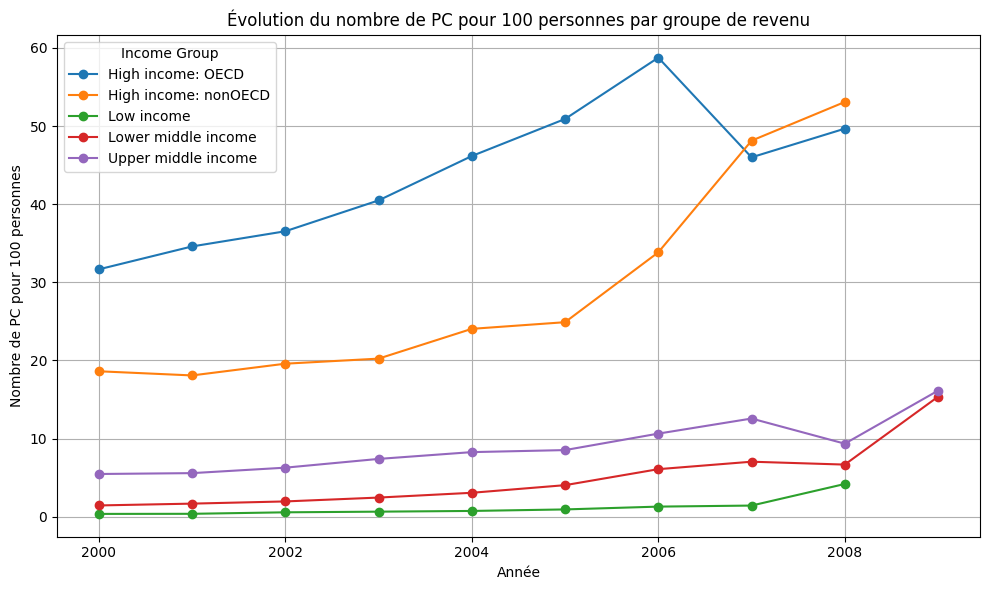

In [191]:
income_group_evolution_T.plot(figsize=(10,6), marker='o')
plt.title("Évolution du nombre de PC pour 100 personnes par groupe de revenu")
plt.ylabel("Nombre de PC pour 100 personnes")
plt.xlabel("Année")
plt.grid(True)
plt.legend(title="Income Group")
plt.tight_layout()
plt.show()

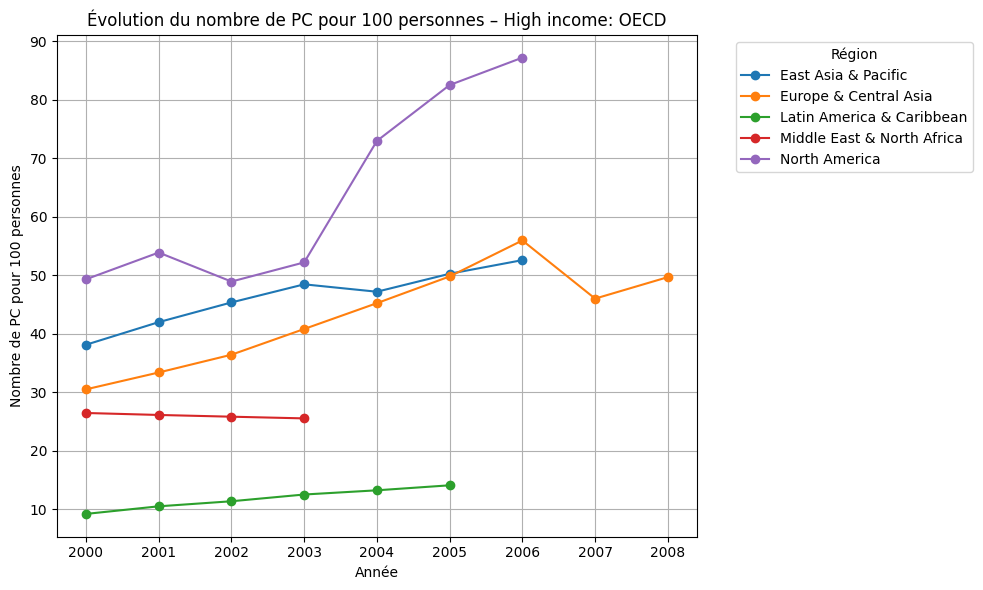

In [192]:
# Spécifie l'Income Group 
selected_income_group = "High income: OECD"

# Calcul des moyennes pour ce groupe
grouped = df_pc_sub.groupby(['Income Group', 'Region'])[years_pc].mean()

# Extraire les données du groupe sélectionné
data = grouped.loc[selected_income_group]
data = data.T  # Transposer : les années deviennent l'index

# Tracer le graphique
plt.figure(figsize=(10, 6))
for region in data.columns:
    plt.plot(data.index, data[region], marker='o', label=region)

plt.title(f"Évolution du nombre de PC pour 100 personnes – {selected_income_group}")
plt.xlabel("Année")
plt.ylabel("Nombre de PC pour 100 personnes")
plt.legend(title="Région", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

L'évolution de **'North America'** n'est pas linéaire : il vaut mieux éviter d'essayer de compléter les données manquantes.  
L'évolution de **'Middle East & North Africa'** et de **'Latin America & Caribbean'** sont linéaire, mais vu que le taux est largement inférieur à 30%, il y a peu d'utilité de récupérer les données.  
L'évolution de **'East Asia & Pacific'** semble linéaire, et il peut donc être intéressant d'essayer de récupérer les données.

Recherche des pays de **"East Asia & Pacific'** sans valeurs, pour voir si il est utile ou non de récupérer les données.

In [193]:
# Filtrer les pays de la région 'East Asia & Pacific'
east_asia = df_pc_sub[df_pc_sub["Region"] == "East Asia & Pacific"]

# Identifier les pays n’ayant **aucune** valeur sur la période
no_data_countries_ea = east_asia[east_asia[years_pc].isna().all(axis=1)]
no_data_countries_ea

Country Name               Region          Income Group  \
26234             American Samoa  East Asia & Pacific   Upper middle income   
221617                      Guam  East Asia & Pacific  High income: nonOECD   
381767  Northern Mariana Islands  East Asia & Pacific  High income: nonOECD   
449030                     Palau  East Asia & Pacific   Upper middle income   
564338               Timor-Leste  East Asia & Pacific   Lower middle income   

        2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  
26234    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
221617   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
381767   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
449030   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
564338   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN

Les pays n'ayant pas de données sont des îles, peu peuplées. Nous n'allons donc pas récupérer les valeurs.

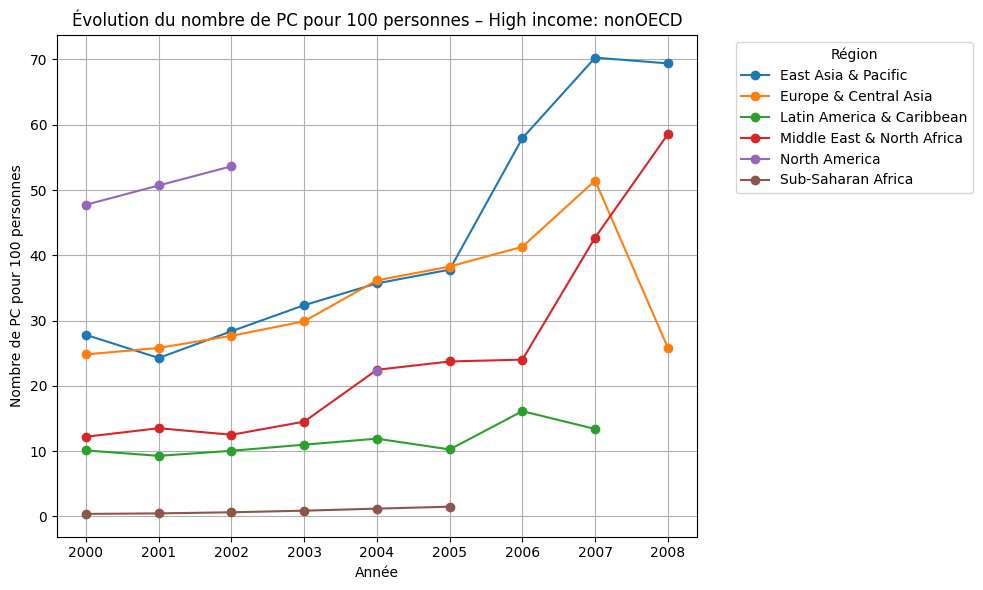

In [194]:
# Spécifie l'Income Group
selected_income_group = "High income: nonOECD"

# Calcul des moyennes pour ce groupe
grouped = df_pc_sub.groupby(['Income Group', 'Region'])[years_pc].mean()

# Extraire les données du groupe sélectionné
data = grouped.loc[selected_income_group]
data = data.T  # Transposer : les années deviennent l'index

# Tracer le graphique
plt.figure(figsize=(10, 6))
for region in data.columns:
    plt.plot(data.index, data[region], marker='o', label=region)

plt.title(f"Évolution du nombre de PC pour 100 personnes – {selected_income_group}")
plt.xlabel("Année")
plt.ylabel("Nombre de PC pour 100 personnes")
plt.legend(title="Région", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [195]:
# Filtrer les pays de la région 'East Asia & Pacific'
north_america = df_pc_sub[df_pc_sub["Region"] == "North America"]
north_america

Country Name         Region          Income Group       2000  \
74279         Bermuda  North America  High income: nonOECD  47.742572   
96700          Canada  North America     High income: OECD  42.023069   
596368  United States  North America     High income: OECD  56.571740   

             2001       2002       2003       2004       2005       2006  \
74279   50.700298  53.633682        NaN  22.296631        NaN        NaN   
96700   45.825982  48.907186  52.181541  70.157122  87.728023  94.446705   
596368  61.906016        NaN        NaN  75.742688  77.272444  79.915488   

        2007  2008  2009  
74279    NaN   NaN   NaN  
96700    NaN   NaN   NaN  
596368   NaN   NaN   NaN

Les **Etats Unis** et le **Canada** n'ont pas de valeur après 2006. Il est impératif d'en déduire de nouvelles.

In [196]:
list_na = ['United States', 'Canada']
north_america = north_america[north_america['Country Name'].isin(list_na)]

In [197]:

year_columns = [col for col in north_america.columns if col.isdigit()]

# Transformation longue
north_america_long = north_america.melt(
    id_vars=[col for col in north_america.columns if col not in year_columns],
    value_vars=year_columns,
    var_name='Year',
    value_name='Taux'
)
north_america_long['Year'] = north_america_long['Year'].astype(int)

# Calcul du taux d'évolution moyen
north_america_long['Taux évolution moyen'] = (
    north_america_long
    .groupby('Country Name')['Taux']
    .pct_change(fill_method=None)
    .rolling(window=3, min_periods=1)
    .mean()
    .reset_index(drop=True)
)
north_america_filled = (
    north_america_long
    .groupby('Country Name', group_keys=False)
    .apply(fill_with_dynamic_taux)
    .reset_index(drop=True)
)


/tmp/ipykernel_9241/2498585074.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(fill_with_dynamic_taux)


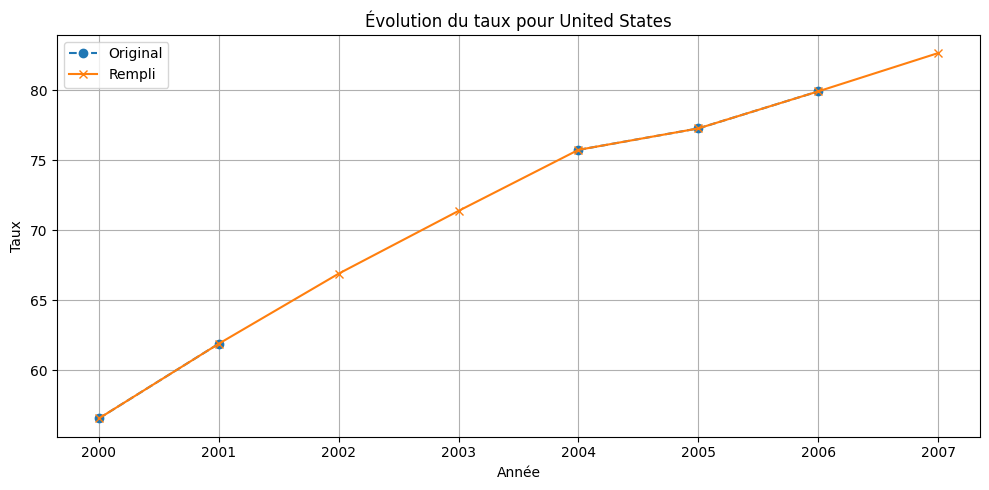

In [198]:
# 4. Affichage pour un pays donné
country = "United States" 
plt.figure(figsize=(10, 5))
subset = north_america_filled[north_america_filled['Country Name'] == country]

plt.plot(subset['Year'], subset['Taux'], label='Original', marker='o', linestyle='--')
plt.plot(subset['Year'], subset['Taux remplis'], label='Rempli', marker='x')

plt.title(f"Évolution du taux pour {country}")
plt.xlabel("Année")
plt.ylabel("Taux")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

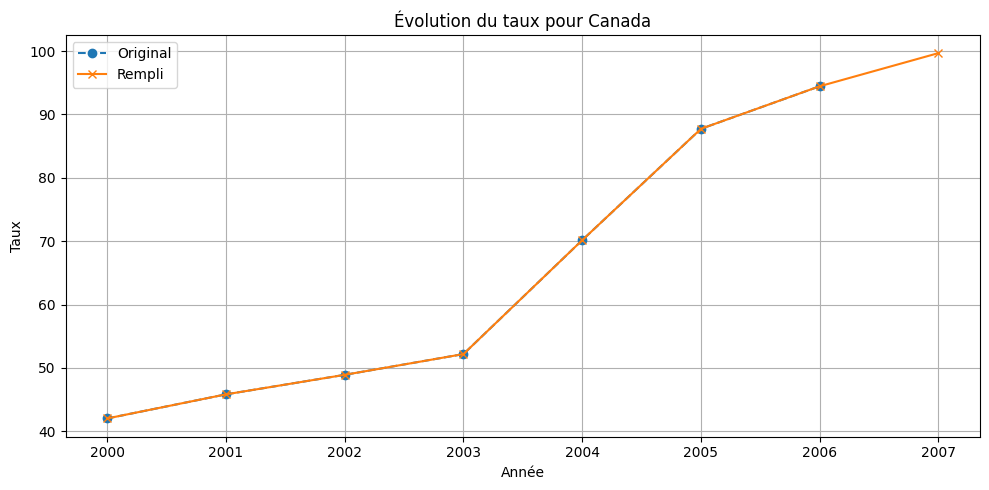

In [199]:
# 4. Affichage pour un pays donné
country = "Canada" 
plt.figure(figsize=(10, 5))
subset = north_america_filled[north_america_filled['Country Name'] == country]

plt.plot(subset['Year'], subset['Taux'], label='Original', marker='o', linestyle='--')
plt.plot(subset['Year'], subset['Taux remplis'], label='Rempli', marker='x')

plt.title(f"Évolution du taux pour {country}")
plt.xlabel("Année")
plt.ylabel("Taux")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [200]:
# 1. Pivotage du DataFrame rempli
filled_wide = (
    north_america_filled.pivot(index='Country Name', columns='Year', values='Taux remplis')
    .reset_index()
)

# 2. Conversion des années en str (si nécessaire)
filled_wide.columns = filled_wide.columns.astype(str)

# 3. Sélection des colonnes à conserver
years_str = [str(y) for y in years_pc]
filled_final = filled_wide[["Country Name"] + years_str]

# 4. Suppression des anciennes colonnes annuelles
df_final = df_infra_pc.drop(columns=years_str, errors='ignore')

# 5. Fusion sur "Country Name"
df_infra_pc = df_final.merge(filled_final, on="Country Name", how="left")

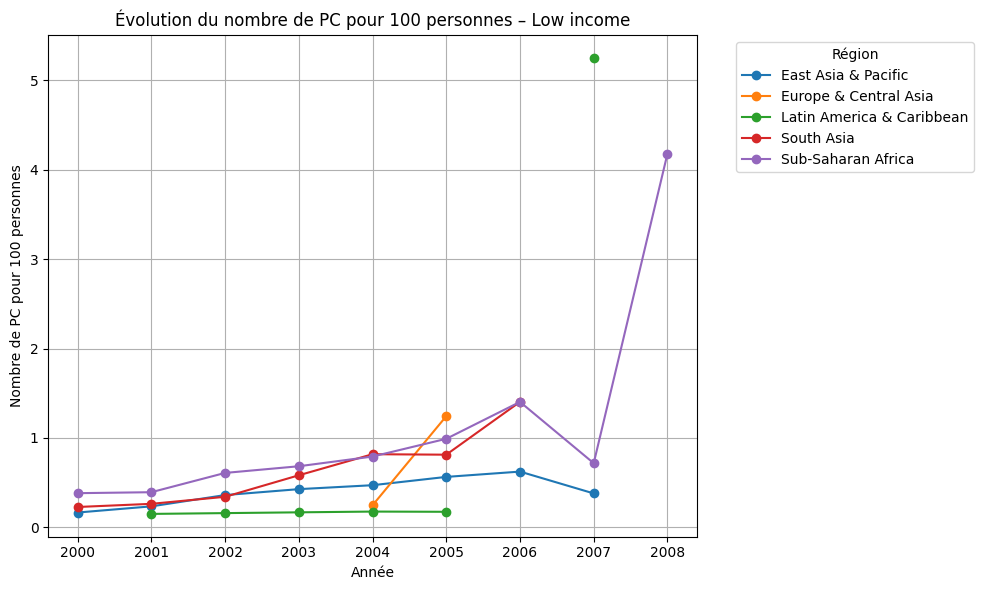

In [201]:
# Spécifie l'Income Group que tu veux afficher
selected_income_group = "Low income"

# Calcul des moyennes pour ce groupe
grouped = df_pc_sub.groupby(['Income Group', 'Region'])[years_pc].mean()

# Extraire les données du groupe sélectionné
data = grouped.loc[selected_income_group]
data = data.T  # Transposer : les années deviennent l'index

# Tracer le graphique
plt.figure(figsize=(10, 6))
for region in data.columns:
    plt.plot(data.index, data[region], marker='o', label=region)

plt.title(f"Évolution du nombre de PC pour 100 personnes – {selected_income_group}")
plt.xlabel("Année")
plt.ylabel("Nombre de PC pour 100 personnes")
plt.legend(title="Région", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Les taux étant très faibles, moins de 5%, il paraît peu utile de récupérer les données manquantes.

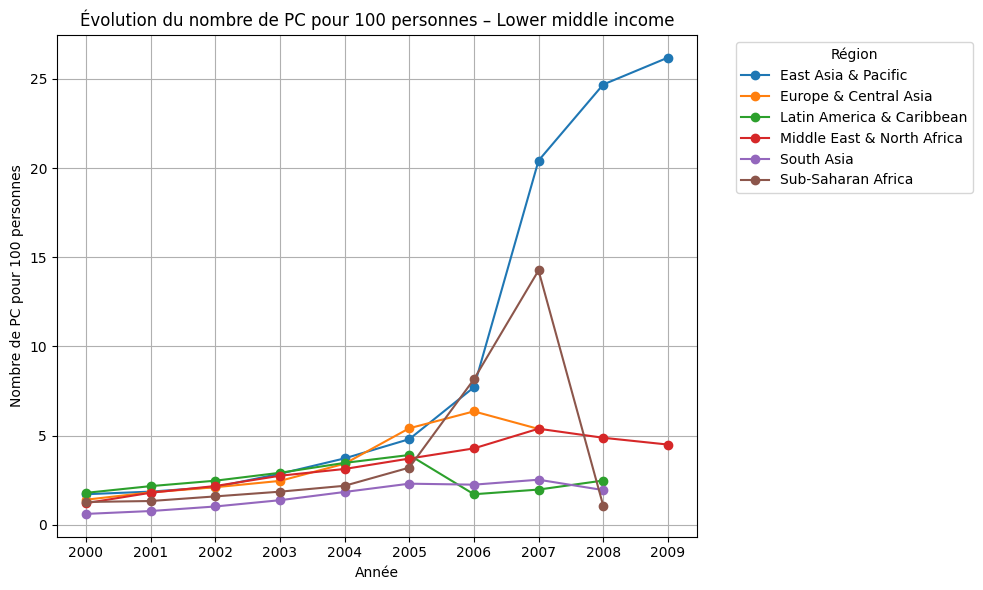

In [202]:
# Spécifie l'Income Group que tu veux afficher
selected_income_group = "Lower middle income"

# Calcul des moyennes pour ce groupe
grouped = df_pc_sub.groupby(['Income Group', 'Region'])[years_pc].mean()

# Extraire les données du groupe sélectionné
data = grouped.loc[selected_income_group]
data = data.T  # Transposer : les années deviennent l'index

# Tracer le graphique
plt.figure(figsize=(10, 6))
for region in data.columns:
    plt.plot(data.index, data[region], marker='o', label=region)

plt.title(f"Évolution du nombre de PC pour 100 personnes – {selected_income_group}")
plt.xlabel("Année")
plt.ylabel("Nombre de PC pour 100 personnes")
plt.legend(title="Région", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Les données paraissent en majorité complète, et pour celles manquantes, le taux étant inférieur à 5%, il paraît peu utile de récupérer les données.

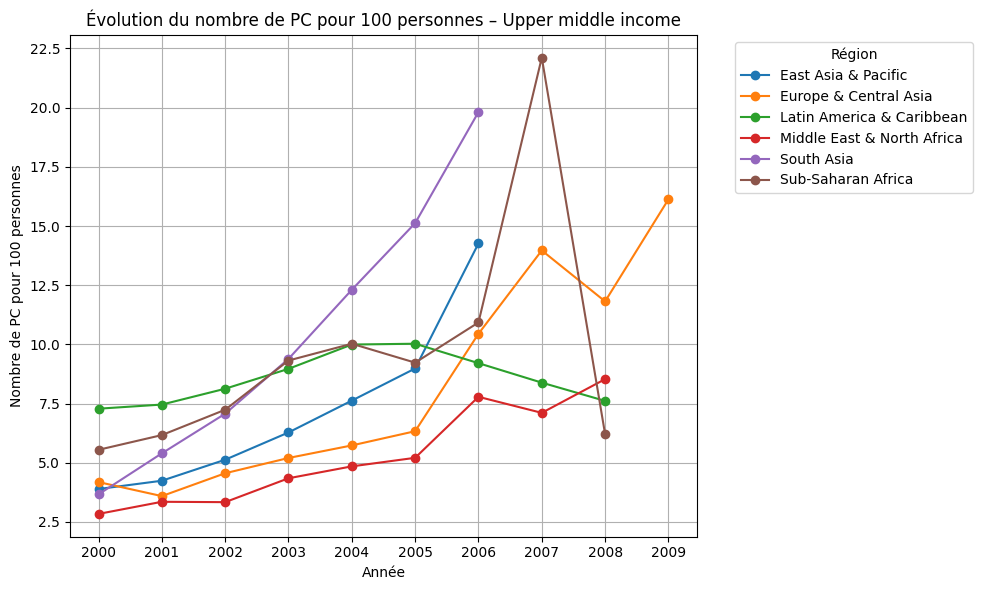

In [203]:
# Spécifie l'Income Group que tu veux afficher
selected_income_group = "Upper middle income"

# Calcul des moyennes pour ce groupe
grouped = df_pc_sub.groupby(['Income Group', 'Region'])[years_pc].mean()

# Extraire les données du groupe sélectionné
data = grouped.loc[selected_income_group]
data = data.T  # Transposer : les années deviennent l'index

# Tracer le graphique
plt.figure(figsize=(10, 6))
for region in data.columns:
    plt.plot(data.index, data[region], marker='o', label=region)

plt.title(f"Évolution du nombre de PC pour 100 personnes – {selected_income_group}")
plt.xlabel("Année")
plt.ylabel("Nombre de PC pour 100 personnes")
plt.legend(title="Région", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

On remarque une forte baisse au niveau de **Sub-Saharan Africa** en 2008 après une forte hausse en 2007. Regardons les pays qui n'ont ps de valeurs en 2007 et 2008.
On remarque également que **South Asia** n'a plus de valeur après 2006.

In [204]:
sub_saharan = df_pc_sub[df_pc_sub["Region"] == "Sub-Saharan Africa"]
missing_2007 = sub_saharan[sub_saharan["2007"].isna()][["Country Name"]]
missing_2007

Country Name
7016                      Angola
42249                    Burundi
51858               Burkina Faso
90294                   Botswana
93497   Central African Republic
109512                  Cameroon
115918                   Comoros
183181                     Gabon
192790                     Ghana
199196                    Guinea
202399             Guinea-Bissau
205602         Equatorial Guinea
282474                     Kenya
308098                   Liberia
324113                   Lesotho
352940                Madagascar
384970                Mozambique
388173                Mauritania
391376                 Mauritius
394579                    Malawi
407391                     Niger
410594                   Nigeria
481060                    Rwanda
487466                     Sudan
490669                   Senegal
500278              Sierra Leone
509887                   Somalia
516293               South Sudan
532308                 Swaziland
548323                      Chad
551526                      Togo
583556                  Tanzania
586759                    Uganda
615586              South Africa
618789                    Zambia
621992                  Zimbabwe

In [205]:
missing_2008 = sub_saharan[sub_saharan["2008"].isna()][["Country Name"]]
missing_2008

Country Name
7016                      Angola
42249                    Burundi
48655                      Benin
51858               Burkina Faso
93497   Central African Republic
109512                  Cameroon
115918                   Comoros
119121                Cabo Verde
170369                  Ethiopia
183181                     Gabon
199196                    Guinea
202399             Guinea-Bissau
205602         Equatorial Guinea
282474                     Kenya
308098                   Liberia
324113                   Lesotho
352940                Madagascar
365752                      Mali
384970                Mozambique
388173                Mauritania
391376                 Mauritius
394579                    Malawi
400985                   Namibia
407391                     Niger
410594                   Nigeria
481060                    Rwanda
487466                     Sudan
490669                   Senegal
500278              Sierra Leone
509887                   Somalia
516293               South Sudan
532308                 Swaziland
538714                Seychelles
548323                      Chad
551526                      Togo
583556                  Tanzania
586759                    Uganda
615586              South Africa
618789                    Zambia

Comme il y a beaucoup de valeur manquantes en 2007 & 2008 qui faussent l'évolution du taux, & les valeurs étant inférieur à 20%, nous allons remplir les valeurs manquantes avec les valeurs des années précédentes.

In [206]:
# 2. Trouver les pays avec une valeur manquante en 2016
mask_missing_2007 = sub_saharan["2007"].isna()

# 3. Remplacer les NaN de 2016 par la valeur de 2015
df_pc_sub.loc[mask_missing_2007.index[mask_missing_2007], "2007"] = \
    df_pc_sub.loc[mask_missing_2007.index[mask_missing_2007], "2006"]

In [207]:
# 2. Trouver les pays avec une valeur manquante en 2016
mask_missing_2008 = sub_saharan["2008"].isna()

# 3. Remplacer les NaN de 2016 par la valeur de 2015
df_pc_sub.loc[mask_missing_2008.index[mask_missing_2008], "2008"] = \
    df_pc_sub.loc[mask_missing_2008.index[mask_missing_2008], "2007"]

In [208]:
# Filtrage
south_asia = df_pc_sub[df_pc_sub["Region"] == "South Asia"]
year_columns = [col for col in south_asia.columns if col.isdigit()]

# Transformation longue
south_asia_long = south_asia.melt(
    id_vars=[col for col in south_asia.columns if col not in year_columns],
    value_vars=year_columns,
    var_name='Year',
    value_name='Taux'
)
south_asia_long['Year'] = south_asia_long['Year'].astype(int)

# Calcul du taux d'évolution moyen
south_asia_long['Taux évolution moyen'] = (
    south_asia_long
    .groupby('Country Name')['Taux']
    .pct_change(fill_method=None)
    .rolling(window=3, min_periods=1)
    .mean()
    .reset_index(drop=True)
)
south_asia_filled = (
    south_asia_long
    .groupby('Country Name', group_keys=False)
    .apply(fill_with_dynamic_taux)
    .reset_index(drop=True)
)

/tmp/ipykernel_9241/3741414245.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(fill_with_dynamic_taux)


In [209]:
# 1. Pivotage du DataFrame rempli
filled_wide = (
    south_asia_filled.pivot(index='Country Name', columns='Year', values='Taux remplis')
    .reset_index()
)

# 2. Conversion des années en str (si nécessaire)
filled_wide.columns = filled_wide.columns.astype(str)

# 3. Sélection des colonnes à conserver
years_str = [str(y) for y in years_pc]
filled_final = filled_wide[["Country Name"] + years_str]

# 4. Suppression des anciennes colonnes annuelles
df_final = df_infra_pc.drop(columns=years_str, errors='ignore')

# 5. Fusion sur "Country Name"
df_infra_pc = df_final.merge(filled_final, on="Country Name", how="left")

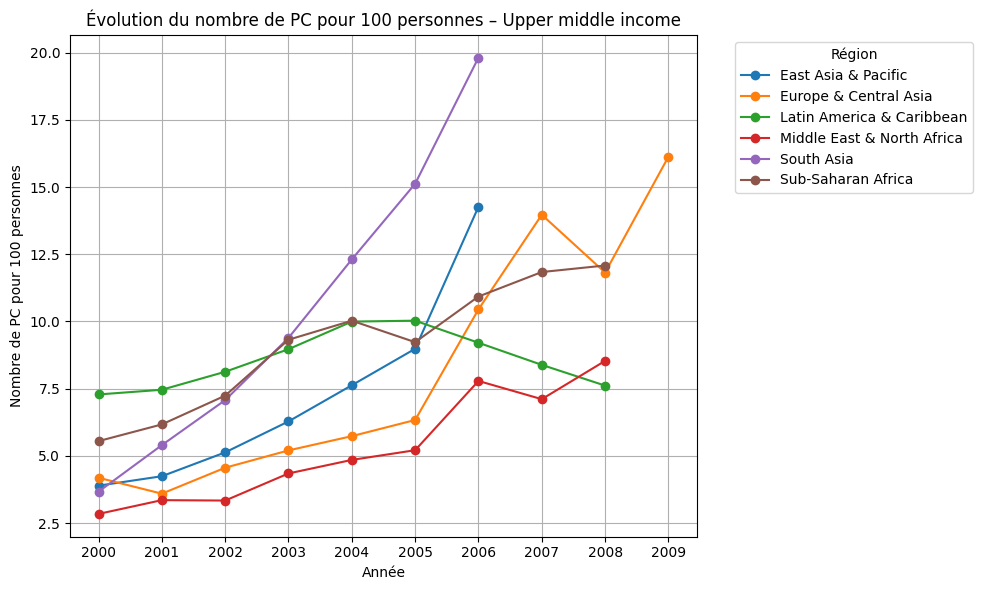

In [210]:
# Spécifie l'Income Group que tu veux afficher
selected_income_group = "Upper middle income"

# Calcul des moyennes pour ce groupe
grouped = df_pc_sub.groupby(['Income Group', 'Region'])[years_pc].mean()

# Extraire les données du groupe sélectionné
data = grouped.loc[selected_income_group]
data = data.T  # Transposer : les années deviennent l'index

# Tracer le graphique
plt.figure(figsize=(10, 6))
for region in data.columns:
    plt.plot(data.index, data[region], marker='o', label=region)

plt.title(f"Évolution du nombre de PC pour 100 personnes – {selected_income_group}")
plt.xlabel("Année")
plt.ylabel("Nombre de PC pour 100 personnes")
plt.legend(title="Région", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [211]:
upper_ea = east_asia[east_asia['Income Group'] == "Upper middle income"]
# Identifier les pays n’ayant **aucune** valeur sur la période
years_to_check = [year for year in years_passed if 2000 <= int(year) <= 2006]
no_data_countries_upper_ea = upper_ea[upper_ea[years_to_check].isna().all(axis=1)]
no_data_countries_upper_ea

Country Name               Region         Income Group  2000  2001  \
26234   American Samoa  East Asia & Pacific  Upper middle income   NaN   NaN   
449030           Palau  East Asia & Pacific  Upper middle income   NaN   NaN   

        2002  2003  2004  2005  2006  2007  2008  2009  
26234    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
449030   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN

Les pays n'ayant pas de données étant des îles, il n'est pas nécessaire de récupérer les données.

Faire un count sur bfill, pour voir combien de pays sont remplis par année.
En 2010 : tant de pays remplis
En 2005 : tant de pays remplis

deux axes : si je reviens jusqu'à x années : combien j'aurais de remplis de pays. le bfill permet de voir par ex : en 2015 , 4 pays, en 2010, 10 pays, si pays remplis en 2015. voir à partir de quelles années c'est supérieur à un certains taux.
Voir l'évolution du remplissage des pays choisis. Voir comment ils bougent.

#### Usage d'internet

In [212]:
# 1. Filtrer les données pour l'indicateur
df_infra_web = topic_infra[topic_infra['Indicator Name'] == "Internet users (per 100 people)"].copy()
df_infra_web.drop(columns = 'Country Code')

Country Name                     Region          Income Group  \
611            Aruba  Latin America & Caribbean  High income: nonOECD   
3814     Afghanistan                 South Asia            Low income   
7017          Angola         Sub-Saharan Africa   Upper middle income   
10220        Albania      Europe & Central Asia   Upper middle income   
13423        Andorra      Europe & Central Asia  High income: nonOECD   
...              ...                        ...                   ...   
609181       Vanuatu        East Asia & Pacific   Lower middle income   
612384         Samoa        East Asia & Pacific   Lower middle income   
615587  South Africa         Sub-Saharan Africa   Upper middle income   
618790        Zambia         Sub-Saharan Africa   Lower middle income   
621993      Zimbabwe         Sub-Saharan Africa            Low income   

                                 Latest population census  \
611                                                  2010   
3814                                                 1979   
7017                                                 1970   
10220                                                2011   
13423   2011. Population figures compiled from adminis...   
...                                                   ...   
609181                                               2009   
612384                                               2011   
615587                                               2011   
618790                                               2010   
621993                                               2012   

                         Indicator Name                           Topic  \
611     Internet users (per 100 people)  Infrastructure: Communications   
3814    Internet users (per 100 people)  Infrastructure: Communications   
7017    Internet users (per 100 people)  Infrastructure: Communications   
10220   Internet users (per 100 people)  Infrastructure: Communications   
13423   Internet users (per 100 people)  Infrastructure: Communications   
...                                 ...                             ...   
609181  Internet users (per 100 people)  Infrastructure: Communications   
612384  Internet users (per 100 people)  Infrastructure: Communications   
615587  Internet users (per 100 people)  Infrastructure: Communications   
618790  Internet users (per 100 people)  Infrastructure: Communications   
621993  Internet users (per 100 people)  Infrastructure: Communications   

        Indicator Code  1970  1971  1972  ...       2007       2008   2009  \
611     IT.NET.USER.P2   NaN   NaN   NaN  ...  30.900000  52.000000  58.00   
3814    IT.NET.USER.P2   NaN   NaN   NaN  ...   1.900000   1.840000   3.55   
7017    IT.NET.USER.P2   NaN   NaN   NaN  ...   1.700000   1.900000   2.30   
10220   IT.NET.USER.P2   NaN   NaN   NaN  ...  15.036115  23.860000  41.20   
13423   IT.NET.USER.P2   NaN   NaN   NaN  ...  70.870000  70.040000  78.53   
...                ...   ...   ...   ...  ...        ...        ...    ...   
609181  IT.NET.USER.P2   NaN   NaN   NaN  ...   6.800000   7.269120   7.50   
612384  IT.NET.USER.P2   NaN   NaN   NaN  ...   4.749983   5.031615   6.00   
615587  IT.NET.USER.P2   NaN   NaN   NaN  ...   8.065375   8.430000  10.00   
618790  IT.NET.USER.P2   NaN   NaN   NaN  ...   4.870000   5.550000   6.31   
621993  IT.NET.USER.P2   NaN   NaN   NaN  ...   3.000000   3.500000   4.00   

        2010   2011       2012  2013      2014       2015       2016  
611     62.0  69.00  74.000000  78.9  83.78000  88.661227  93.542454  
3814     4.0   5.00   5.454545   5.9   7.00000   8.260000  10.595726  
7017     2.8   3.10   6.500000   8.9  10.20000  12.400000  13.000000  
10220   45.0  49.00  54.655959  57.2  60.10000  63.252933  66.363445  
13423   81.0  81.00  86.434425  94.0  95.90000  96.910000  97.930637  
...      ...    ...        ...   ...       ...        ...        ...  
609181   8.0   9.20  10.598000  11.3  18.80000  22.351405  24.0

In [213]:
df_bfilled_infra_web = df_bfilled_infra[df_bfilled_infra['Indicator Name'] == "Internet users (per 100 people)"]
df_bfilled_infra_web.count()

Country Code                195
Country Name                195
Region                      195
Income Group                195
Latest population census    195
Indicator Name              195
Topic                       195
Indicator Code              195
1970                        190
1971                        190
1972                        190
1973                        190
1974                        190
1975                        190
1976                        190
1977                        190
1978                        190
1979                        190
1980                        190
1981                        190
1982                        190
1983                        190
1984                        190
1985                        190
1986                        190
1987                        190
1988                        190
1989                        190
1990                        190
1991                        187
1992                        187
1993    

In [214]:
# 1. Sélection des années >= 2020
years_pc = [year for year in years_passed if 2000 <= int(year) <= 2009]


# 4. Calculer le taux de remplissage (valeurs non manquantes) par Topic
taux_par_pc = df_infra_pc.groupby('Income Group')[years_pc].apply(lambda x: x.notna().mean().mean() * 100).round(2)

# 5. Transformer en DataFrame pour affichage clair
df_taux = taux_par_pc.reset_index()
df_taux.columns = ['Income Group', 'Taux de remplissage (%)']
df_taux

Income Group  Taux de remplissage (%)
0     High income: OECD                     0.00
1  High income: nonOECD                     0.00
2            Low income                     5.16
3   Lower middle income                     7.91
4   Upper middle income                     1.54

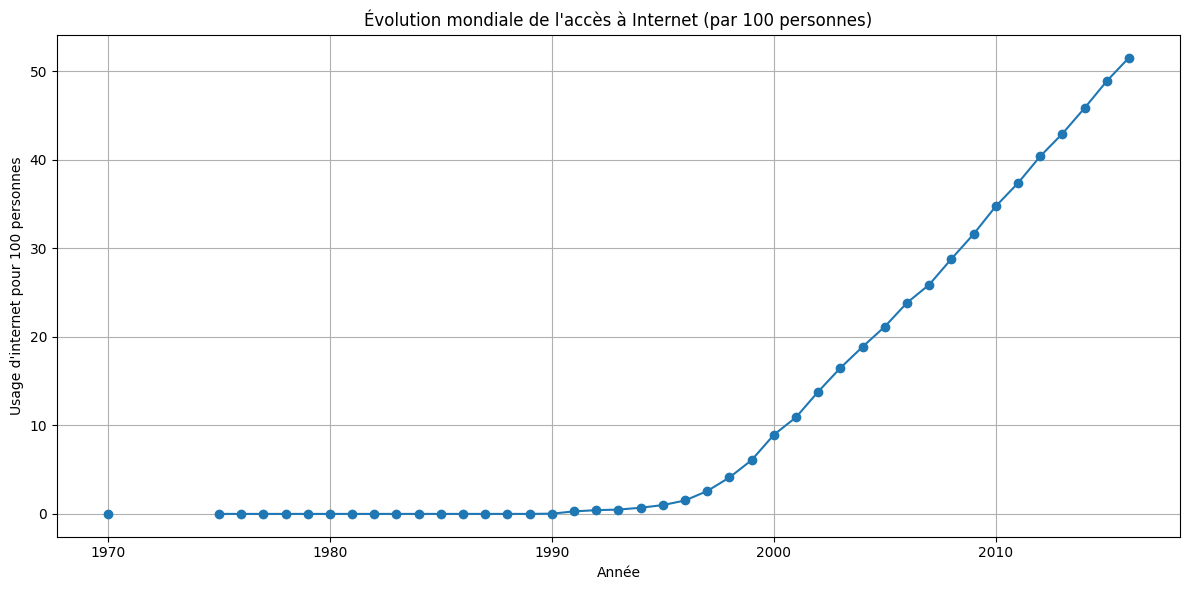

In [215]:
# 1. Création d'un nouveau DF avec melt.
df_long = df_infra_web.melt(
    id_vars=['Country Name'],
    value_vars=years_passed,
    var_name='Year',
    value_name='Int_per_100_people'
)
### La fonction melt() de pandas permet de transformer un DataFrame "large" en un DataFrame "long"
###c’est-à-dire de passer d’un format avec une colonne par année à un format où les années deviennent des lignes.

# 2. Convertir "Year" en entier
df_long['Year'] = df_long['Year'].astype(int)

# 3. Moyenne par année pour  n'avoir qu'une seule courbe
df_yearly_avg = df_long.groupby('Year')['Int_per_100_people'].mean().reset_index()

# 4. Tracer
plt.figure(figsize=(12, 6))
plt.plot(df_yearly_avg['Year'], df_yearly_avg['Int_per_100_people'], marker='o')
plt.title("Évolution mondiale de l'accès à Internet (par 100 personnes)")
plt.xlabel("Année")
plt.ylabel("Usage d'internet pour 100 personnes")
plt.grid(True)
plt.tight_layout()
plt.show()

In [216]:
# 1. Filtrer les données pour l'indicateur
df_infra_web = topic_infra[topic_infra['Indicator Name'] == "Internet users (per 100 people)"].copy()

# 2. Création d'un nouveau df avec bfill
df_bfilled_web = df_infra_web.bfill(axis=1)
df_bfilled_web.count()

Country Code                195
Country Name                195
Region                      195
Income Group                195
Latest population census    195
Indicator Name              195
Topic                       195
Indicator Code              195
1970                        190
1971                        190
1972                        190
1973                        190
1974                        190
1975                        190
1976                        190
1977                        190
1978                        190
1979                        190
1980                        190
1981                        190
1982                        190
1983                        190
1984                        190
1985                        190
1986                        190
1987                        190
1988                        190
1989                        190
1990                        190
1991                        187
1992                        187
1993    

In [217]:

df_infra_web[['First valid year', 'Last valid year']] = df_infra_web.apply(get_first_last_years, axis=1)
df_infra_web["Total valid years"] = df_infra_web[years_passed].notna().sum(axis=1)

df_infra_web[["Country Name", "First valid year", "Last valid year", "Total valid years"]].sort_values(by='Total valid years', ascending=False).head(10)

Country Name First valid year Last valid year  \
554730              Thailand             1970            2016   
551527                  Togo             1970            2016   
356144              Maldives             1970            2016   
42250                Burundi             1970            2016   
541918  Syrian Arab Republic             1970            2016   
212009               Grenada             1970            2016   
90295               Botswana             1970            2016   
423407                 Nepal             1989            2016   
420204                Norway             1990            2016   
417001           Netherlands             1990            2016   

        Total valid years  
554730                 43  
551527                 43  
356144                 43  
42250                  43  
541918                 43  
212009                 43  
90295                  40  
423407                 28  
420204                 27  
417001                 27

Au vu du remplissage des années, on peut se concentrer sur l'études des années **2004** à **2016**

In [218]:
# 1. Sélection des années >= 2020
years_web = [year for year in years_passed if 2004 <= int(year) <= 2016]


# 4. Calculer le taux de remplissage (valeurs non manquantes) par Topic
taux_par_web = df_infra_web.groupby('Income Group')[years_web].apply(lambda x: x.notna().mean().mean() * 100).round(2)

# 5. Transformer en DataFrame pour affichage clair
df_taux = taux_par_web.reset_index()
df_taux.columns = ['Income Group', 'Taux de remplissage (%)']
df_taux

Income Group  Taux de remplissage (%)
0     High income: OECD                    99.74
1  High income: nonOECD                    84.82
2            Low income                    98.26
3   Lower middle income                    95.89
4   Upper middle income                    95.12

on prend 2015 & on rempli 2009 avec. 

Tout à la fin, regarder pour tous les topics, quels pays sont remplis sur 0 sur 4 indicateurs.

bfill : regarder que la colonne 1970. filtre par ça . (pour les topics où y'a bcp d'indicateurs - on en prend 4/5). Faire le bfill & regarder toutes les colonnes. Evaluer lequel est le mieux rempli ( dernières années de remplissage).

Repartir du tableau de base, on prend les indicateurs qu'on veut. On regarde le nb d'indicateurs. ( Garder ceux qui ont 2/3 ou 4). Là on étudie plus précisement les données.

In [219]:
# Supprimer les colonnes inutiles
df_web_sub = df_infra_web[["Country Name", "Region", "Income Group"]+years_web]


# 1. Vérifier les données manquantes par région
region_missing = df_web_sub.groupby('Region')[years_web].apply(lambda x: x.notna().sum())

# 2. Vérifier les données manquantes par income group
income_missing = df_web_sub.groupby('Income Group')[years_web].apply(lambda x: x.notna().sum())
income_missing

2004  2005  2006  2007  2008  2009  2010  2011  2012  \
Income Group                                                                 
High income: OECD       29    30    30    30    30    30    30    30    30   
High income: nonOECD    31    32    32    32    32    32    31    32    31   
Low income              30    29    28    31    31    31    30    31    31   
Lower middle income     39    40    39    42    41    41    42    42    42   
Upper middle income     48    48    49    50    50    49    50    50    49   

                      2013  2014  2015  2016  
Income Group                                  
High income: OECD       30    30    30    30  
High income: nonOECD    31    31    31    30  
Low income              31    31    31    31  
Lower middle income     42    42    42    42  
Upper middle income     50    50    50    50

**Regardons maintenant les évolutions du taux par 'Income Group'**

In [220]:
# 1. Supprimer les colonnes inutiles
df_web_sub = df_infra_web[["Country Name", "Region", "Income Group"] + years_web].copy()

# 2. Conversion des années en float pour éviter les erreurs sur des valeurs non numériques
for year in years_web:
    df_pc_sub[year] = pd.to_numeric(df_web_sub[year], errors='coerce')

# 3. Moyenne par Income Group et par année
income_group_evolution = df_web_sub.groupby("Income Group")[years_web].mean()

# 4. Transposer pour avoir les années en index (pour l'affichage)
income_group_evolution_T = income_group_evolution.T
income_group_evolution_T.index.name = "Year"
income_group_evolution_T

Income Group  High income: OECD  High income: nonOECD  Low income  \
Year                                                                
2004                  54.030489             32.757050    0.832950   
2005                  57.906291             35.824596    1.085912   
2006                  61.871843             40.084877    1.444626   
2007                  66.115546             45.088060    1.728102   
2008                  69.469000             49.896834    2.246696   
2009                  72.278333             54.116626    2.802384   
2010                  74.974000             58.356639    3.701333   
2011                  76.622575             62.373093    4.210770   
2012                  78.302014             67.400032    5.192807   
2013                  80.101765             71.490503    6.423811   
2014                  81.386639             74.550521    8.170915   
2015                  82.730916             76.986402   10.734047   
2016                  84.232888             79.460383   12.697157   

Income Group  Lower middle income  Upper middle income  
Year                                                    
2004                     3.596377            12.094681  
2005                     4.854015            13.761491  
2006                     6.117385            16.473580  
2007                     7.573610            19.348849  
2008                     9.319179            22.790248  
2009                    11.879512            26.053673  
2010                    15.269286            30.405600  
2011                    17.671173            34.398443  
2012                    20.568278            38.878894  
2013                    23.409344            42.050914  
2014                    27.106442            45.850928  
2015                    30.934397            49.950447  
2016                    33.713536            53.415310

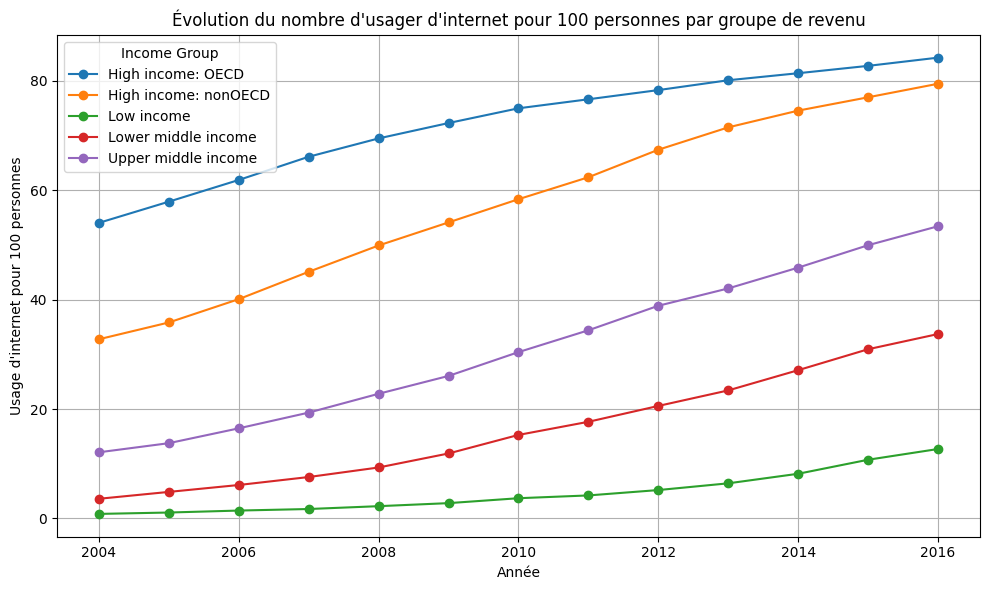

In [221]:
income_group_evolution_T.plot(figsize=(10,6), marker='o')
plt.title("Évolution du nombre d'usager d'internet pour 100 personnes par groupe de revenu")
plt.ylabel("Usage d'internet pour 100 personnes")
plt.xlabel("Année")
plt.grid(True)
plt.legend(title="Income Group")
plt.tight_layout()
plt.show()

In [222]:
# Créons un masque des lignes où toutes les années sont manquantes
missing_mask = df_infra_web[years_web].isnull().all(axis=1)


# Remettons les résultats dans un DataFrame lisible
missing_countries_df = (
    df_infra_web[missing_mask][["Country Name", "Region", "Income Group"]]
    .sort_values(by=["Income Group", "Region", "Country Name"])
    .reset_index(drop=True)
)
missing_countries_df

Country Name                     Region          Income Group
0   Northern Mariana Islands        East Asia & Pacific  High income: nonOECD
1                Isle of Man      Europe & Central Asia  High income: nonOECD
2  Sint Maarten (Dutch part)  Latin America & Caribbean  High income: nonOECD
3   St. Martin (French part)  Latin America & Caribbean  High income: nonOECD
4   Turks and Caicos Islands  Latin America & Caribbean  High income: nonOECD
5                South Sudan         Sub-Saharan Africa   Lower middle income
6             American Samoa        East Asia & Pacific   Upper middle income
7                      Nauru                        NaN                   NaN

In [223]:
# 1. Liste des pays avec toutes les années manquantes
missing_countries = df_infra_web.loc[missing_mask, "Country Name"].dropna().unique()

# 2. Filtrer ceux qui ont au moins une année manquante
partial_missing_mask = df_infra_web[years_web].isnull().any(axis=1)
partial_missing_data = df_infra_web.loc[partial_missing_mask, ["Country Name", "Region", "Income Group"] + years_web].copy()

# 3. Ajouter les années manquantes pour chaque ligne
partial_missing_data["Années manquantes"] = partial_missing_data[years_web]\
    .apply(lambda row: [year for year in years_web if pd.isna(row[year])], axis=1)

# 4. Nettoyer : enlever ceux qui ont TOUTES les années nulles
partial_missing_data_cleaned = partial_missing_data[
    ~partial_missing_data["Country Name"].isin(missing_countries)
].reset_index(drop=True)

# 5. Réorganiser les colonnes
cols = ["Country Name", "Region", "Income Group", "Années manquantes"]
partial_missing_data_cleaned = partial_missing_data_cleaned[cols]

grouped = partial_missing_data_cleaned.groupby("Income Group").apply(
    lambda grp: grp[["Country Name", "Region", "Années manquantes"]].reset_index(drop=True)
)
grouped



/tmp/ipykernel_9241/3356056001.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = partial_missing_data_cleaned.groupby("Income Group").apply(


Country Name                      Region  \
Income Group                                                         
High income: OECD    0       Australia         East Asia & Pacific   
High income: nonOECD 0  Cayman Islands   Latin America & Caribbean   
                     1   New Caledonia         East Asia & Pacific   
                     2      San Marino       Europe & Central Asia   
Low income           0         Eritrea          Sub-Saharan Africa   
                     1         Liberia          Sub-Saharan Africa   
                     2          Rwanda          Sub-Saharan Africa   
                     3         Somalia          Sub-Saharan Africa   
Lower middle income  0          Guyana   Latin America & Caribbean   
                     1        Mongolia         East Asia & Pacific   
                     2           Sudan          Sub-Saharan Africa   
                     3     Timor-Leste         East Asia & Pacific   
Upper middle income  0      Azerbaijan       Europe & Central Asia   
                     1         Belarus       Europe & Central Asia   
                     2           Libya  Middle East & North Africa   
                     3           Palau         East Asia & Pacific   
                     4      Seychelles          Sub-Saharan Africa   
                     5          Tuvalu         East Asia & Pacific   

                                                        Années manquantes  
Income Group                                                               
High income: OECD    0                                             [2004]  
High income: nonOECD 0                                             [2004]  
                     1                                             [2016]  
                     2               [2010, 2012, 2013, 2014, 2015, 2016]  
Low income           0                                 [2004, 2005, 2006]  
                     1                                       [2005, 2006]  
                     2                                             [2006]  
                     3                                             [2010]  
Lower middle income  0                                 [2004, 2005, 2006]  
                     1                                 [2004, 2005, 2006]  
                     2                                 [2006, 2008, 2009]  
                     3                                             [2004]  
Upper middle income  0                                             [2004]  
                     1                                       [2004, 2005]  
                     2                                             [2012]  
                     3  [2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...  
                     4                                             [2009]  
                     5                                 [2004, 2005, 2006]

**Saint Martin** étant un petit pays (< 35000 habitants) & **Palau** étant une île, il n'est pas la peine de récuperer les valeurs pour ces deux pays.

In [224]:
country_to_exclude = ["San Marino", "Palau"]
partial_missing_filtered = partial_missing_data_cleaned[partial_missing_data_cleaned["Country Name"].isin(country_to_exclude)]

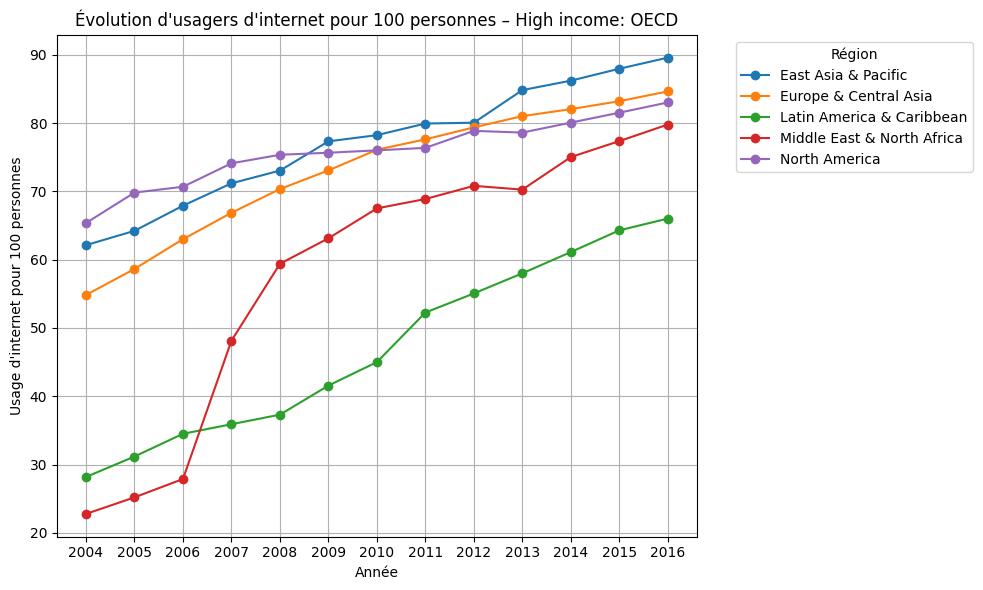

In [225]:
# Spécifie l'Income Group 
selected_income_group = "High income: OECD"

# Calcul des moyennes pour ce groupe
grouped = df_web_sub.groupby(['Income Group', 'Region'])[years_web].mean()

# Extraire les données du groupe sélectionné
data = grouped.loc[selected_income_group]
data = data.T  # Transposer : les années deviennent l'index

# Tracer le graphique
plt.figure(figsize=(10, 6))
for region in data.columns:
    plt.plot(data.index, data[region], marker='o', label=region)

plt.title(f"Évolution d'usagers d'internet pour 100 personnes – {selected_income_group}")
plt.xlabel("Année")
plt.ylabel("Usage d'internet pour 100 personnes")
plt.legend(title="Région", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

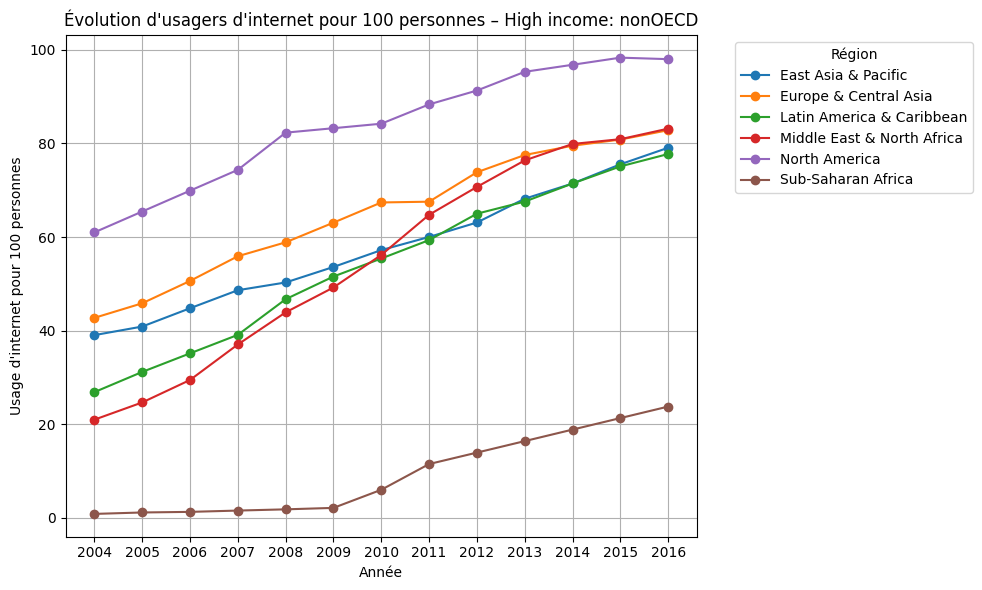

In [226]:
# Spécifie l'Income Group
selected_income_group = "High income: nonOECD"

# Calcul des moyennes pour ce groupe
grouped = df_web_sub.groupby(['Income Group', 'Region'])[years_web].mean()

# Extraire les données du groupe sélectionné
data = grouped.loc[selected_income_group]
data = data.T  # Transposer : les années deviennent l'index

# Tracer le graphique
plt.figure(figsize=(10, 6))
for region in data.columns:
    plt.plot(data.index, data[region], marker='o', label=region)

plt.title(f"Évolution d'usagers d'internet pour 100 personnes – {selected_income_group}")
plt.xlabel("Année")
plt.ylabel("Usage d'internet pour 100 personnes")
plt.legend(title="Région", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

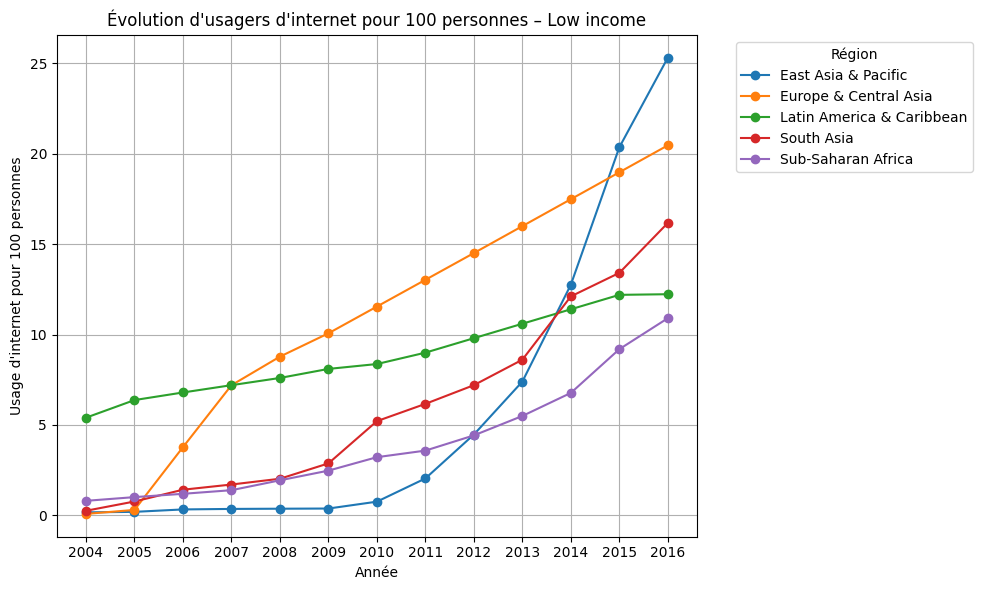

In [227]:
# Spécifie l'Income Group 
selected_income_group = "Low income"

# Calcul des moyennes pour ce groupe
grouped = df_web_sub.groupby(['Income Group', 'Region'])[years_web].mean()

# Extraire les données du groupe sélectionné
data = grouped.loc[selected_income_group]
data = data.T  # Transposer : les années deviennent l'index

# Tracer le graphique
plt.figure(figsize=(10, 6))
for region in data.columns:
    plt.plot(data.index, data[region], marker='o', label=region)

plt.title(f"Évolution d'usagers d'internet pour 100 personnes – {selected_income_group}")
plt.xlabel("Année")
plt.ylabel("Usage d'internet pour 100 personnes")
plt.legend(title="Région", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Les taux étant très faibles, moins de 5%, il paraît peu utile de récupérer les données manquantes.

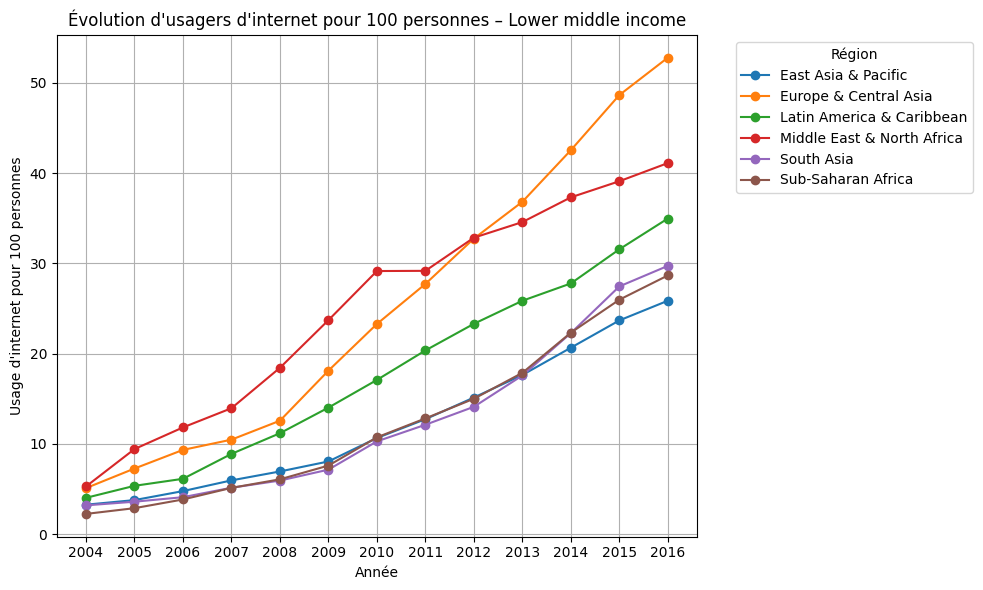

In [228]:
# Spécifie l'Income Group 
selected_income_group = "Lower middle income"

# Calcul des moyennes pour ce groupe
grouped = df_web_sub.groupby(['Income Group', 'Region'])[years_web].mean()

# Extraire les données du groupe sélectionné
data = grouped.loc[selected_income_group]
data = data.T  # Transposer : les années deviennent l'index

# Tracer le graphique
plt.figure(figsize=(10, 6))
for region in data.columns:
    plt.plot(data.index, data[region], marker='o', label=region)

plt.title(f"Évolution d'usagers d'internet pour 100 personnes – {selected_income_group}")
plt.xlabel("Année")
plt.ylabel("Usage d'internet pour 100 personnes")
plt.legend(title="Région", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Les données paraissent en majorité complète, et pour celles manquantes, le taux étant inférieur à 5%, il paraît peu utile de récupérer les données.

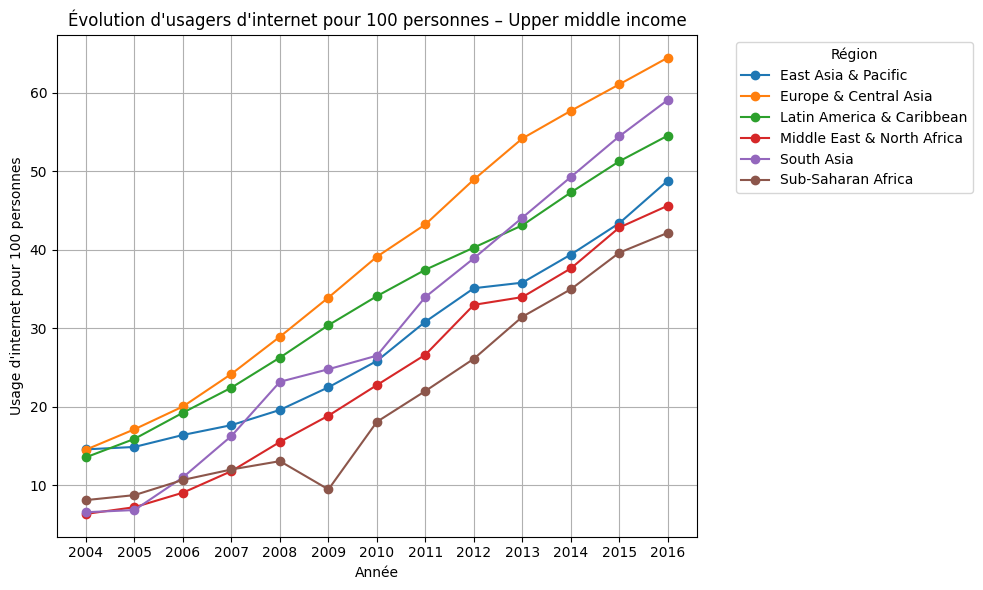

In [229]:
# Spécifie l'Income Group 
selected_income_group = "Upper middle income"

# Calcul des moyennes pour ce groupe
grouped = df_web_sub.groupby(['Income Group', 'Region'])[years_web].mean()

# Extraire les données du groupe sélectionné
data = grouped.loc[selected_income_group]
data = data.T  # Transposer : les années deviennent l'index

# Tracer le graphique
plt.figure(figsize=(10, 6))
for region in data.columns:
    plt.plot(data.index, data[region], marker='o', label=region)

plt.title(f"Évolution d'usagers d'internet pour 100 personnes – {selected_income_group}")
plt.xlabel("Année")
plt.ylabel("Usage d'internet pour 100 personnes")
plt.legend(title="Région", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

L'évolution de **South Asia** et **East Asia & Pacific** semblent linéaire.

Les pays n'ayant pas de données étant des îles, il n'est pas nécessaire de récupérer les données.

In [230]:
# 1. Filtrer pour ne garder que les indicateurs que l'on souhaite
df_subset = topic_infra[topic_infra['Indicator Name'].isin(indicators_infra_list)]

# 2. Calcul du taux de remplissage (% de pays non-NaN) par indicateur et par année
taux_filled_by_year = df_subset.groupby('Indicator Name')[years_passed].apply(
    lambda x: x.notna().mean() * 100
).round(2)

# 3. Résultat : un DataFrame avec les années en colonnes et un % par indicateur
taux_filled_by_year.head()

1970  1971  1972  1973  1974  1975  1976  \
Indicator Name                                                                  
Internet users (per 100 people)      3.59   0.0   0.0   0.0   0.0  3.59  3.59   
Personal computers (per 100 people)  0.51   0.0   0.0   0.0   0.0  0.51  0.51   

                                     1977  1978  1979  ...   2007   2008  \
Indicator Name                                         ...                 
Internet users (per 100 people)      3.59  3.59  3.59  ...  95.38  94.87   
Personal computers (per 100 people)  0.51  0.51  0.51  ...  22.56  13.33   

                                      2009   2010   2011   2012   2013   2014  \
Indicator Name                                                                  
Internet users (per 100 people)      94.36  94.36  95.38  94.36  94.36  94.36   
Personal computers (per 100 people)   1.54   0.00   0.00   0.00   0.00   0.00   

                                      2015   2016  
Indicator Name                                     
Internet users (per 100 people)      94.36  94.36  
Personal computers (per 100 people)   0.00   0.00  

[2 rows x 47 columns]

Faire un count sur bfill, pour voir combien de pays sont remplis par année.
En 2010 : tant de pays remplis
En 2005 : tant de pays remplis

deux axes : si je reviens jusqu'à x années : combien j'aurais de remplis de pays. le bfill permet de voir par ex : en 2015 , 4 pays, en 2010, 10 pays, si pays remplis en 2015. voir à partir de quelles années c'est supérieur à un certains taux.
Voir l'évolution du remplissage des pays choisis. Voir comment ils bougent.

### Comparaison des deux indicateurs

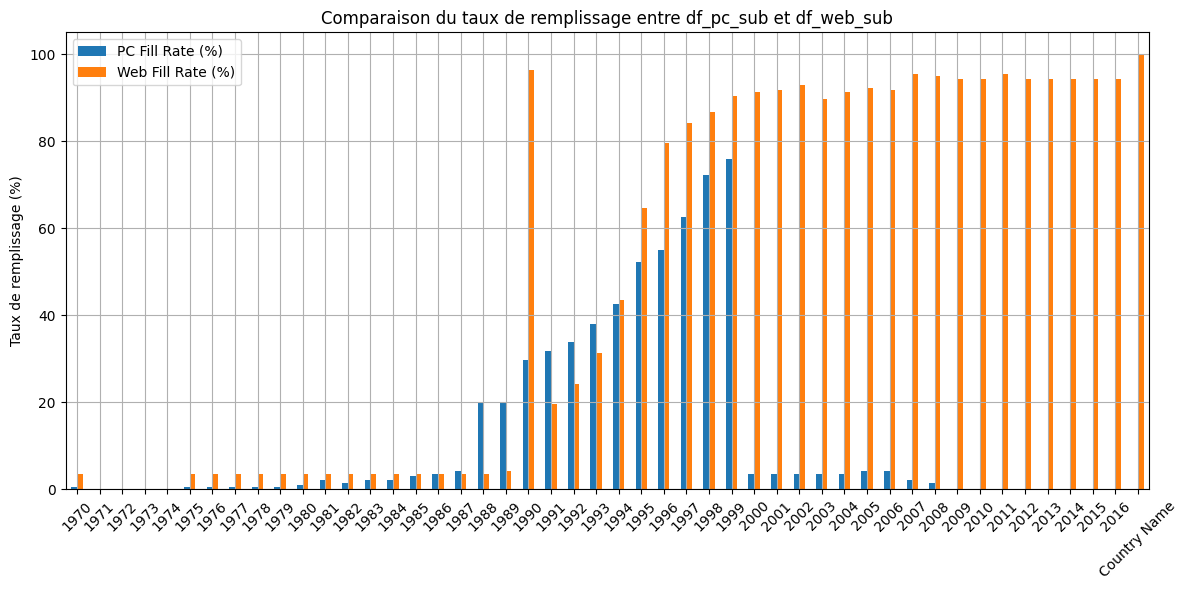

In [231]:
cols_to_drop_pc = ['Country Name', 'Country Code', 'Region','Income Group', 'Topic', 'Indicator Name', 'Indicator Code', 'Latest population census', 'First valid year', 'Last valid year', 'Total valid years']
df_infra_pc_comparison = df_infra_pc.copy()
df_infra_pc_comparison= df_infra_pc_comparison.drop(columns = cols_to_drop_pc)
cols_to_drop_web = ['Country Code', 'Income Group', 'Region','Topic', 'Indicator Name', 'Indicator Code', 'Latest population census', 'First valid year', 'Last valid year', 'Total valid years']

df_infra_web_comparison = df_infra_web.copy()
df_infra_web_comparison= df_infra_web_comparison.drop(columns = cols_to_drop_web)                       
fill_rate_pc = df_infra_pc_comparison.notna().mean() * 100
fill_rate_web = df_infra_web_comparison.notna().mean() * 100

fill_rate_comparison = pd.DataFrame({
    'PC Fill Rate (%)': fill_rate_pc,
    'Web Fill Rate (%)': fill_rate_web
})


fill_rate_comparison[['PC Fill Rate (%)', 'Web Fill Rate (%)']].plot(kind='bar', figsize=(12, 6))
plt.ylabel('Taux de remplissage (%)')
plt.title('Comparaison du taux de remplissage entre df_pc_sub et df_web_sub')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Vu le graphique, on peut conclure que le nombre d'usager d'Internet est mieux rempli, et plus intéressant que le nombre de personne possédant un PC. ( comme nous l'avons vu précédement, l'année 1990 ne doit pas être prise en compte)

Mettons à jour le DF de base avec l'indicateur choisi

In [232]:
indicator_to_keep = ['Internet users (per 100 people)']
df_topic_infra = topic_infra[
    topic_infra['Indicator Name'].isin(indicator_to_keep)
]

### Topic Economique

In [233]:
topic_economic = df_filtered_topics[df_filtered_topics['Topic'] == 'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita']
indicators_economic_list = topic_economic['Indicator Name'].unique().tolist()
indicators_economic_list

['GNI per capita, Atlas method (current US$)']

In [234]:
# 1. Filtrer les données pour l'indicateur
df_topic_eco = df_filtered_topics[df_filtered_topics['Topic'] == 'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita'].copy()
df_topic_eco.drop(columns = 'Country Code').head(5)

Country Name                     Region          Income Group  \
1621         Aruba  Latin America & Caribbean  High income: nonOECD   
4824   Afghanistan                 South Asia            Low income   
8027        Angola         Sub-Saharan Africa   Upper middle income   
11230      Albania      Europe & Central Asia   Upper middle income   
14433      Andorra      Europe & Central Asia  High income: nonOECD   

                                Latest population census  \
1621                                                2010   
4824                                                1979   
8027                                                1970   
11230                                               2011   
14433  2011. Population figures compiled from adminis...   

                                   Indicator Name  \
1621   GNI per capita, Atlas method (current US$)   
4824   GNI per capita, Atlas method (current US$)   
8027   GNI per capita, Atlas method (current US$)   
11230  GNI per capita, Atlas method (current US$)   
14433  GNI per capita, Atlas method (current US$)   

                                                   Topic  Indicator Code  \
1621   Economic Policy & Debt: National accounts: Atl...  NY.GNP.PCAP.CD   
4824   Economic Policy & Debt: National accounts: Atl...  NY.GNP.PCAP.CD   
8027   Economic Policy & Debt: National accounts: Atl...  NY.GNP.PCAP.CD   
11230  Economic Policy & Debt: National accounts: Atl...  NY.GNP.PCAP.CD   
14433  Economic Policy & Debt: National accounts: Atl...  NY.GNP.PCAP.CD   

       1970  1971  1972  ...    2007    2008    2009    2010    2011    2012  \
1621    NaN   NaN   NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
4824    NaN   NaN   NaN  ...   330.0   360.0   460.0   500.0   560.0   670.0   
8027    NaN   NaN   NaN  ...  2160.0  2760.0  3190.0  3240.0  3390.0  3820.0   
11230   NaN   NaN   NaN  ...  3480.0  3950.0  4230.0  4360.0  4410.0  4360.0   
14433   NaN   NaN   NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   

         2013    2014    2015    2016  
1621      NaN     NaN     NaN     NaN  
4824    670.0   630.0   590.0   570.0  
8027   4350.0  4470.0  4040.0  3450.0  
11230  4480.0  4440.0  4290.0  4180.0  
14433     NaN     NaN     NaN     NaN  

[5 rows x 54 columns]

In [235]:
# 2. Création d'un nouveau df avec bfill
df_bfilled_eco = df_bfilled[df_bfilled['Indicator Name'].isin(indicators_economic_list)]
df_bfilled_eco.count()

Country Code                195
Country Name                195
Region                      195
Income Group                195
Latest population census    195
Indicator Name              195
Topic                       195
Indicator Code              195
1970                        182
1971                        182
1972                        182
1973                        182
1974                        182
1975                        182
1976                        182
1977                        182
1978                        182
1979                        182
1980                        182
1981                        182
1982                        182
1983                        182
1984                        182
1985                        182
1986                        182
1987                        182
1988                        182
1989                        182
1990                        182
1991                        182
1992                        182
1993    

Au vu du bfill, on peut regarder les données allant de **2000** à **2016**

In [236]:
# 1. Sélection des années >= 2020
years_eco = [year for year in years_passed if 2000 <= int(year) <= 2016]


# 4. Calculer le taux de remplissage (valeurs non manquantes) par Topic
taux_par_eco = df_topic_eco.groupby('Income Group')[years_eco].apply(lambda x: x.notna().mean().mean() * 100).round(2)

# 5. Transformer en DataFrame pour affichage clair
df_taux = taux_par_eco.reset_index()
df_taux.columns = ['Income Group', 'Taux de remplissage (%)']
df_taux

Income Group  Taux de remplissage (%)
0     High income: OECD                   100.00
1  High income: nonOECD                    63.12
2            Low income                    94.69
3   Lower middle income                    94.94
4   Upper middle income                    95.59

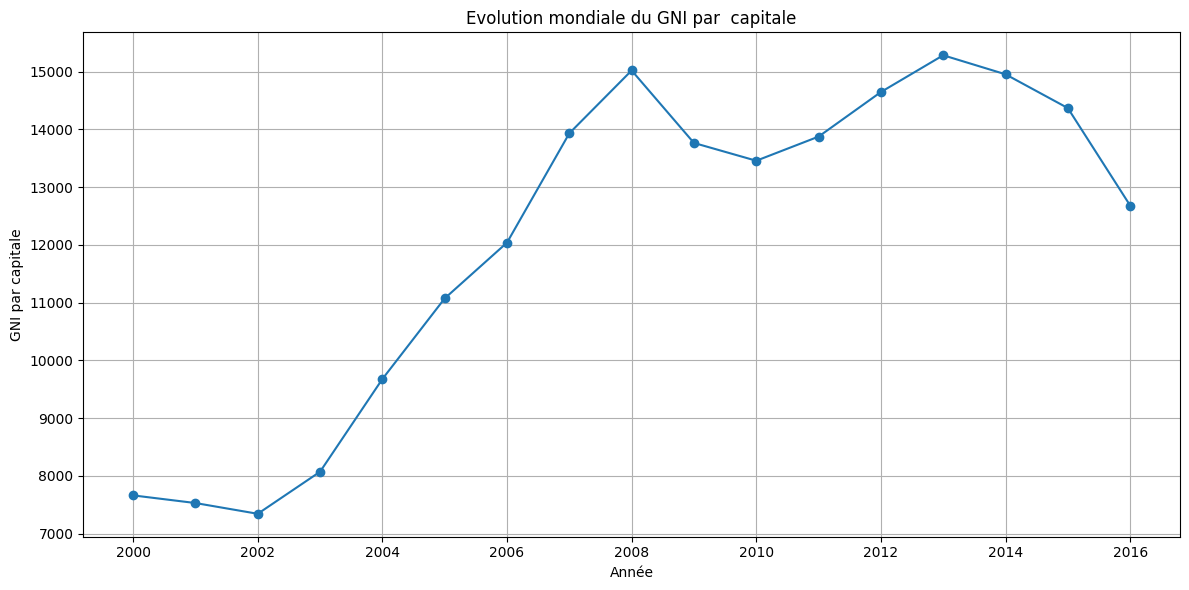

In [237]:
# 1. Création d'un nouveau DF avec melt.
df_long = df_topic_eco.melt(
    id_vars=['Country Name'],
    value_vars=years_eco,
    var_name='Year',
    value_name='GNI_per_capita'
)
### La fonction melt() de pandas permet de transformer un DataFrame "large" en un DataFrame "long"
###c’est-à-dire de passer d’un format avec une colonne par année à un format où les années deviennent des lignes.

# 2. Convertir "Year" en entier
df_long['Year'] = df_long['Year'].astype(int)

# 3. Moyenne par année pour  n'avoir qu'une seule courbe
df_yearly_avg = df_long.groupby('Year')['GNI_per_capita'].mean().reset_index()

# 4. Tracer
plt.figure(figsize=(12, 6))
plt.plot(df_yearly_avg['Year'], df_yearly_avg['GNI_per_capita'], marker='o')
plt.title("Evolution mondiale du GNI par  capitale")
plt.xlabel("Année")
plt.ylabel("GNI par capitale")
plt.grid(True)
plt.tight_layout()
plt.show()

In [238]:

df_topic_eco[['First valid year', 'Last valid year']] = df_topic_eco.apply(get_first_last_years, axis=1)
df_topic_eco["Total valid years"] = df_topic_eco[years_eco].notna().sum(axis=1)

df_topic_eco[["Country Name", "First valid year", "Last valid year", "Total valid years"]].sort_values(by='Total valid years', ascending=False).head(10)

Country Name First valid year Last valid year  \
623003             Zimbabwe             1970            2016   
619800               Zambia             1970            2016   
571755  Trinidad and Tobago             1970            2016   
574958              Tunisia             1970            2016   
578161               Turkey             1970            2016   
584567             Tanzania             1990            2016   
587770               Uganda             1984            2016   
590973              Ukraine             1989            2016   
594176              Uruguay             1970            2016   
33651             Australia             1970            2016   

        Total valid years  
623003                 17  
619800                 17  
571755                 17  
574958                 17  
578161                 17  
584567                 17  
587770                 17  
590973                 17  
594176                 17  
33651                  17

on prend 2015 & on rempli 2009 avec. 

Tout à la fin, regarder pour tous les topics, quels pays sont remplis sur 0 sur 4 indicateurs.

bfill : regarder que la colonne 1970. filtre par ça . (pour les topics où y'a bcp d'indicateurs - on en prend 4/5). Faire le bfill & regarder toutes les colonnes. Evaluer lequel est le mieux rempli ( dernières années de remplissage).

Repartir du tableau de base, on prend les indicateurs qu'on veut. On regarde le nb d'indicateurs. ( Garder ceux qui ont 2/3 ou 4). Là on étudie plus précisement les données.

In [239]:
# Supprimer les colonnes inutiles
df_eco_sub = df_topic_eco[["Country Name", "Region", "Income Group"]+years_eco].copy()


# 1. Vérifier les données manquantes par région
region_missing = df_eco_sub.groupby('Region')[years_eco].apply(lambda x: x.notna().sum())

# 2. Vérifier les données manquantes par income group
income_missing = df_eco_sub.groupby('Income Group')[years_eco].apply(lambda x: x.notna().sum())
income_missing

2000  2001  2002  2003  2004  2005  2006  2007  2008  \
Income Group                                                                 
High income: OECD       30    30    30    30    30    30    30    30    30   
High income: nonOECD    25    24    24    24    25    25    25    26    25   
Low income              28    28    29    29    30    30    30    30    30   
Lower middle income     41    41    42    42    42    42    41    41    40   
Upper middle income     46    47    49    50    50    50    51    51    51   

                      2009  2010  2011  2012  2013  2014  2015  2016  
Income Group                                                          
High income: OECD       30    30    30    30    30    30    30    30  
High income: nonOECD    24    23    23    23    23    21    21    16  
Low income              30    30    30    29    29    29    29    29  
Lower middle income     40    41    41    41    41    40    39    39  
Upper middle income     51    51    51    50    50    49    49    49

**Regardons maintenant les évolutions du taux par 'Income Group'**

In [240]:

# 2. Conversion des années en float pour éviter les erreurs sur des valeurs non numériques
for year in years_eco:
    df_eco_sub[year] = pd.to_numeric(df_eco_sub[year], errors='coerce')

# 3. Moyenne par Income Group et par année
income_group_evolution = df_eco_sub.groupby("Income Group")[years_eco].mean()

# 4. Transposer pour avoir les années en index (pour l'affichage)
income_group_evolution_T = income_group_evolution.T
income_group_evolution_T.index.name = "Year"
income_group_evolution_T

Income Group  High income: OECD  High income: nonOECD  Low income  \
Year                                                                
2000               22788.333333          17697.600000  270.000000   
2001               22290.333333          17993.333333  267.142857   
2002               22070.000000          17794.583333  261.379310   
2003               24558.666667          19465.833333  279.655172   
2004               29699.000000          23278.400000  314.333333   
2005               34209.000000          26357.600000  354.333333   
2006               36328.333333          29347.200000  381.666667   
2007               39150.000000          36922.692308  424.666667   
2008               41275.333333          40614.400000  480.333333   
2009               40331.333333          33244.583333  534.666667   
2010               41104.666667          30284.347826  581.333333   
2011               41863.666667          31431.304348  626.000000   
2012               42920.666667          33314.347826  676.206897   
2013               44232.000000          35095.652174  714.482759   
2014               44220.666667          32809.047619  739.310345   
2015               42476.000000          30717.619048  724.827586   
2016               40858.000000          22791.875000  710.344828   

Income Group  Lower middle income  Upper middle income  
Year                                                    
2000                   854.390244          2906.956522  
2001                   853.902439          2911.702128  
2002                   845.714286          2965.714286  
2003                   914.761905          3239.400000  
2004                  1056.190476          3721.000000  
2005                  1210.000000          4265.600000  
2006                  1367.317073          4704.117647  
2007                  1580.731707          5254.509804  
2008                  1850.750000          5914.901961  
2009                  1889.750000          6069.215686  
2010                  2022.926829          6372.745098  
2011                  2220.243902          6658.039216  
2012                  2474.878049          7181.400000  
2013                  2640.243902          7621.600000  
2014                  2737.500000          7771.224490  
2015                  2645.128205          7562.653061  
2016                  2565.641026          7267.346939

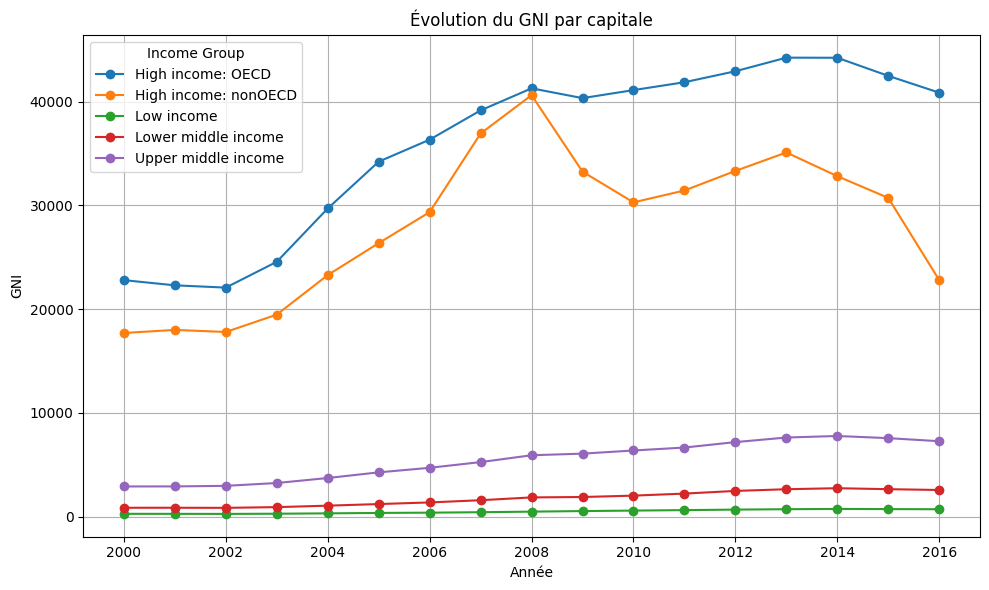

In [241]:
income_group_evolution_T.plot(figsize=(10,6), marker='o')
plt.title("Évolution du GNI par capitale")
plt.ylabel("GNI")
plt.xlabel("Année")
plt.grid(True)
plt.legend(title="Income Group")
plt.tight_layout()
plt.show()

On remarque une chute de **High income: nonOECD** et **High income: OCED** à partir de 2014. Regardons plus en détail la liste des pays.

In [242]:
# 1. Sélection des années >= 2020
years_income = [year for year in years_eco if 2014 <= int(year) <= 2016]
high_income_oecd = df_topic_eco[df_topic_eco["Income Group"] == "High income: OECD"]
cols_to_keep = ["Country Name", "Region", "Income Group"] + years_income
high_income_oecd = high_income_oecd[cols_to_keep]
high_income_oecd

Country Name                      Region       Income Group  \
33651         Australia         East Asia & Pacific  High income: OECD   
36854           Austria       Europe & Central Asia  High income: OECD   
46463           Belgium       Europe & Central Asia  High income: OECD   
97711            Canada               North America  High income: OECD   
100914      Switzerland       Europe & Central Asia  High income: OECD   
104117            Chile   Latin America & Caribbean  High income: OECD   
136147   Czech Republic       Europe & Central Asia  High income: OECD   
139350          Germany       Europe & Central Asia  High income: OECD   
148959          Denmark       Europe & Central Asia  High income: OECD   
164974            Spain       Europe & Central Asia  High income: OECD   
168177          Estonia       Europe & Central Asia  High income: OECD   
174583          Finland       Europe & Central Asia  High income: OECD   
180989           France       Europe & Central Asia  High income: OECD   
187395   United Kingdom       Europe & Central Asia  High income: OECD   
209816           Greece       Europe & Central Asia  High income: OECD   
254658          Ireland       Europe & Central Asia  High income: OECD   
261064          Iceland       Europe & Central Asia  High income: OECD   
264267           Israel  Middle East & North Africa  High income: OECD   
267470            Italy       Europe & Central Asia  High income: OECD   
277079            Japan         East Asia & Pacific  High income: OECD   
331530       Luxembourg       Europe & Central Asia  High income: OECD   
418011      Netherlands       Europe & Central Asia  High income: OECD   
421214           Norway       Europe & Central Asia  High income: OECD   
430823      New Zealand         East Asia & Pacific  High income: OECD   
456447           Poland       Europe & Central Asia  High income: OECD   
462853         Portugal       Europe & Central Asia  High income: OECD   
523710  Slovak Republic       Europe & Central Asia  High income: OECD   
526913         Slovenia       Europe & Central Asia  High income: OECD   
530116           Sweden       Europe & Central Asia  High income: OECD   
597379    United States               North America  High income: OECD   

            2014     2015     2016  
33651    64860.0  60330.0  54420.0  
36854    50400.0  47610.0  45790.0  
46463    46940.0  44340.0  41820.0  
97711    51750.0  47250.0  43660.0  
100914   86200.0  84570.0  81240.0  
104117   15140.0  14340.0  13540.0  
136147   18790.0  18130.0  17540.0  
139350   47710.0  45790.0  43850.0  
148959   63530.0  60300.0  56990.0  
164974   29300.0  28420.0  27600.0  
168177   18840.0  18300.0  17750.0  
174583   48990.0  46530.0  45050.0  
180989   42950.0  40730.0  38720.0  
187395   43740.0  43720.0  42330.0  
209816   21990.0  20270.0  19090.0  
254658   46860.0  51290.0  51760.0  
261064   48160.0  50260.0  56990.0  
264267   35790.0  36080.0  36240.0  
267470   34760.0  32970.0  31730.0  
277079   43940.0  38780.0  37930.0  
331530   75280.0  73530.0  71470.0  
418011   51330.0  49030.0  46640.0  
421214  104860.0  93860.0  82440.0  
430823   41530.0  40250.0  38750.0  
456447   13680.0  13340.0  12690.0  
462853   21260.0  20440.0  19880.0  
523710   18110.0  17560.0  16810.0  
526913   23550.0  22250.0  21620.0  
530116   61030.0  57760.0  54590.0  
597379   55350.0  56250.0  56810.0

Toutes les colonnes sont remplies, il n'y a pas de problème au niveau de **High income: OECD**

In [243]:
years_income = [year for year in years_eco if 2014 <= int(year) <= 2016]
high_income_non_oecd = df_topic_eco[df_topic_eco["Income Group"] == "High income: nonOECD"]
cols_to_keep = ["Country Name", "Region", "Income Group"] + years_income
high_income_non_oecd = high_income_non_oecd[cols_to_keep]
high_income_non_oecd

Country Name                      Region  \
1621                        Aruba   Latin America & Caribbean   
14433                     Andorra       Europe & Central Asia   
17636        United Arab Emirates  Middle East & North Africa   
30448         Antigua and Barbuda   Latin America & Caribbean   
62478                     Bahrain  Middle East & North Africa   
75290                     Bermuda               North America   
84899                    Barbados   Latin America & Caribbean   
129741             Cayman Islands   Latin America & Caribbean   
132944                     Cyprus       Europe & Central Asia   
206613          Equatorial Guinea          Sub-Saharan Africa   
216222                  Greenland       Europe & Central Asia   
222628                       Guam         East Asia & Pacific   
229034       Hong Kong SAR, China         East Asia & Pacific   
235440                    Croatia       Europe & Central Asia   
248252                Isle of Man       Europe & Central Asia   
296297        St. Kitts and Nevis   Latin America & Caribbean   
299500                     Kuwait  Middle East & North Africa   
318718              Liechtenstein       Europe & Central Asia   
328327                  Lithuania       Europe & Central Asia   
334733                     Latvia       Europe & Central Asia   
337936           Macao SAR, China         East Asia & Pacific   
341139   St. Martin (French part)   Latin America & Caribbean   
347545                     Monaco       Europe & Central Asia   
369966                      Malta  Middle East & North Africa   
382778   Northern Mariana Islands         East Asia & Pacific   
405199              New Caledonia         East Asia & Pacific   
434026                       Oman  Middle East & North Africa   
459650                Puerto Rico   Latin America & Caribbean   
472462           French Polynesia         East Asia & Pacific   
475665                      Qatar  Middle East & North Africa   
485274               Saudi Arabia  Middle East & North Africa   
494883                  Singapore         East Asia & Pacific   
507695                 San Marino       Europe & Central Asia   
536522  Sint Maarten (Dutch part)   Latin America & Caribbean   
546131   Turks and Caicos Islands   Latin America & Caribbean   
571755        Trinidad and Tobago   Latin America & Caribbean   
594176                    Uruguay   Latin America & Caribbean   

                Income Group     2014     2015     2016  
1621    High income: nonOECD      NaN      NaN      NaN  
14433   High income: nonOECD      NaN      NaN      NaN  
17636   High income: nonOECD  44870.0  42910.0  40480.0  
30448   High income: nonOECD  12500.0  12850.0  13560.0  
62478   High income: nonOECD  21010.0  22660.0      NaN  
75290   High income: nonOECD      NaN      NaN      NaN  
84899   High income: nonOECD  15670.0  15310.0  15210.0  
129741  High income: nonOECD      NaN      NaN      NaN  
132944  High income: nonOECD  26500.0  25810.0  23680.0  
206613  High income: nonOECD  12850.0   9510.0   7180.0  
216222  High income: nonOECD      NaN      NaN      NaN  
222628  High income: nonOECD      NaN      NaN      NaN  
229034  High income: nonOECD  40170.0  41100.0  43240.0  
235440  High income: nonOECD  13150.0  12810.0  12140.0  
248252  High income: nonOECD  89970.0  82650.0      NaN  
296297  High income: nonOECD  15130.0  15450.0  15690.0  
299500  High income: nonOECD  49770.0  40750.0  34890.0  
318718  High income: nonOECD      NaN      NaN      NaN  
328327  High income: nonOECD  16020.0  15120.0  14750.0  
334733  High income: nonOECD  15310.0  14970.0  14570.0  
337936  High income: nonOECD  74400.0  64580.0      NaN  
341139  High income: nonOECD      NaN      NaN      NaN  
347545  High income: nonOECD      NaN      NaN      NaN  
369966  High income: nonOECD  24300.0  24780.0  24210.0  
382778  High income: nonOECD      NaN      NaN      NaN  
405199  High income: nonOECD      NaN     

In [244]:
# Filtrer les pays de la région 'East Asia & Pacific'
high_income_non_oecd = df_eco_sub[df_eco_sub["Income Group"] == "High income: nonOECD"]

# Identifier les pays n’ayant **aucune** valeur sur la période
no_data_countries_non_oecd = high_income_non_oecd[high_income_non_oecd[years_eco].isna().all(axis=1)]
no_data_countries_non_oecd

Country Name                     Region  \
1621                        Aruba  Latin America & Caribbean   
14433                     Andorra      Europe & Central Asia   
129741             Cayman Islands  Latin America & Caribbean   
222628                       Guam        East Asia & Pacific   
341139   St. Martin (French part)  Latin America & Caribbean   
382778   Northern Mariana Islands        East Asia & Pacific   
507695                 San Marino      Europe & Central Asia   
536522  Sint Maarten (Dutch part)  Latin America & Caribbean   
546131   Turks and Caicos Islands  Latin America & Caribbean   

                Income Group  2000  2001  2002  2003  2004  2005  2006  2007  \
1621    High income: nonOECD   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
14433   High income: nonOECD   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
129741  High income: nonOECD   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
222628  High income: nonOECD   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
341139  High income: nonOECD   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
382778  High income: nonOECD   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
507695  High income: nonOECD   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
536522  High income: nonOECD   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
546131  High income: nonOECD   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

        2008  2009  2010  2011  2012  2013  2014  2015  2016  
1621     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
14433    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
129741   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
222628   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
341139   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
382778   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
507695   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
536522   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
546131   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN

Ces pays étant majoritairement des îles, il n'est pas nécessaire de chercher à remplir les données.

In [245]:
# Créons un masque des lignes où toutes les années sont manquantes
missing_mask = df_topic_eco[years_eco].isnull().all(axis=1)

# Remettons les résultats dans un DataFrame lisible
missing_countries_df = (
    df_topic_eco[missing_mask][["Country Name", "Region", "Income Group"]]
    .sort_values(by=["Income Group", "Region", "Country Name"])
    .reset_index(drop=True)
)
missing_countries_df

Country Name                     Region          Income Group
0                        Guam        East Asia & Pacific  High income: nonOECD
1    Northern Mariana Islands        East Asia & Pacific  High income: nonOECD
2                     Andorra      Europe & Central Asia  High income: nonOECD
3                  San Marino      Europe & Central Asia  High income: nonOECD
4                       Aruba  Latin America & Caribbean  High income: nonOECD
5              Cayman Islands  Latin America & Caribbean  High income: nonOECD
6   Sint Maarten (Dutch part)  Latin America & Caribbean  High income: nonOECD
7    St. Martin (French part)  Latin America & Caribbean  High income: nonOECD
8    Turks and Caicos Islands  Latin America & Caribbean  High income: nonOECD
9                     Somalia         Sub-Saharan Africa            Low income
10             American Samoa        East Asia & Pacific   Upper middle income
11                  Gibraltar                        NaN                   NaN
12                      Nauru                        NaN                   NaN

In [246]:
# 1. Liste des pays avec toutes les années manquantes
missing_countries = df_topic_eco.loc[missing_mask, "Country Name"].dropna().unique()

# 2. Filtrer ceux qui ont au moins une année manquante
partial_missing_mask = df_topic_eco[years_eco].isnull().any(axis=1)
partial_missing_data = df_topic_eco.loc[partial_missing_mask, ["Country Name", "Region", "Income Group"] + years_eco].copy()

# 3. Ajouter les années manquantes pour chaque ligne
partial_missing_data["Années manquantes"] = partial_missing_data[years_eco]\
    .apply(lambda row: [year for year in years_eco if pd.isna(row[year])], axis=1)

# 4. Nettoyer : enlever ceux qui ont TOUTES les années nulles
partial_missing_data_cleaned = partial_missing_data[
    ~partial_missing_data["Country Name"].isin(missing_countries)
].reset_index(drop=True)

# 5. Réorganiser les colonnes
cols = ["Country Name", "Region", "Income Group", "Années manquantes"]
partial_missing_data_cleaned = partial_missing_data_cleaned[cols]

grouped = partial_missing_data_cleaned.groupby("Income Group").apply(
    lambda grp: grp[["Country Name", "Region", "Années manquantes"]].reset_index(drop=True)
)
grouped



/tmp/ipykernel_9241/1091910358.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = partial_missing_data_cleaned.groupby("Income Group").apply(


Country Name                      Region  \
Income Group                                                                
High income: nonOECD 0   United Arab Emirates  Middle East & North Africa   
                     1                Bahrain  Middle East & North Africa   
                     2                Bermuda               North America   
                     3              Greenland       Europe & Central Asia   
                     4            Isle of Man       Europe & Central Asia   
                     5          Liechtenstein       Europe & Central Asia   
                     6       Macao SAR, China         East Asia & Pacific   
                     7                 Monaco       Europe & Central Asia   
                     8          New Caledonia         East Asia & Pacific   
                     9                   Oman  Middle East & North Africa   
                     10           Puerto Rico   Latin America & Caribbean   
                     11      French Polynesia         East Asia & Pacific   
                     12                 Qatar  Middle East & North Africa   
Low income           0            Afghanistan                  South Asia   
                     1                Eritrea          Sub-Saharan Africa   
                     2                Myanmar         East Asia & Pacific   
Lower middle income  0               Djibouti  Middle East & North Africa   
                     1            South Sudan          Sub-Saharan Africa   
                     2   Syrian Arab Republic  Middle East & North Africa   
                     3            Timor-Leste         East Asia & Pacific   
                     4                Vanuatu         East Asia & Pacific   
Upper middle income  0                   Cuba   Latin America & Caribbean   
                     1                   Iraq  Middle East & North Africa   
                     2                  Libya  Middle East & North Africa   
                     3               Maldives                  South Asia   
                     4             Montenegro       Europe & Central Asia   
                     5                 Tuvalu         East Asia & Pacific   

                                                         Années manquantes  
Income Group                                                                
High income: nonOECD 0                                              [2000]  
                     1                                              [2016]  
                     2   [2000, 2001, 2002, 2003, 2004, 2005, 2006, 201...  
                     3   [2008, 2009, 2010, 2011, 2012, 2013, 2014, 201...  
                     4                                              [2016]  
                     5          [2010, 2011, 2012, 2013, 2014, 2015, 2016]  
                     6                                              [2016]  
                     7    [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]  
                     8   [2001, 2002, 2003, 2004, 2005, 2006, 2007, 200...  
                     9                                              [2016]  
                     10                                 [2014, 2015, 2016]  
                     11  [2001, 2002, 2003, 2004, 2005, 2006, 2007, 200...  
                     12                     [2000, 2001, 2002, 2003, 2016]  
Low income           0                            [2000, 2001, 2002, 2003]  
                     1                      [2012, 2013, 2014, 2015, 2016]  
                     2                                        [2000, 2001]  
Lower middle income  0   [2006, 2007, 2008, 2009, 2010, 2011, 2012, 201...  
                     1   [2000, 2001, 2002, 2003, 2004, 2005, 2006, 200...  
                     2   [2008, 2009, 2010, 2011, 2012, 2013, 2014, 201...  
                     3                                        [2000, 2001]  
                     4                                        [2015, 2016]  
Upper middle income  0      

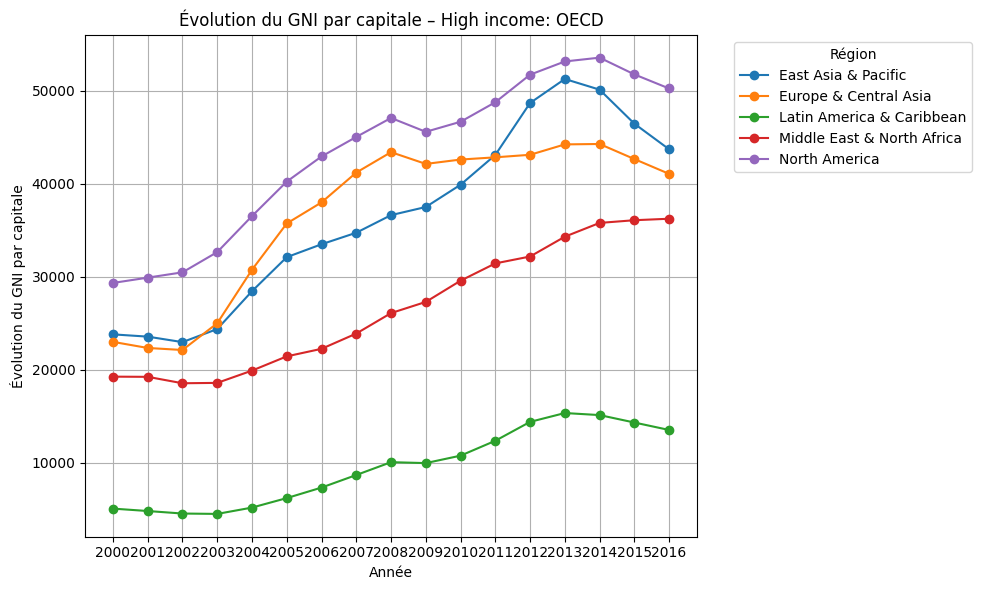

In [247]:
# Spécifie l'Income Group
selected_income_group = "High income: OECD"

# Calcul des moyennes pour ce groupe
grouped = df_topic_eco.groupby(['Income Group', 'Region'])[years_eco].mean()

# Extraire les données du groupe sélectionné
data = grouped.loc[selected_income_group]
data = data.T  # Transposer : les années deviennent l'index

# Tracer le graphique
plt.figure(figsize=(10, 6))
for region in data.columns:
    plt.plot(data.index, data[region], marker='o', label=region)

plt.title(f"Évolution du GNI par capitale – {selected_income_group}")
plt.xlabel("Année")
plt.ylabel("Évolution du GNI par capitale")
plt.legend(title="Région", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

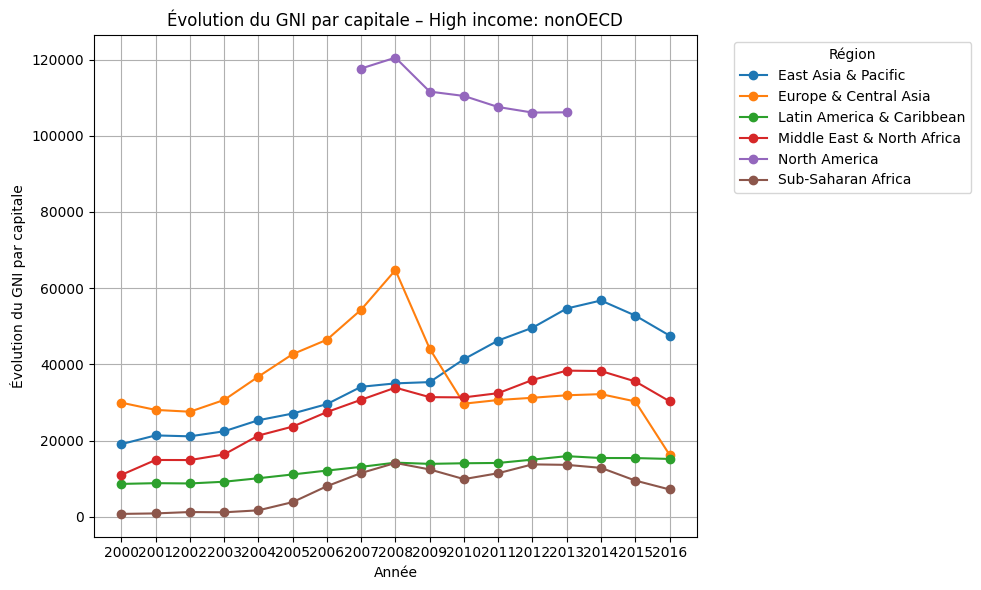

In [248]:
# Spécifie l'Income Group 
selected_income_group = "High income: nonOECD"

# Calcul des moyennes pour ce groupe
grouped = df_topic_eco.groupby(['Income Group', 'Region'])[years_eco].mean()

# Extraire les données du groupe sélectionné
data = grouped.loc[selected_income_group]
data = data.T  # Transposer : les années deviennent l'index

# Tracer le graphique
plt.figure(figsize=(10, 6))
for region in data.columns:
    plt.plot(data.index, data[region], marker='o', label=region)

plt.title(f"Évolution du GNI par capitale – {selected_income_group}")
plt.xlabel("Année")
plt.ylabel("Évolution du GNI par capitale")
plt.legend(title="Région", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Regardons plus en détail la région Nord Américaine, où il y a beaucoup de valeurs manquantes.

In [249]:
north_america = df_eco_sub[df_eco_sub['Region'] == 'North America']
north_america

Country Name         Region          Income Group     2000     2001  \
75290         Bermuda  North America  High income: nonOECD      NaN      NaN   
97711          Canada  North America     High income: OECD  22610.0  22980.0   
597379  United States  North America     High income: OECD  36070.0  36840.0   

           2002     2003     2004     2005     2006      2007      2008  \
75290       NaN      NaN      NaN      NaN      NaN  117640.0  120490.0   
97711   23490.0  25360.0  29370.0  34120.0  37780.0   41420.0   44810.0   
597379  37470.0  39950.0  43680.0  46340.0  48080.0   48640.0   49330.0   

            2009      2010      2011      2012      2013     2014     2015  \
75290   111580.0  110440.0  107530.0  106080.0  106140.0      NaN      NaN   
97711    43110.0   44370.0   47060.0   50900.0   52620.0  51750.0  47250.0   
597379   48050.0   48950.0   50460.0   52540.0   53660.0  55350.0  56250.0   

           2016  
75290       NaN  
97711   43660.0  
597379  56810.0

On remarque que ce sont les **Bermudes** où il manque des valeurs. Les Bermudes étant un archipel, on peut ne pas en tenir compte.

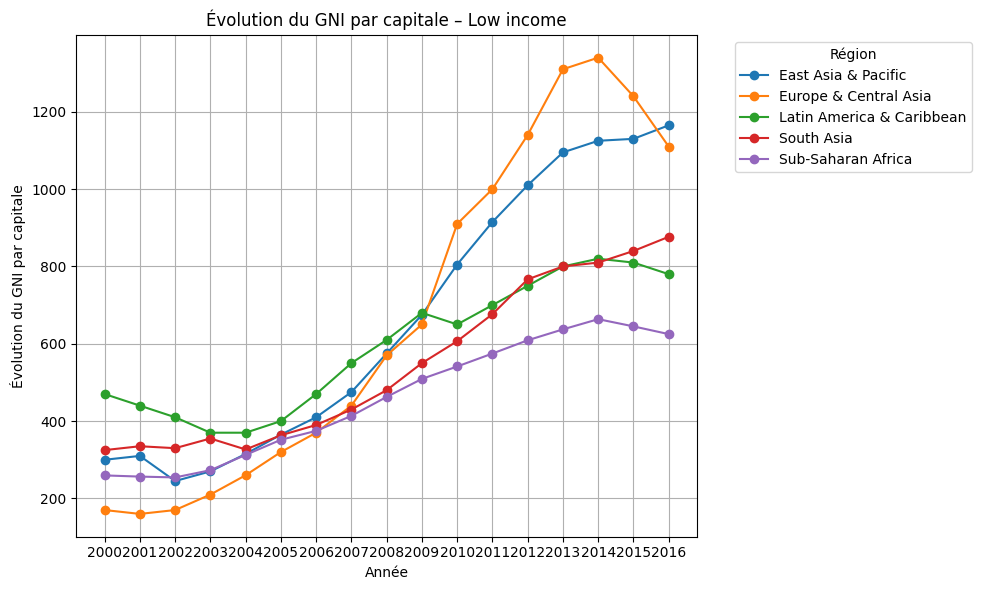

In [250]:
# Spécifie l'Income Group 
selected_income_group = "Low income"

# Calcul des moyennes pour ce groupe
grouped = df_topic_eco.groupby(['Income Group', 'Region'])[years_eco].mean()

# Extraire les données du groupe sélectionné
data = grouped.loc[selected_income_group]
data = data.T  # Transposer : les années deviennent l'index

# Tracer le graphique
plt.figure(figsize=(10, 6))
for region in data.columns:
    plt.plot(data.index, data[region], marker='o', label=region)

plt.title(f"Évolution du GNI par capitale – {selected_income_group}")
plt.xlabel("Année")
plt.ylabel("Évolution du GNI par capitale")
plt.legend(title="Région", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Les taux étant très faibles, moins de 5%, il paraît peu utile de récupérer les données manquantes.

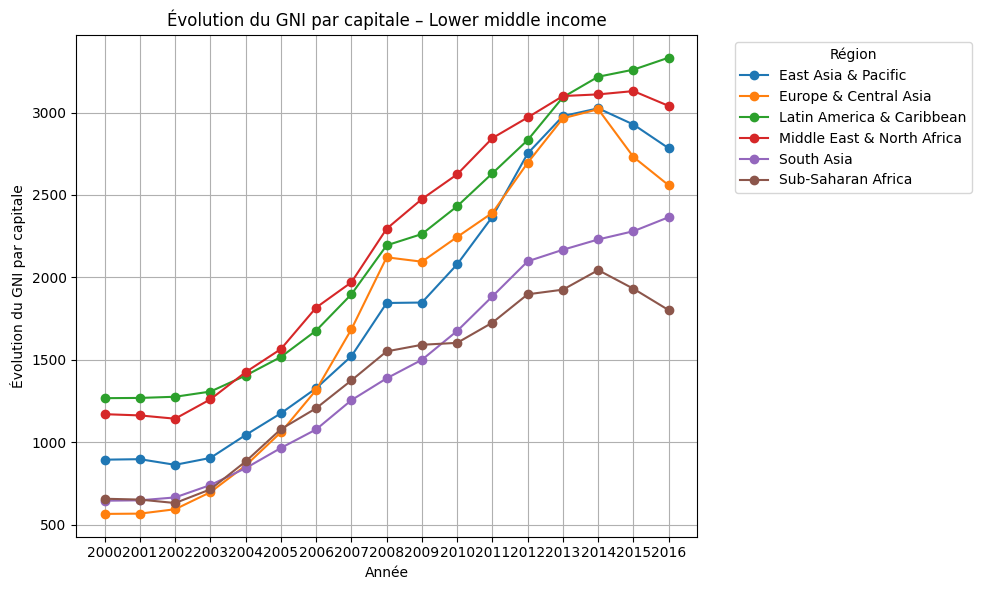

In [251]:
# Spécifie l'Income Group 
selected_income_group = "Lower middle income"

# Calcul des moyennes pour ce groupe
grouped = df_topic_eco.groupby(['Income Group', 'Region'])[years_eco].mean()

# Extraire les données du groupe sélectionné
data = grouped.loc[selected_income_group]
data = data.T  # Transposer : les années deviennent l'index

# Tracer le graphique
plt.figure(figsize=(10, 6))
for region in data.columns:
    plt.plot(data.index, data[region], marker='o', label=region)

plt.title(f"Évolution du GNI par capitale – {selected_income_group}")
plt.xlabel("Année")
plt.ylabel("Évolution du GNI par capitale")
plt.legend(title="Région", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Les données paraissent en majorité complète, et pour celles manquantes, le taux étant inférieur à 5%, il paraît peu utile de récupérer les données.

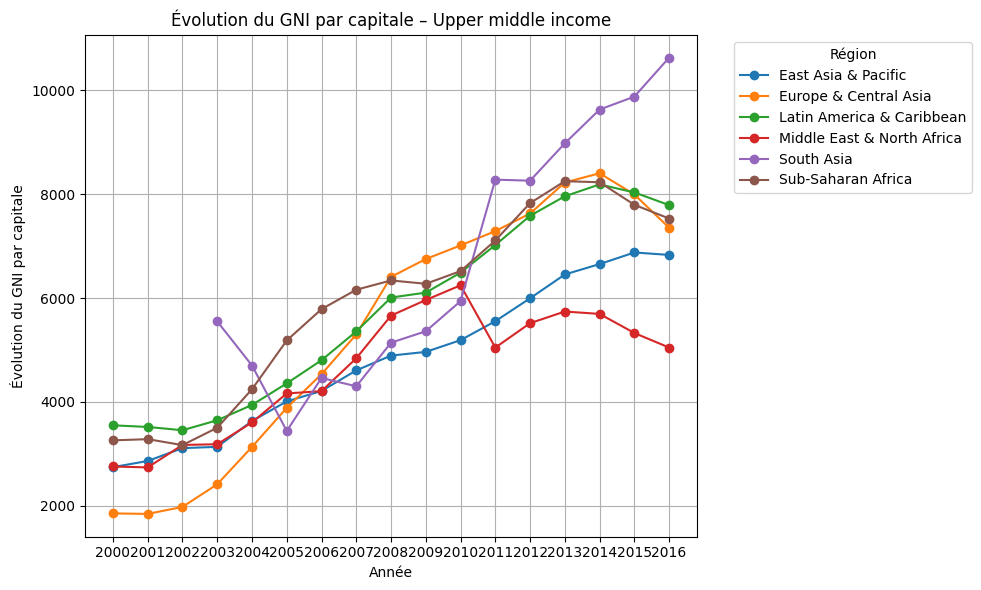

In [252]:
# Spécifie l'Income Group 
selected_income_group = "Upper middle income"

# Calcul des moyennes pour ce groupe
grouped = df_topic_eco.groupby(['Income Group', 'Region'])[years_eco].mean()

# Extraire les données du groupe sélectionné
data = grouped.loc[selected_income_group]
data = data.T  # Transposer : les années deviennent l'index

# Tracer le graphique
plt.figure(figsize=(10, 6))
for region in data.columns:
    plt.plot(data.index, data[region], marker='o', label=region)

plt.title(f"Évolution du GNI par capitale – {selected_income_group}")
plt.xlabel("Année")
plt.ylabel("Évolution du GNI par capitale")
plt.legend(title="Région", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## MERGE AVEC LES INDICATEURS CHOISIS

In [253]:
df_topic_eco['Indicator Name'].unique()

array(['GNI per capita, Atlas method (current US$)'], dtype=object)

In [254]:
df_topic_pop['Indicator Name'].unique()

array(['Population of the official age for upper secondary education, both sexes (number)'],
      dtype=object)

In [255]:
df_topic_infra['Indicator Name'].unique()

array(['Internet users (per 100 people)'], dtype=object)

In [256]:
indicators_selected = ['GNI per capita, Atlas method (current US$)',
                       'Population of the official age for upper secondary education, both sexes (number)',
                       'Internet users (per 100 people)']
df_indic = df_indicators_passed[df_indicators_passed['Indicator Name'].isin(indicators_selected)]
df_indic.head(10)

Country Code Country Name                     Region  \
611            ABW        Aruba  Latin America & Caribbean   
1621           ABW        Aruba  Latin America & Caribbean   
2149           ABW        Aruba  Latin America & Caribbean   
3814           AFG  Afghanistan                 South Asia   
4824           AFG  Afghanistan                 South Asia   
5352           AFG  Afghanistan                 South Asia   
7017           AGO       Angola         Sub-Saharan Africa   
8027           AGO       Angola         Sub-Saharan Africa   
8555           AGO       Angola         Sub-Saharan Africa   
10220          ALB      Albania      Europe & Central Asia   

               Income Group Latest population census  \
611    High income: nonOECD                     2010   
1621   High income: nonOECD                     2010   
2149   High income: nonOECD                     2010   
3814             Low income                     1979   
4824             Low income                     1979   
5352             Low income                     1979   
7017    Upper middle income                     1970   
8027    Upper middle income                     1970   
8555    Upper middle income                     1970   
10220   Upper middle income                     2011   

                                          Indicator Name  \
611                      Internet users (per 100 people)   
1621          GNI per capita, Atlas method (current US$)   
2149   Population of the official age for upper secon...   
3814                     Internet users (per 100 people)   
4824          GNI per capita, Atlas method (current US$)   
5352   Population of the official age for upper secon...   
7017                     Internet users (per 100 people)   
8027          GNI per capita, Atlas method (current US$)   
8555   Population of the official age for upper secon...   
10220                    Internet users (per 100 people)   

                                                   Topic  Indicator Code  \
611                       Infrastructure: Communications  IT.NET.USER.P2   
1621   Economic Policy & Debt: National accounts: Atl...  NY.GNP.PCAP.CD   
2149                                          Population  SP.SEC.UTOT.IN   
3814                      Infrastructure: Communications  IT.NET.USER.P2   
4824   Economic Policy & Debt: National accounts: Atl...  NY.GNP.PCAP.CD   
5352                                          Population  SP.SEC.UTOT.IN   
7017                      Infrastructure: Communications  IT.NET.USER.P2   
8027   Economic Policy & Debt: National accounts: Atl...  NY.GNP.PCAP.CD   
8555                                          Population  SP.SEC.UTOT.IN   
10220                     Infrastructure: Communications  IT.NET.USER.P2   

           1970      1971  ...          2007        2008        2009  \
611         NaN       NaN  ...  3.090000e+01       52.00       58.00   
1621        NaN       NaN  ...           NaN         NaN         NaN   
2149     4166.0    4168.0  ...  4.486000e+03     4543.00     4607.00   
3814        NaN       NaN  ...  1.900000e+00        1.84        3.55   
4824        NaN       NaN  ...  3.300000e+02      360.00      460.00   
5352   659303.0  675262.0  ...  1.625093e+06  1656586.00  1700525.00   
7017        NaN       NaN  ...  1.700000e+00        1.90        2.30   
8027        NaN       NaN  ...  2.160000e+03     2760.00     3190.00   
8555   286309.0  290669.0  ...  1.248737e+06  1292043.00  1338684.00   
10220       NaN       NaN  ...  1.503612e+01       23.86       41.20   

            2010       2011          2012       2013        2014  \
611         62.0       69.0  7.400000e+01       78.9       83.78   
1621         NaN        NaN           NaN        NaN         NaN   
2149      4623.0     4594.0  4.553000e+03     4529.0     4510.00   
3814         4.0        5.0  5.454545e+00        5.9        7.00   
4824       500.0      560.0  6.700000e+02      670.0      630.00   
5352   

### Pays qui n'ont aucuns indicateurs remplis.

In [257]:
# 1. Calcul du taux de remplissage par pays + indicateur
taux_remplissage = df_indic.set_index(['Country Name', 'Indicator Name'])[years_passed] \
    .notna().mean(axis=1) * 100

# 2. Remise en DataFrame
df_taux = taux_remplissage.reset_index()
df_taux.columns = ['Country Name', 'Indicator Name', 'TauxRemplissage']

# 3. Agrégation pour éviter les doublons (au cas où il y a plusieurs lignes par pays+indicateur)
df_taux_grouped = df_taux.groupby(['Country Name', 'Indicator Name'], as_index=False).mean()

# 4. Pivot final
df_pivot = df_taux_grouped.pivot(index='Country Name', columns='Indicator Name', values='TauxRemplissage').round(2)
df_pivot

Indicator Name      GNI per capita, Atlas method (current US$)  \
Country Name                                                     
Afghanistan                                              27.66   
Albania                                                  65.96   
Algeria                                                 100.00   
American Samoa                                            0.00   
Andorra                                                   0.00   
...                                                        ...   
Vanuatu                                                  72.34   
Vietnam                                                  59.57   
West Bank and Gaza                                       44.68   
Zambia                                                  100.00   
Zimbabwe                                                100.00   

Indicator Name      Internet users (per 100 people)  \
Country Name                                          
Afghanistan                                   36.17   
Albania                                       48.94   
Algeria                                       51.06   
American Samoa                                 2.13   
Andorra                                       44.68   
...                                             ...   
Vanuatu                                       46.81   
Vietnam                                       46.81   
West Bank and Gaza                            38.30   
Zambia                                        51.06   
Zimbabwe                                      51.06   

Indicator Name      Population of the official age for upper secondary education, both sexes (number)  
Country Name                                                                                           
Afghanistan                                                     97.87                                  
Albania                                                        100.00                                  
Algeria                                                         97.87                                  
American Samoa                                                   0.00                                  
Andorra                                                         61.70                                  
...                                                               ...                                  
Vanuatu                                                         97.87                                  
Vietnam                                                         97.87                                  
West Bank and Gaza                                              97.87                                  
Zambia                                                         100.00                                  
Zimbabwe                                                       100.00                                  

[195 rows x 3 columns]

In [258]:
country_0_on_3 = df_pivot[(df_pivot == 0).all(axis=1)].index.tolist()
df_pivot.loc[country_0_on_3]

Indicator Name             GNI per capita, Atlas method (current US$)  \
Country Name                                                            
Sint Maarten (Dutch part)                                         0.0   
St. Martin (French part)                                          0.0   

Indicator Name             Internet users (per 100 people)  \
Country Name                                                 
Sint Maarten (Dutch part)                              0.0   
St. Martin (French part)                               0.0   

Indicator Name             Population of the official age for upper secondary education, both sexes (number)  
Country Name                                                                                                  
Sint Maarten (Dutch part)                                                0.0                                  
St. Martin (French part)                                                 0.0

In [259]:
# Compter le nombre de colonnes avec 0% par pays
nb_zeros = (df_pivot == 0).sum(axis=1)

# Garder ceux qui ont au moins 2 indicateurs à 0%
country_0_in_2_more = nb_zeros[nb_zeros >= 2].index.tolist()

df_pivot.loc[country_0_in_2_more]


Indicator Name             GNI per capita, Atlas method (current US$)  \
Country Name                                                            
American Samoa                                                   0.00   
Guam                                                             0.00   
Isle of Man                                                     40.43   
Nauru                                                            0.00   
Northern Mariana Islands                                         0.00   
Sint Maarten (Dutch part)                                        0.00   
St. Martin (French part)                                         0.00   
Turks and Caicos Islands                                         0.00   

Indicator Name             Internet users (per 100 people)  \
Country Name                                                 
American Samoa                                        2.13   
Guam                                                 51.06   
Isle of Man                                           0.00   
Nauru                                                 0.00   
Northern Mariana Islands                              2.13   
Sint Maarten (Dutch part)                             0.00   
St. Martin (French part)                              0.00   
Turks and Caicos Islands                              2.13   

Indicator Name             Population of the official age for upper secondary education, both sexes (number)  
Country Name                                                                                                  
American Samoa                                                          0.00                                  
Guam                                                                    0.00                                  
Isle of Man                                                             0.00                                  
Nauru                                                                  40.43                                  
Northern Mariana Islands                                                0.00                                  
Sint Maarten (Dutch part)                                               0.00                                  
St. Martin (French part)                                                0.00                                  
Turks and Caicos Islands                                                0.00

Les pays qui n'ont aucun indicateurs remplis, ou au moins 2 sur 3 de non remplis sont des îles. On peut donc ne pas en tenir compte.